# Associations between molecular and environmental changes along the proximal-to-distal axis of the colon
## Abstract
### Objective
Colorectal cancer is a heterogeneous disease, and tumours in the left or right sections of the colon are biologically disparate. The development of the two-colon paradigm, differentiating colorectal cancers according to their location relative to the splenic flexure, contributed to an improvement in prognosis and treatment. Recent studies challenged this division by proposing a continuum model where molecular properties follow a continuous trend along the colon. 
### Design
We address the question of which model describes CRC properties better by comparing their performance in describing the properties of colorectal tumours in a cohort of 522 patients from The Cancer Genome Atlas.
### Results
Results show that no model outperforms the other. Alterations affecting genes associated with growth are described better by the two-colon paradigm, while the continuum colon model better approximates alterations affecting genes related to metabolism and environment. As this suggests an environmental impact on changes in selective constraints along the colon, we chart the localised metabolome in a cohort of 27 colon cancer patients. Metabolites follow a continuous trend in agreement with other tissue-environmental factors such as microbiome. We show that genes with continuous transcriptional profiles interact with metabolites associated with carcinogenesis, suggesting that gradients of metabolism-mediated selective constraints might contribute to gradual changes in tumours along the colon.
### Conclusion
Our results question the previous left/right model of colon cancer, suggesting that an increase in the resolution of tumour localisation might better capture the biology of tumours as systems interacting with their local environment and holding clinical relevance.
### About this notebook
This notebook allow to reproduce all the results and figures presented in [CITAZIONE] 

# LOADING LIBRARIES

In [1]:
import sys
sys.path.append("../../../git/lib") # Path to the profile_analysis_class.py file
from profile_analysis_class import ProfileAnalysis # Import the profile workflow class
import pandas as pd
import matplotlib.pyplot as plt
from supervenn import supervenn
import mygene
from scipy.stats import chi2_contingency
from joblib import Parallel, delayed

mg = mygene.MyGeneInfo()
plt.style.use('../../assets/styles/plotting_style.mplstyle') # Path to the matplotlib style sheet

# TRANSCRIPTOME PROFILING

In [2]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_transcriptome = ProfileAnalysis('../../../docker/analysis/transcriptome')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:155: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:161: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:167: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:173: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Assign each sample in clinical data file to a colon section

In [3]:
pa_transcriptome.create_samples_to_sections_table()

In [4]:
pa_transcriptome.data_table.head()

TCGA-3L-AA1B-01A  TCGA-4N-A93T-01A  TCGA-4T-AA8H-01A  \
ensmbl_id                                                               
ENSG00000000003        111.521997         87.819242         53.472814   
ENSG00000000005          0.992449          2.313451          4.579855   
ENSG00000000419        118.855487        121.224392         58.207131   
ENSG00000000457          8.770987          7.398252          4.453604   
ENSG00000000460          5.425457          2.478204          2.971292   

                 TCGA-5M-AAT4-01A  TCGA-5M-AAT5-01A  TCGA-5M-AAT6-01A  \
ensmbl_id                                                               
ENSG00000000003        136.567069         80.503587         25.376071   
ENSG00000000005          3.491783          8.580343          0.234741   
ENSG00000000419        132.121686        240.463004         96.988095   
ENSG00000000457          7.423455          7.229283          5.833988   
ENSG00000000460          8.385077          8.742189          5.795347   

                 TCGA-5M-AATA-01A  TCGA-5M-AATE-01A  TCGA-A6-2671-01A  \
ensmbl_id                                                               
ENSG00000000003         87.758080        111.715639         68.559570   
ENSG00000000005          0.670812          0.167322          0.810485   
ENSG00000000419        156.811413        207.788662        131.795283   
ENSG00000000457          7.013853          7.540641          3.670965   
ENSG00000000460          5.746648          8.547724          6.580370   

                 TCGA-A6-2671-11A  ...  TCGA-QG-A5YV-01A  TCGA-QG-A5YW-01A  \
ensmbl_id                          ...                                       
ENSG00000000003         61.700267  ...        122.026482         94.325635   
ENSG00000000005          0.827035  ...          8.140444          3.173229   
ENSG00000000419         53.385547  ...        208.791935         85.188361   
ENSG00000000457          6.183537  ...         10.227889          3.771427   
ENSG00000000460          1.211377  ...         11.557421          5.098586   

                 TCGA-QG-A5YX-01A  TCGA-QG-A5Z1-01A  TCGA-QG-A5Z2-01A  \
ensmbl_id                                                               
ENSG00000000003        146.209859        138.843267         44.253162   
ENSG00000000005          1.861843          3.014002          1.047781   
ENSG00000000419        123.478879        195.940514         88.795443   
ENSG00000000457          8.265845          6.515947         10.971684   
ENSG00000000460          5.867534          5.084741          5.305513   

                 TCGA-QL-A97D-01A  TCGA-RU-A8FL-01A  TCGA-SS-A7HO-01A  \
ensmbl_id                                                               
ENSG00000000003         74.177221        144.275333        130.907759   
ENSG00000000005          7.156551          0.954313          0.088394   
ENSG00000000419        184.746640        146.927140        191.187774   
ENSG00000000457          6.959780          7.512311          8.105107   
ENSG00000000460          6.842320          4.575402          8.860398   

                 TCGA-T9-A92H-01A  TCGA-WS-AB45-01A  
ensmbl_id                                            
ENSG00000000003        113.238423         21.011305  
ENSG00000000005          1.780693          0.042671  
ENSG00000000419        234.357085         65.398323  
ENSG00000000457          5.892040          7.116486  
ENSG00000000460          5.835609          5.342146  

[5 rows x 689 columns]

## Calculate median value and median average variation for each colon section

In [5]:
medians_tr, mad_tr = pa_transcriptome.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


In [6]:
medians_tr

Cecum  Ascending colon  Hepatic flexure of colon  \
ensmbl_id                                                               
ENSG00000000003  73.907526        78.403451                103.124233   
ENSG00000000005   1.008409         0.735658                  1.336772   
ENSG00000000419  99.851076       104.284560                117.657759   
ENSG00000000457   6.921388         6.640371                  7.004861   
ENSG00000000460   5.263295         4.969358                  5.424937   
...                    ...              ...                       ...   
ENSG00000281881   1.026734         0.945955                  1.160217   
ENSG00000281883   0.107659         0.060173                  0.098174   
ENSG00000281896   7.024854         6.128680                  6.783127   
ENSG00000281903   0.140237         0.148624                  0.126258   
ENSG00000281912   1.054952         0.940492                  1.013578   

                 Transverse colon  Descending colon  Sigmoid colon  \
ensmbl_id                                                            
ENSG00000000003         75.913878         82.543993     132.823036   
ENSG00000000005          0.798797          1.680453       1.657560   
ENSG00000000419         97.626225        154.401872     170.663164   
ENSG00000000457          7.278464          7.113812       7.131714   
ENSG00000000460          4.844178          6.057782       5.991615   
...                           ...               ...            ...   
ENSG00000281881          1.301593          1.139874       0.877438   
ENSG00000281883          0.064308          0.099914       0.114616   
ENSG00000281896          6.126213          9.933099       7.298972   
ENSG00000281903          0.137740          0.147563       0.132634   
ENSG00000281912          1.116525          1.390416       1.298954   

                 Rectosigmoid junction  Rectum, NOS  
ensmbl_id                                            
ENSG00000000003             133.446046   100.606220  
ENSG00000000005               1.893015     1.379483  
ENSG00000000419             139.689173   144.105845  
ENSG00000000457               7.116130     6.885216  
ENSG00000000460               5.782876     6.181672  
...                                ...          ...  
ENSG00000281881               0.802070     0.920271  
ENSG00000281883               0.099486     0.085999  
ENSG00000281896               6.891469     5.949133  
ENSG00000281903               0.130807     0.123687  
ENSG00000281912               1.197804     1.120643  

[24856 rows x 8 columns]

## Fit Observables

In [7]:
scores_tr, poly_obs_scores_tr, sig_obs_scores_tr, poly_models_tr, sig_models_tr = pa_transcriptome.fit_data(medians_tr, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Fit Random permutated data

In [8]:
poly_perm_scores_tr, sig_perm_scores_tr, sig_perm_models_tr = pa_transcriptome.fit_random_data(medians_tr, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

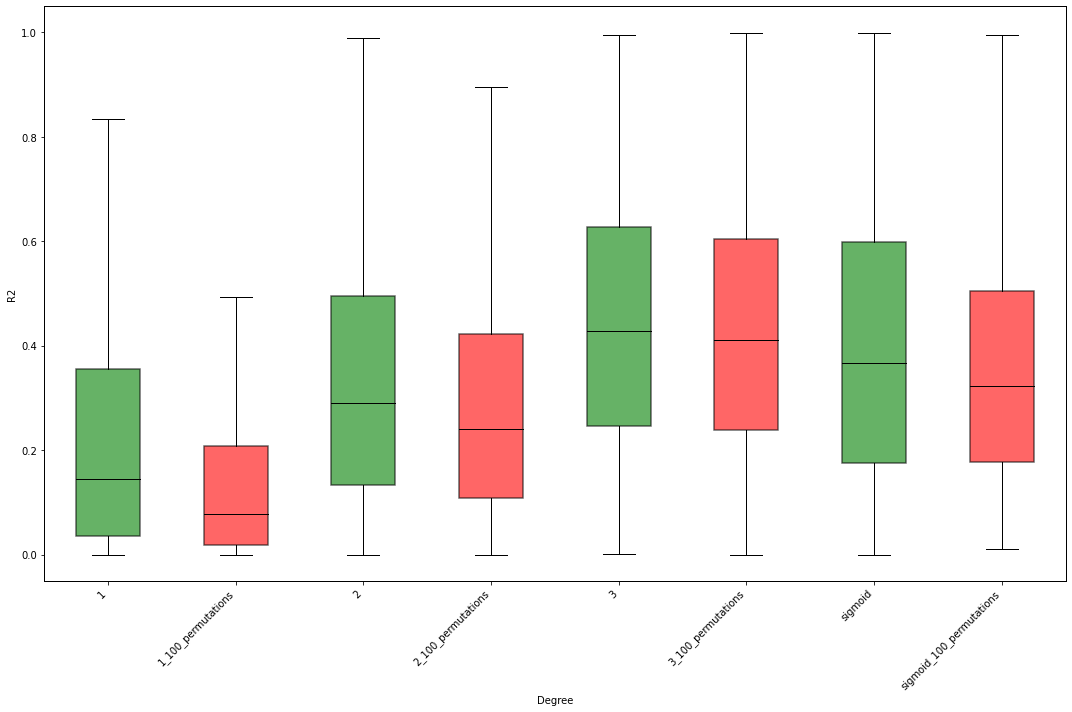

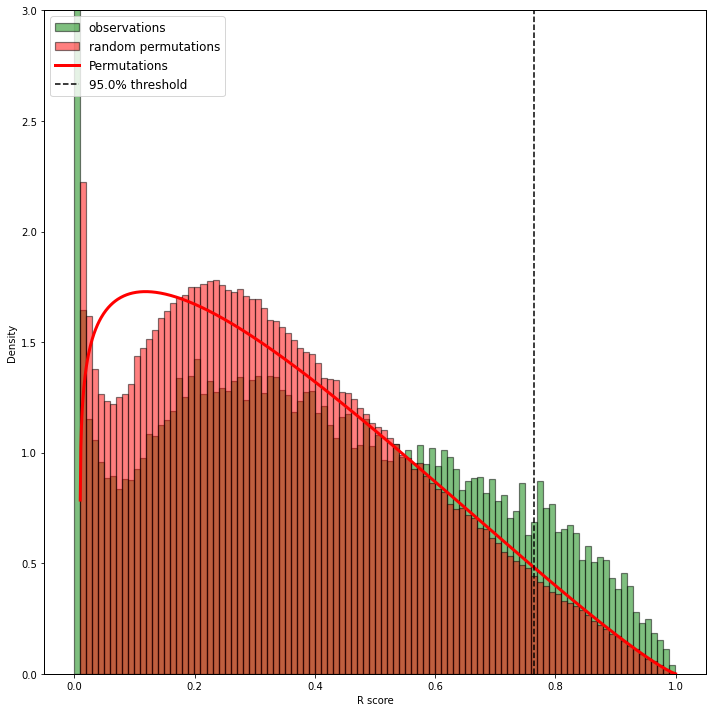

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


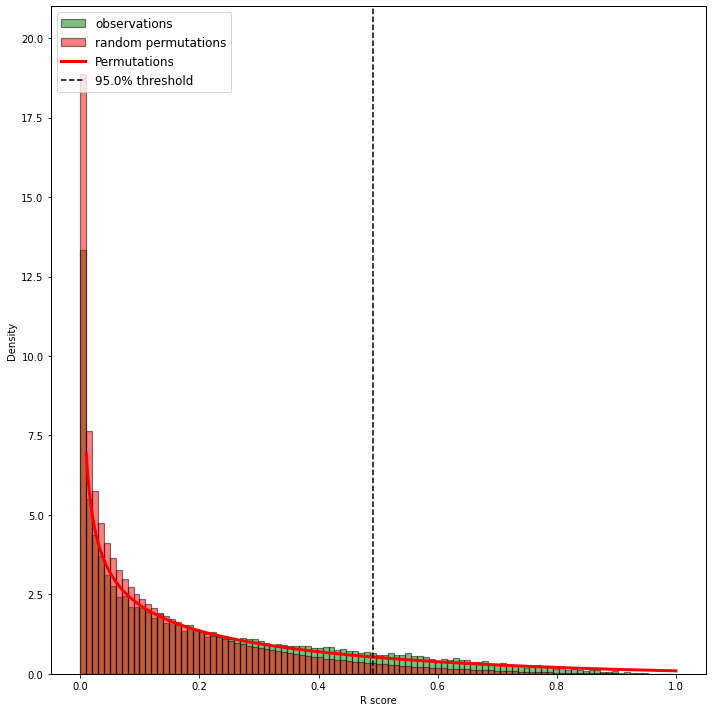

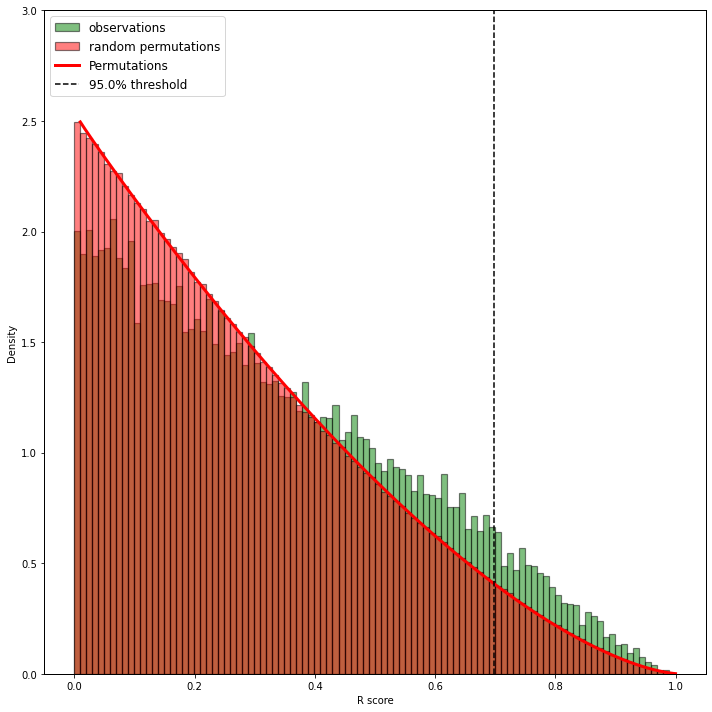

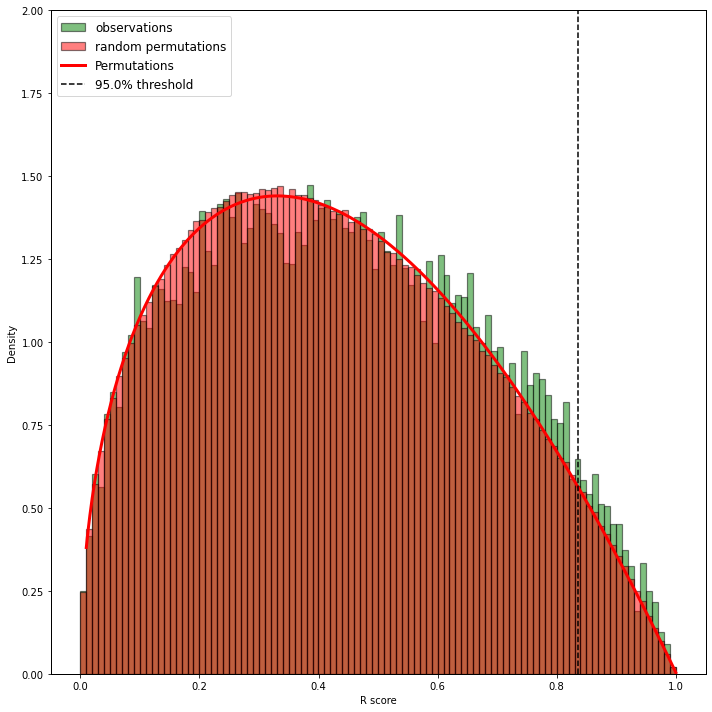

In [9]:
models_pvalue_tr=pa_transcriptome.plot_gof(poly_obs_scores_tr, sig_obs_scores_tr, poly_perm_scores_tr, sig_perm_scores_tr, dist_perm=True)

In [10]:
models_pvalue_tr

{'sigmoidal': [27991544945.0, 5.645448405547989e-81, 0.7638648097697223],
 1: [37236394548.0, 0.0, 0.49100631201580486],
 2: [34297705216.0, 1.4070971370627024e-197, 0.6981166202806701],
 3: [31924314722.0, 5.0130851237199393e-20, 0.8349099588242126]}

## Cluster genes

In [11]:
genes_clusters_tr=pa_transcriptome.cluster_genes(scores_tr)

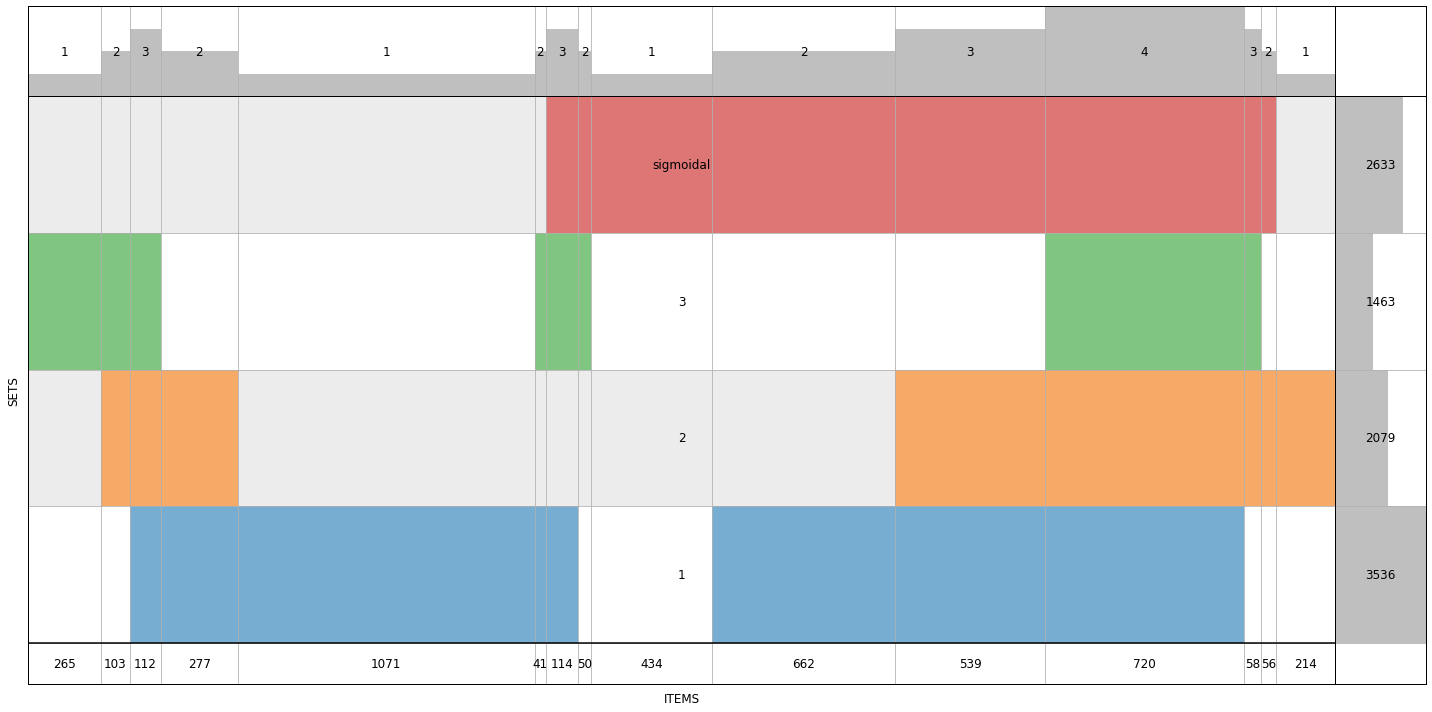

In [12]:
pa_transcriptome.plot_clusters(genes_clusters_tr)

In [13]:
summary_tr=pa_transcriptome.get_summary_table(genes_clusters_tr, scores_tr)

In [14]:
continuum_tr, sigmoid_tr, discarded_tr = pa_transcriptome.classify_genes(summary_tr)

## Plot distribution of inflexion points for sigmoid genes

<lambdifygenerated-1>:3: RuntimeWarning: overflow encountered in double_scalars
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)
<lambdifygenerated-1>:3: RuntimeWarning: invalid value encountered in double_scalars
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)
<lambdifygenerated-1>:3: RuntimeWarning: overflow encountered in exp
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)


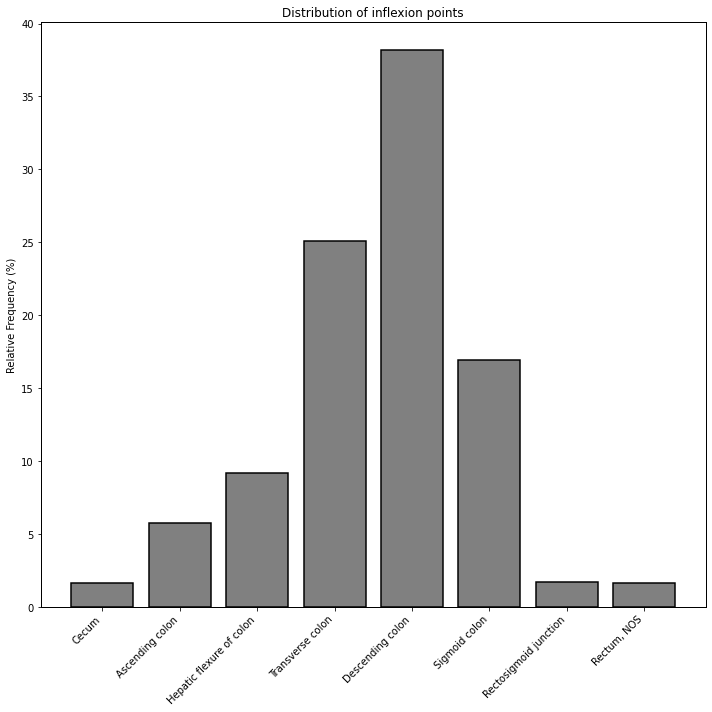

In [15]:
gene_list_tr, section_l_tr = pa_transcriptome.strict_sig_list(sigmoid_tr, sig_models_tr, plot_dist = True)

## Figure 1D

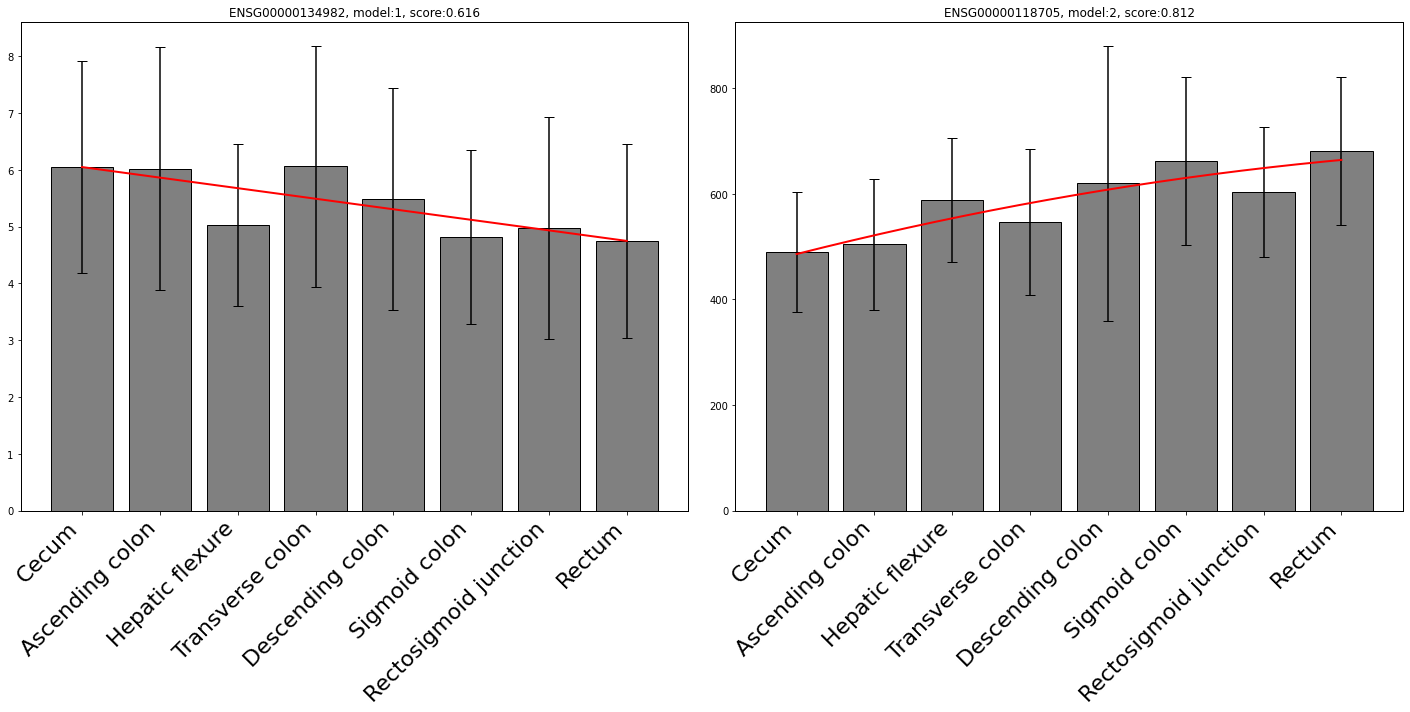

In [16]:
pa_transcriptome.plot_fitting_bars(continuum_tr, ['ENSG00000134982','ENSG00000118705'],
                                   medians_tr,
                                   mad_tr,
                                   poly_models_tr, sig_models_tr,
                                   'continuum',
                                   save_as='Figure_1D.svg')

# Testing enrichment in CTD database

In [17]:
import pandas as pd
#Preparing ctd dataset
ctd_data = pd.read_csv('../../../docker/analysis/ctd/CTD_chem_gene_ixns.csv', skiprows=27)
ctd_data.drop(0,axis=0,inplace=True)
ctd_data = ctd_data[ctd_data['Organism']=='Homo sapiens']
ctd_by_chemicalid = ctd_data.groupby('ChemicalID')

In [18]:
ctd_data.head()

# ChemicalName ChemicalID CasRN GeneSymbol  GeneID GeneForms      Organism  \
1       10074-G5    C534883   NaN         AR   367.0   protein  Homo sapiens   
2       10074-G5    C534883   NaN         AR   367.0   protein  Homo sapiens   
3       10074-G5    C534883   NaN         AR   367.0   protein  Homo sapiens   
4       10074-G5    C534883   NaN         AR   367.0   protein  Homo sapiens   
5       10074-G5    C534883   NaN      EPHB2  2048.0   protein  Homo sapiens   

   OrganismID                                        Interaction  \
1      9606.0  10074-G5 affects the reaction [MYC protein res...   
2      9606.0  10074-G5 inhibits the reaction [EPHB2 protein ...   
3      9606.0  10074-G5 results in decreased expression of AR...   
4      9606.0  10074-G5 results in decreased expression of AR...   
5      9606.0  10074-G5 inhibits the reaction [EPHB2 protein ...   

                        InteractionActions PubMedIDs  
1    affects^reaction|increases^expression  32184358  
2  decreases^reaction|increases^expression  32184358  
3                     decreases^expression  32184358  
4                     decreases^expression  32184358  
5  decreases^reaction|increases^expression  32184358

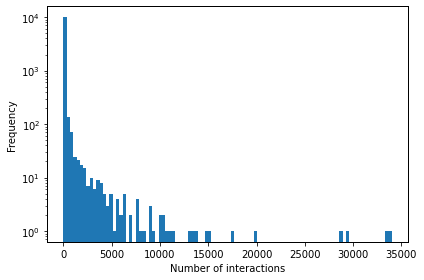

In [19]:
#Plot the distibution of genes interactions number of each chemical in CTD database
number_of_interactions = []
for name, group in ctd_by_chemicalid:
    number_of_interactions.append(len(group))
plt.hist(number_of_interactions, bins=100);
plt.ylabel('Frequency')
plt.xlabel('Number of interactions')
plt.yscale('log')
plt.tight_layout()
plt.savefig('interactions_distribution_2all_database.svg', format='svg')

In [20]:
# Remove chemicals with gene-chemical interactions above threshold
# Get all the interaction types present in the CTD database
def ctd_filtering(group,threshold):
    interaction_types = []
    ctd_data_filtered = pd.DataFrame()
    for interaction in group['InteractionActions']:
        interaction_types = interaction_types + interaction.split('|')
    if len(group) <= threshold:
        ctd_data_filtered = pd.concat([ctd_data_filtered,group])
    return ctd_data_filtered, set(interaction_types), interaction_types

In [21]:
threshold = 200
calc_res = Parallel(n_jobs=30)(delayed(ctd_filtering)(group, threshold) for name, group in ctd_by_chemicalid)

In [22]:
# unpack interactions result after paralle calculation
interaction_types_unique = []
interaction_types_full = []
ctd_database_df = pd.DataFrame()
for result in calc_res:
    interaction_types_unique = interaction_types_unique + list(result[1])
    interaction_types_full = interaction_types_full + list(result[2])
    ctd_database_df = pd.concat([ctd_database_df, result[0]])
interaction_types_unique = set(interaction_types_unique)

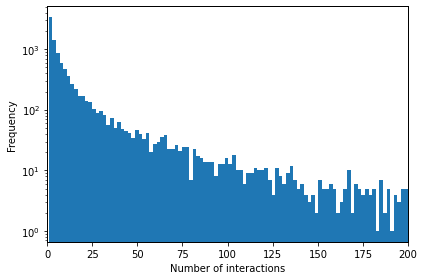

In [23]:
# Check the distibution of genes interactions number of each chemical in CTD database after filtering
ctd_database_df_groups = ctd_database_df.groupby('# ChemicalName')
number_of_interactions = []
for name, group in ctd_database_df_groups:
    number_of_interactions.append(len(group))
plt.hist(number_of_interactions, bins=100);
plt.ylabel('Frequency')
plt.xlabel('Number of interactions')
plt.xlim([0,200])
plt.yscale('log')
plt.tight_layout()
plt.savefig('interactions_distribution_200.svg', format='svg')

In [24]:
# Extract gene symbols of genes present in CTD database
ctd_data_filtered = ctd_database_df
ctd_data_filtered.dropna(subset=['GeneSymbol'], inplace=True)
genes_in_ctd = set(ctd_data_filtered['GeneSymbol'])

In [25]:
# Convert continuous genes from ensmbl id to gene symbol
query = mg.querymany(continuum_tr.index,
                    scopes='ensemblgene',
                    species=9606,
                    fields='symbol',
                    returnall=True,
                    as_dataframe=True)
cont = set(query['out'].dropna(subset=['symbol'])['symbol'])

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-2083...done.
Finished.
25 input query terms found no hit:
	['ENSG00000150076', 'ENSG00000150526', 'ENSG00000256050', 'ENSG00000260521', 'ENSG00000280123', 'ENS


In [26]:
# Convert sigmoid genes from ensmbl id to gene symbol
query = mg.querymany(sigmoid_tr.index,
                    scopes='ensemblgene',
                    species=9606,
                    fields='symbol',
                    returnall=True,
                    as_dataframe=True)
sig = set(query['out'].dropna(subset=['symbol'])['symbol'])

querying 1-993...done.
Finished.
15 input query terms found no hit:
	['ENSG00000276171', 'ENSG00000272102', 'ENSG00000231816', 'ENSG00000258929', 'ENSG00000155640', 'ENS


## All interaction types

### Test Enrichment with CTD chemicals between continuous and sigmoid genes

In [27]:
#genes continuous/ctd
cont_ctd = len(cont.intersection(genes_in_ctd))
#genes sigmoid/ctd
sig_ctd = len(sig.intersection(genes_in_ctd))
#genes continuous/no_ctd
cont_no_ctd = len(cont) - cont_ctd
#genes sigmoid/no_ctd
sig_no_ctd = len(sig) - sig_ctd

In [28]:
#calculate contingency table
table=[[cont_ctd,cont_no_ctd],[sig_ctd,sig_no_ctd]]
print(table)
chi2_contingency(table)

[[894, 1009], [340, 549]]


Chi2ContingencyResult(statistic=18.385595677454283, pvalue=1.8041671653353095e-05, dof=1, expected_freq=array([[ 841.08237822, 1061.91762178],
       [ 392.91762178,  496.08237822]]))

### Test Enrichment with CTD chemicals between continuous and non continuous genes

In [29]:
# convert ensmbl id to gene symbol of not continuous gene 
query = mg.querymany(medians_tr.index,
                    scopes='ensemblgene',
                    species=9606,
                    fields='symbol',
                    returnall=True,
                    as_dataframe=True)
no_cont = set(query['out'].dropna(subset=['symbol'])['symbol'])

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-24856...done.
Finished.
422 input query terms found no hit:
	['ENSG00000069712', 'ENSG00000112096', 'ENSG00000116883', 'ENSG00000116957', 'ENSG00000130201', 'ENS


In [30]:
# cont is a subset of medians_meth therefore it is contained in no_cont and needs to be removed
no_cont = no_cont.symmetric_difference(cont)

In [31]:
#genes continuous/ctd
cont_ctd = len(cont.intersection(genes_in_ctd))
#genes sigmoid/ctd
no_cont_ctd = len(no_cont.intersection(genes_in_ctd))
#genes continuous/no_ctd
cont_no_ctd = len(cont) - cont_ctd
#genes sigmoid/no_ctd
no_cont_no_ctd = len(no_cont) - no_cont_ctd

In [32]:
#calculate contingency table
table=[[cont_ctd,cont_no_ctd],[no_cont_ctd,no_cont_no_ctd]]
print(table)
chi2_contingency(table)

[[894, 1009], [7720, 11817]]


Chi2ContingencyResult(statistic=39.88139215975583, pvalue=2.698618893326604e-10, dof=1, expected_freq=array([[  764.57285448,  1138.42714552],
       [ 7849.42714552, 11687.57285448]]))

### Test Enrichment with CTD chemicals between sigmoid and non sigmoid genes

In [33]:
query = mg.querymany(medians_tr.index,
                    scopes='ensemblgene',
                    species=9606,
                    fields='symbol',
                    returnall=True,
                    as_dataframe=True)
no_sig = set(query['out'].dropna(subset=['symbol'])['symbol'])

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-24856...done.
Finished.
422 input query terms found no hit:
	['ENSG00000069712', 'ENSG00000112096', 'ENSG00000116883', 'ENSG00000116957', 'ENSG00000130201', 'ENS


In [34]:
# cont is a subset of medians_meth therefore it is contained in no_cont and needs to be removed
no_sig = no_sig.symmetric_difference(sig)

In [35]:
#genes continuous/ctd
sig_ctd = len(sig.intersection(genes_in_ctd))
#genes sigmoid/ctd
no_sig_ctd = len(no_sig.intersection(genes_in_ctd))
#genes continuous/no_ctd
sig_no_ctd = len(sig) - sig_ctd
#genes sigmoid/no_ctd
no_sig_no_ctd = len(no_sig) - no_sig_ctd

In [36]:
#calculate contingency table
table=[[sig_ctd,sig_no_ctd],[no_sig_ctd,no_sig_no_ctd]]
print(table)
chi2_contingency(table)

[[340, 549], [8274, 12277]]


Chi2ContingencyResult(statistic=1.3577168813011635, pvalue=0.24393355818853915, dof=1, expected_freq=array([[  357.17565299,   531.82434701],
       [ 8256.82434701, 12294.17565299]]))

## Considering only 'decreases^expression' and 'increases^expression' interaction types

### Test Enrichment with CTD chemicals between continuous and sigmoid genes

In [37]:
interactions_to_keep=['decreases^expression', 'increases^expression']

In [38]:
# Extract gene symbols of genes present in CTD database after interaction type filtering
ctd_database_df = ctd_database_df[ctd_database_df['InteractionActions'].isin(interactions_to_keep)]
ctd_data_filtered = ctd_database_df
ctd_data_filtered.dropna(subset=['GeneSymbol'], inplace=True)
genes_in_ctd = set(ctd_data_filtered['GeneSymbol'])

<ipython-input-38-6930ccbbf821>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctd_data_filtered.dropna(subset=['GeneSymbol'], inplace=True)


In [39]:
#genes continuous/ctd
cont_ctd = len(cont.intersection(genes_in_ctd))
#genes sigmoid/ctd
sig_ctd = len(sig.intersection(genes_in_ctd))
#genes continuous/no_ctd
cont_no_ctd = len(cont) - cont_ctd
#genes sigmoid/no_ctd
sig_no_ctd = len(sig) - sig_ctd

In [40]:
#calculate contingency table
table=[[cont_ctd,cont_no_ctd],[sig_ctd,sig_no_ctd]]
print(table)
chi2_contingency(table)

[[713, 1190], [267, 622]]


Chi2ContingencyResult(statistic=14.373152132987162, pvalue=0.0001499247707166853, dof=1, expected_freq=array([[ 667.95845272, 1235.04154728],
       [ 312.04154728,  576.95845272]]))

### Test Enrichment with CTD chemicals between continuous and non continuous genes

In [41]:
# convert ensmbl id to gene symbol of not continuous gene 
query = mg.querymany(medians_tr.index,
                    scopes='ensemblgene',
                    species=9606,
                    fields='symbol',
                    returnall=True,
                    as_dataframe=True)
no_cont = set(query['out'].dropna(subset=['symbol'])['symbol'])

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-24856...done.
Finished.
422 input query terms found no hit:
	['ENSG00000069712', 'ENSG00000112096', 'ENSG00000116883', 'ENSG00000116957', 'ENSG00000130201', 'ENS


In [42]:
# cont is a subset of medians_meth therefore it is contained in no_cont and needs to be removed
no_cont = no_cont.symmetric_difference(cont)

In [43]:
#genes continuous/ctd
cont_ctd = len(cont.intersection(genes_in_ctd))
#genes sigmoid/ctd
no_cont_ctd = len(no_cont.intersection(genes_in_ctd))
#genes continuous/no_ctd
cont_no_ctd = len(cont) - cont_ctd
#genes sigmoid/no_ctd
no_cont_no_ctd = len(no_cont) - no_cont_ctd

In [44]:
#calculate contingency table
table=[[cont_ctd,cont_no_ctd],[no_cont_ctd,no_cont_no_ctd]]
print(table)
chi2_contingency(table)

[[713, 1190], [6311, 13226]]


Chi2ContingencyResult(statistic=20.761557123688846, pvalue=5.201670934576566e-06, dof=1, expected_freq=array([[  623.44552239,  1279.55447761],
       [ 6400.55447761, 13136.44552239]]))

### Test Enrichment with CTD chemicals between sigmoid and non sigmoid genes

In [45]:
query = mg.querymany(medians_tr.index,
                    scopes='ensemblgene',
                    species=9606,
                    fields='symbol',
                    returnall=True,
                    as_dataframe=True)
no_sig = set(query['out'].dropna(subset=['symbol'])['symbol'])

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-24856...done.
Finished.
422 input query terms found no hit:
	['ENSG00000069712', 'ENSG00000112096', 'ENSG00000116883', 'ENSG00000116957', 'ENSG00000130201', 'ENS


In [46]:
# cont is a subset of medians_meth therefore it is contained in no_cont and needs to be removed
no_sig = no_sig.symmetric_difference(sig)

In [47]:
#genes continuous/ctd
sig_ctd = len(sig.intersection(genes_in_ctd))
#genes sigmoid/ctd
no_sig_ctd = len(no_sig.intersection(genes_in_ctd))
#genes continuous/no_ctd
sig_no_ctd = len(sig) - sig_ctd
#genes sigmoid/no_ctd
no_sig_no_ctd = len(no_sig) - no_sig_ctd

In [48]:
#calculate contingency table
table=[[sig_ctd,sig_no_ctd],[no_sig_ctd,no_sig_no_ctd]]
print(table)
chi2_contingency(table)

[[267, 622], [6757, 13794]]


Chi2ContingencyResult(statistic=3.004196921332712, pvalue=0.08304912385941011, dof=1, expected_freq=array([[  291.24701493,   597.75298507],
       [ 6732.75298507, 13818.24701493]]))

# METHYLOME PROFILING

In [49]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_methylome = ProfileAnalysis('../../../docker/analysis/methylome')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:155: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:161: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:167: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:173: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Assign each sample in clinical data file to a colon section

In [50]:
pa_methylome.create_samples_to_sections_table()

## Calculate median value for each colon section

In [51]:
medians_meth, mad_meth = pa_methylome.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


In [52]:
medians_meth.head()

Cecum  Ascending colon  Hepatic flexure of colon  \
promoter                                                         
KLHL17_1   0.227268         0.229887                  0.228077   
PLEKHN1_1  0.354695         0.358179                  0.342328   
HES4_1     0.039598         0.040711                  0.036758   
ISG15_2    0.025848         0.026511                  0.025510   
ISG15_1    0.084128         0.082775                  0.083751   

           Transverse colon  Descending colon  Sigmoid colon  \
promoter                                                       
KLHL17_1           0.224473          0.227173       0.228156   
PLEKHN1_1          0.336968          0.356766       0.350886   
HES4_1             0.040229          0.037136       0.038784   
ISG15_2            0.027070          0.024012       0.025857   
ISG15_1            0.080576          0.087346       0.084165   

           Rectosigmoid junction  Rectum, NOS  
promoter                                       
KLHL17_1                0.214519     0.214837  
PLEKHN1_1               0.342066     0.343440  
HES4_1                  0.035776     0.037375  
ISG15_2                 0.023808     0.024014  
ISG15_1                 0.094417     0.091571

In [53]:
mad_meth.head()

Unnamed: 0     Cecum  Ascending colon  Hepatic flexure of colon  \
0   KLHL17_1  0.010512         0.011420                  0.007939   
1  PLEKHN1_1  0.027562         0.026303                  0.007369   
2     HES4_1  0.004728         0.004637                  0.005384   
3    ISG15_2  0.003025         0.002983                  0.001596   
4    ISG15_1  0.010670         0.009670                  0.009623   

   Transverse colon  Descending colon  Sigmoid colon  Rectosigmoid junction  \
0          0.009176          0.009888       0.011703               0.012690   
1          0.019482          0.015834       0.022642               0.029912   
2          0.003854          0.003585       0.003875               0.003460   
3          0.002552          0.002358       0.001914               0.002103   
4          0.007821          0.012154       0.008664               0.012094   

   Rectum, NOS  
0     0.012109  
1     0.025078  
2     0.004259  
3     0.002495  
4     0.010132

## Fit Observables

In [54]:
scores_meth, poly_obs_scores_meth, sig_obs_scores_meth, poly_models_meth, sig_models_meth = pa_methylome.fit_data(medians_meth, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Fit Random permutated data

In [55]:
poly_perm_scores_meth, sig_perm_scores_meth, sig_perm_models_meth=pa_methylome.fit_random_data(medians_meth, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

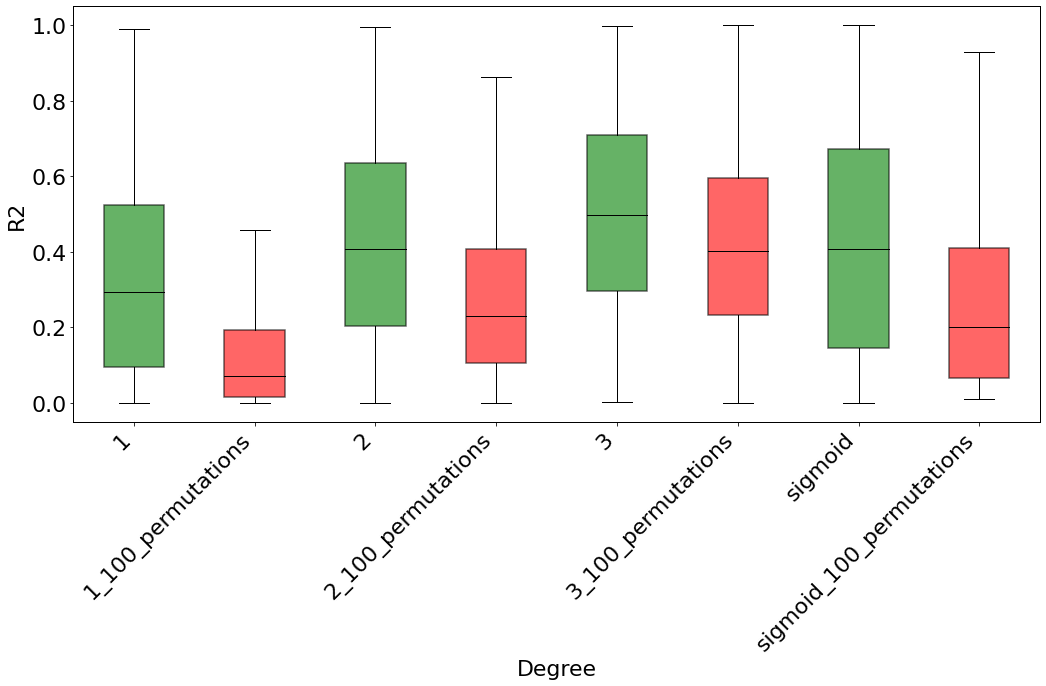

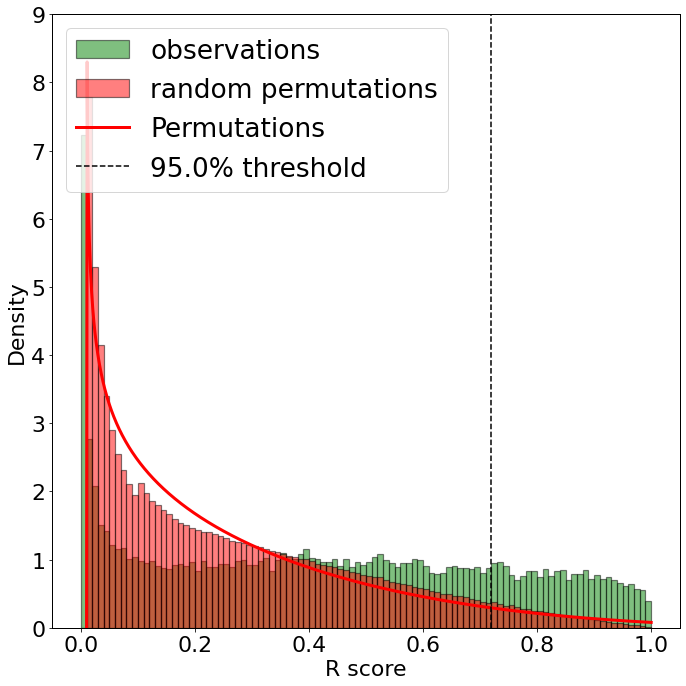

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


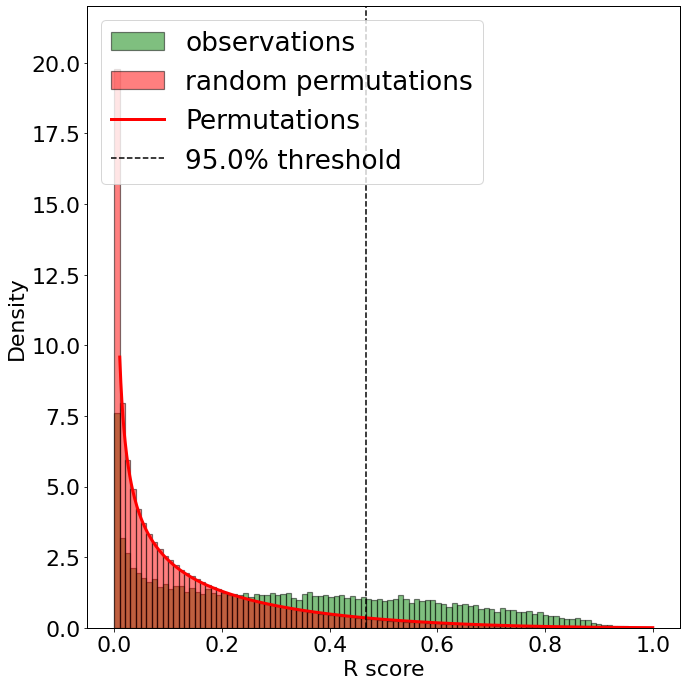

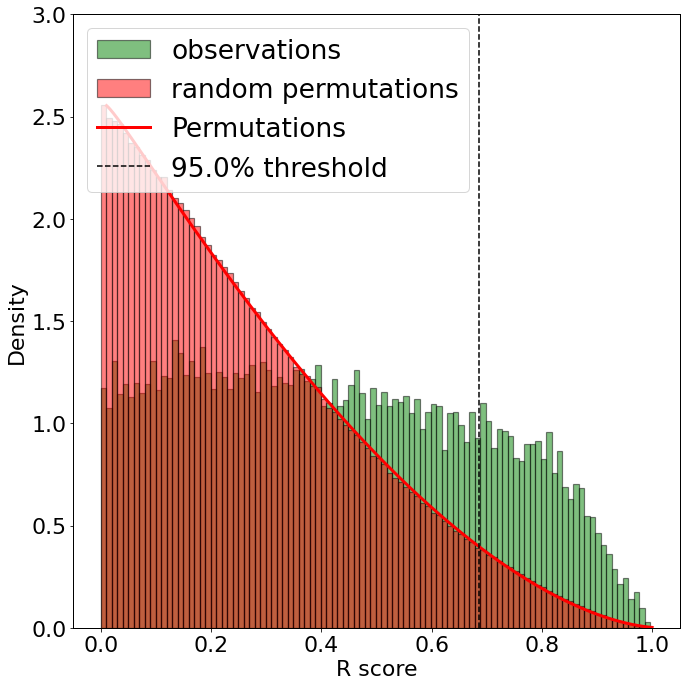

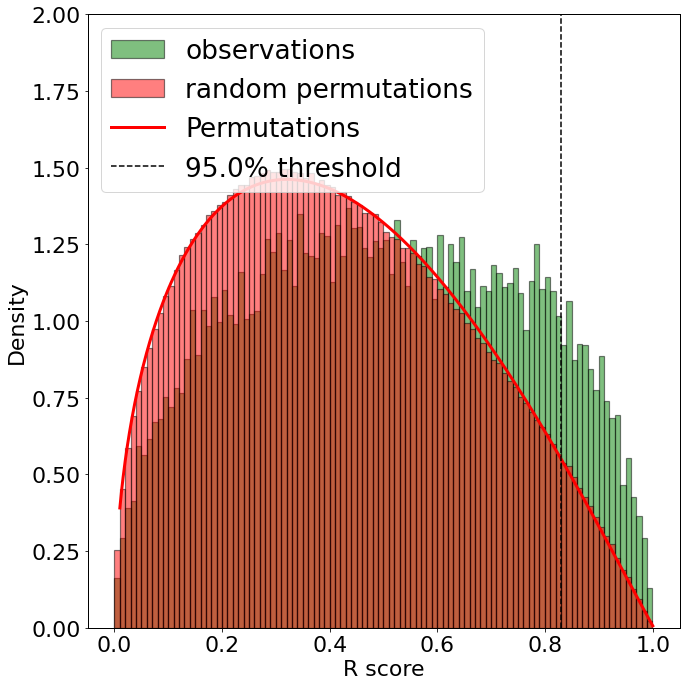

In [56]:
models_pvalue_meth=pa_methylome.plot_gof(poly_obs_scores_meth, sig_obs_scores_meth, poly_perm_scores_meth, sig_perm_scores_meth, dist_perm=True)

In [57]:
models_pvalue_meth

{'sigmoidal': [26877847553.0, 0.0, 0.7183041559513804],
 1: [39896006196.0, 0.0, 0.46775889423870853],
 2: [36207071470.0, 0.0, 0.6853576253043737],
 3: [31986043983.0, 0.0, 0.829048055760033]}

## Cluster genes

In [58]:
genes_clusters_meth=pa_methylome.cluster_genes(scores_meth)

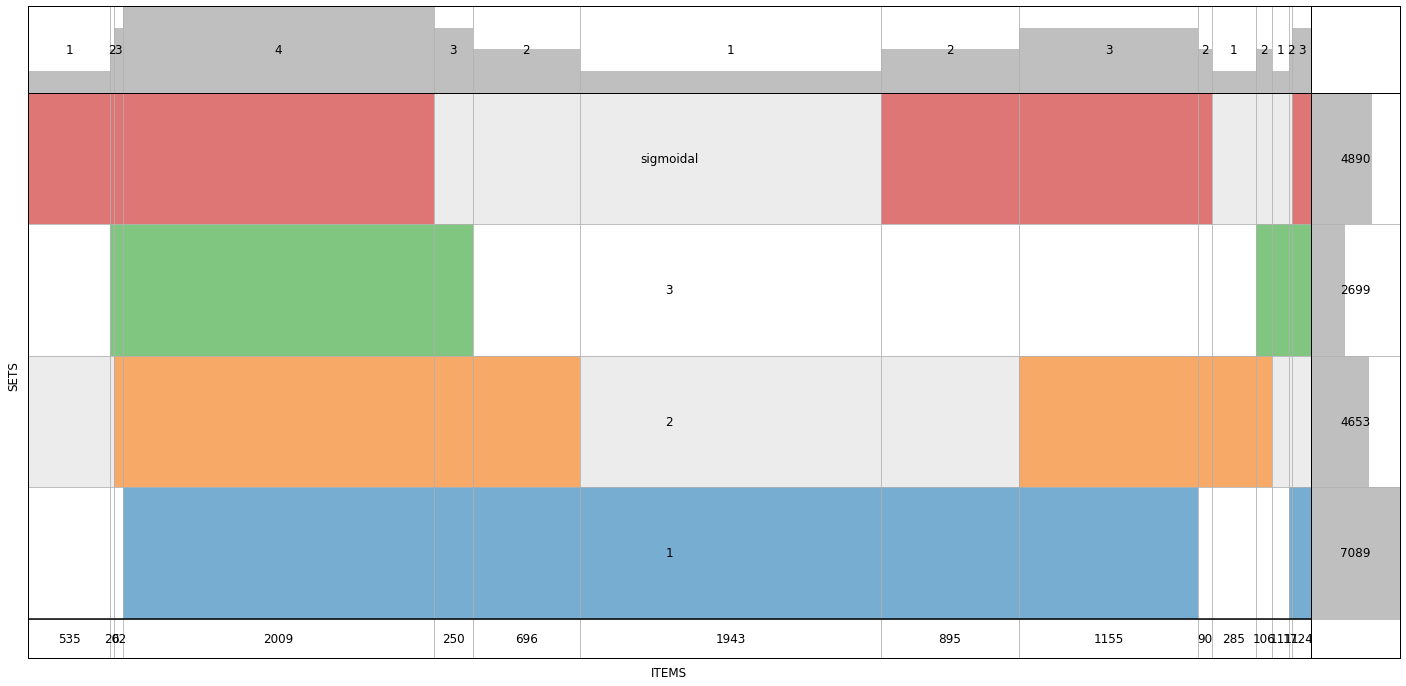

In [59]:
pa_methylome.plot_clusters(genes_clusters_meth)

In [60]:
summary_meth=pa_methylome.get_summary_table(genes_clusters_meth, scores_meth)

In [61]:
continuum_meth, sigmoid_meth, discarded_meth = pa_methylome.classify_genes(summary_meth)

/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:803: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont.loc[index] = row
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:803: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont.loc[index] = row
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:803: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

## Plot distribution of inflexion points for sigmoid genes

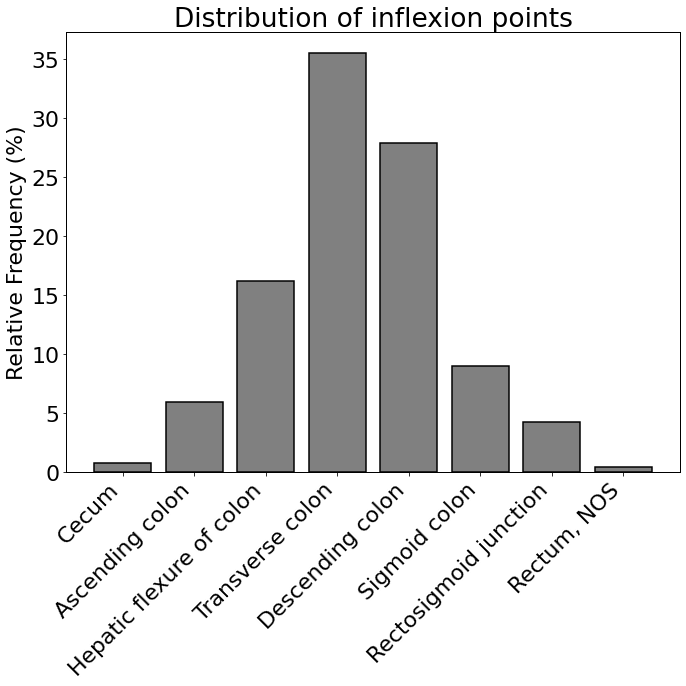

In [62]:
gene_list_meth, section_l_meth = pa_methylome.strict_sig_list(sigmoid_meth, sig_models_meth, plot_dist = True)

# Overlap between transcriptomic and methylation data

## continuum

In [63]:
gene_list = set([i.split('_')[0] for i in list(continuum_meth.index)])
query = mg.querymany(gene_list,
                      scopes='symbol',
                      species=9606,
                      fields='ensembl',
                      returnall=True)
meth_ensmbl = []
for element in query['out']:
    if 'ensembl' in element:
        entry = element['ensembl']
        if type(entry) is list:
            for sub_element in entry:
                meth_ensmbl.append(sub_element['gene'])
        else:
            meth_ensmbl.append(entry['gene'])

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-2951...done.
Finished.
117 input query terms found no hit:
	['FLJ10769', 'TMEM8A', 'TCTE3', 'C9orf84', 'VPRBP', 'C12orf48', 'C15orf58', 'C11orf49', 'CCDC130', '


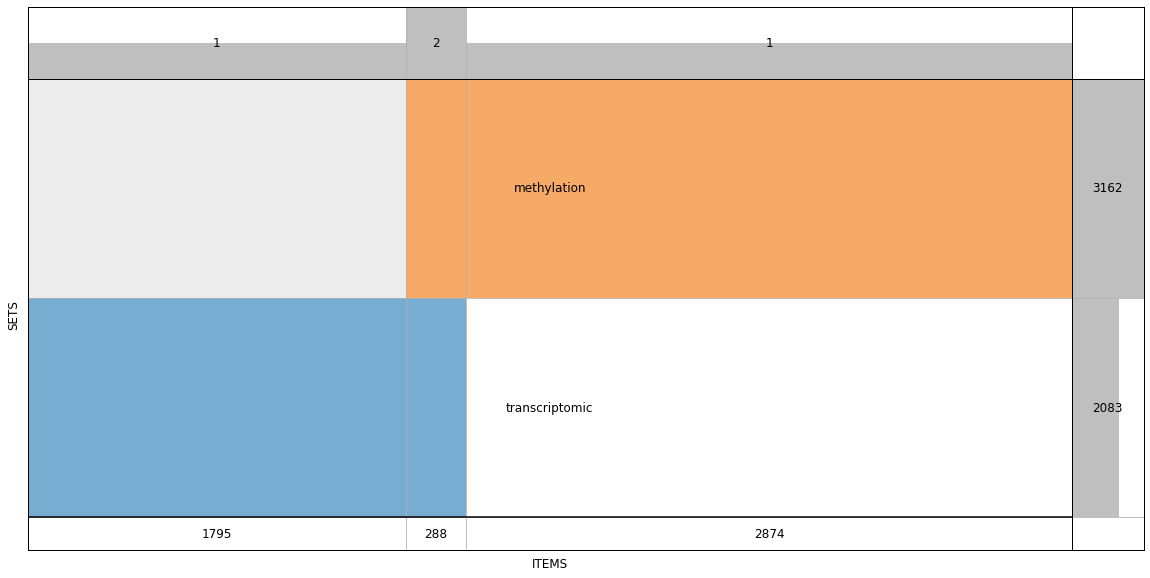

In [64]:
clusters = [set(continuum_tr.index), meth_ensmbl]
labels = ['transcriptomic', 'methylation']
plt.figure(figsize=(20, 10))
supervenn(clusters, labels)

## sigmoid

In [65]:
gene_list = set([i.split('_')[0] for i in list(sigmoid_meth.index)])
query = mg.querymany(gene_list,
                      scopes='symbol',
                      species=9606,
                      fields='ensembl',
                      returnall=True)
meth_ensmbl = []
for element in query['out']:
    if 'ensembl' in element:
        entry = element['ensembl']
        if type(entry) is list:
            for sub_element in entry:
                meth_ensmbl.append(sub_element['gene'])
        else:
            meth_ensmbl.append(entry['gene'])

querying 1-1000...done.
querying 1001-1107...done.
Finished.
1 input query terms found dup hits:
	[('SFTA3', 2)]
35 input query terms found no hit:
	['LACE1', 'FAM19A5', 'FAM189B', 'ADCK4', 'AGPAT6', 'FAM64A', 'CYR61', 'C4orf27', 'ORAOV1', 'METTL7A'


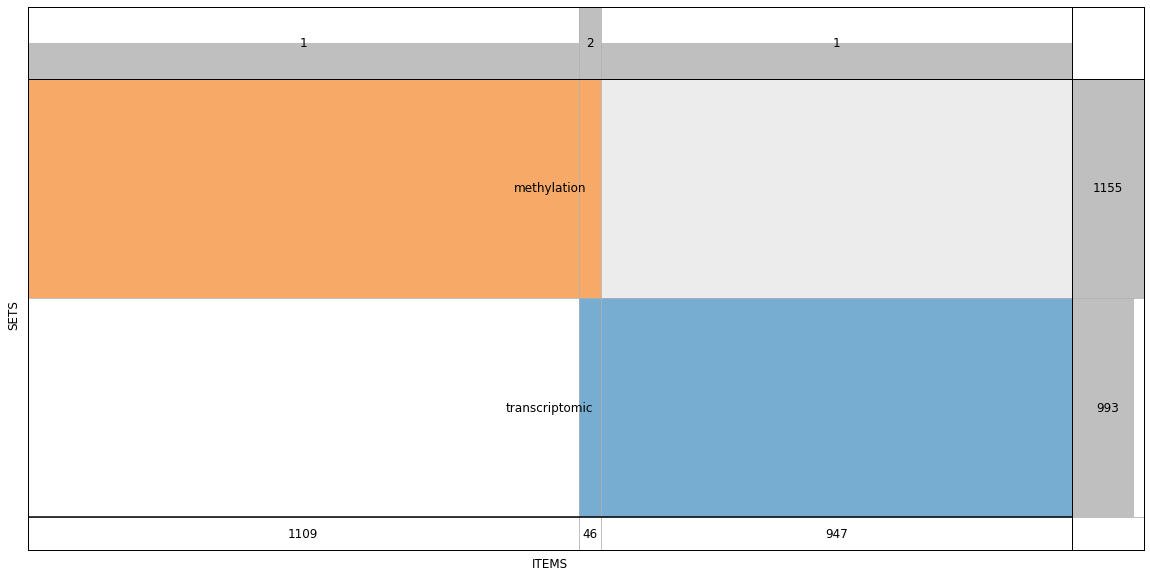

In [66]:
clusters = [set(sigmoid_tr.index), meth_ensmbl]
labels = ['transcriptomic', 'methylation']
plt.figure(figsize=(20, 10))
supervenn(clusters, labels)

# Overlap with methyldriver

In [67]:
trend = list(set([i.split('_')[0] for i in list(continuum_meth.index)]))
trend= trend +list(set([i.split('_')[0] for i in list(sigmoid_meth.index)]))
diff_methylated = pd.read_csv('../../../docker/analysis/methyldriver/COAD_hyper_hypo_methylated_genes.csv')
diff_methylated.set_index('gene_symbol', inplace=True)
trend = set(trend)

In [68]:
no_hypo=pd.DataFrame(columns=['genes'])
all_r_genes=pd.read_csv('../../../docker/analysis/methyldriver/methyldriver_all_genes.csv')
for index,row in all_r_genes.iterrows():
    if row['genes'] not in diff_methylated.index:
          no_hypo.loc[index]=row
no_hypo.set_index('genes', inplace=True)

In [69]:
for index, row in medians_meth.iterrows():
    medians_meth.loc[index, 'gene'] = index.split('_')[0]
medians_meth.set_index('gene', inplace=True)

In [70]:
medians_meth = medians_meth[~medians_meth.index.duplicated(keep='first')]

In [71]:
trend_df=pd.DataFrame(trend, columns=['genes'])
trend_df.set_index('genes', inplace=True)
no_trend=medians_meth.merge(trend_df, left_index=True, right_index=True, how='outer', indicator=True)
no_trend=no_trend[no_trend['_merge']=='left_only']

In [72]:
no_trend.merge(no_hypo, left_index=True, right_index=True, how='inner')

Cecum  Ascending colon  Hepatic flexure of colon  Transverse colon  \
A1BG    0.051682         0.055935                  0.042325          0.037469   
A1CF    0.473695         0.501855                  0.403518          0.479909   
A2M     0.115668         0.135327                  0.098105          0.130804   
A2ML1   0.431462         0.447097                  0.368159          0.485279   
A4GNT   0.338886         0.365925                  0.296978          0.398168   
...          ...              ...                       ...               ...   
ZWILCH  0.048879         0.049308                  0.054272          0.049511   
ZWINT   0.041230         0.042453                  0.039273          0.042470   
ZXDC    0.103585         0.107682                  0.101338          0.113822   
ZYG11B  0.045168         0.045260                  0.056247          0.049798   
ZZZ3    0.040225         0.041362                  0.040713          0.039524   

        Descending colon  Sigmoid colon  Rectosigmoid junction  Rectum, NOS  \
A1BG            0.045788       0.048893               0.053876     0.049203   
A1CF            0.400775       0.467102               0.444876     0.422339   
A2M             0.103928       0.133955               0.107996     0.128271   
A2ML1           0.465167       0.424371               0.400420     0.424255   
A4GNT           0.337555       0.345984               0.337827     0.336771   
...                  ...            ...                    ...          ...   
ZWILCH          0.047406       0.051804               0.045610     0.049430   
ZWINT           0.038812       0.041995               0.039607     0.037112   
ZXDC            0.099669       0.097111               0.094077     0.094604   
ZYG11B          0.041466       0.043542               0.046767     0.046016   
ZZZ3            0.039367       0.041640               0.040306     0.041556   

           _merge  
A1BG    left_only  
A1CF    left_only  
A2M     left_only  
A2ML1   left_only  
A4GNT   left_only  
...           ...  
ZWILCH  left_only  
ZWINT   left_only  
ZXDC    left_only  
ZYG11B  left_only  
ZZZ3    left_only  

[10431 rows x 9 columns]

In [73]:
trend_df.merge(no_hypo, left_index=True, right_index=True, how='inner')

Empty DataFrame
Columns: []
Index: [PPIL1, IRGC, EXOC3, TM9SF3, MED23, FLJ10769, CCM2, UTP23, ADORA1, BLOC1S6, ISY1, ZNF623, TMEM8A, SP1, NXPH3, BIK, AXIN2, NTRK3, ITGA5, FRAS1, ZNF516, FBXL3, CHRM1, SLC23A3, CRIM1, SDF2, TCTE3, FAM72A, C9orf84, SLITRK3, PGBD5, FBXO21, GTF2H5, ZNF521, TDRD3, PEX26, CACNA2D3, FOXM1, ANO7, CAV2, EIF4E3, PRDM13, ST8SIA3, LTA4H, RAB40C, UGGT1, PDLIM7, RANBP3L, SRC, ADCK4, DHX58, ANKRD18A, DDIT4, CTDSPL, ETV6, REST, MRPS24, STRA6, L3HYPDH, APLP2, AGPAT6, NXPE4, ANKFY1, KCNH3, CLINT1, GRIN3A, PAX7, RSPH14, FGF19, TMEM51, HOXC11, RMI1, DZIP3, C2CD2L, HIVEP2, SEMA6A, VPRBP, S100A14, DEFB123, HEMK1, TFAP2A, CACNB4, C12orf48, SCNM1, OXA1L, DCP2, SFI1, PRSS50, TMEM59L, CFAP53, TAB2, ZC3H3, MANEA, C15orf58, OPN1SW, RANGAP1, HYAL2, ERMARD, HOXB4, RAB22A, ...]

[3775 rows x 0 columns]

In [74]:
cont_df = pd.DataFrame(list(set([i.split('_')[0] for i in list(continuum_meth.index)])), columns=['gene'])
cont_df.set_index('gene', inplace=True)

In [75]:
diff_methylated

Empty DataFrame
Columns: []
Index: [FAM200A, ZNF655, MLH1, ITPKB, ZNF345, HSPA1A, CCT6B, QKI, SPART, HSPA1L, ADHFE1, LYNX1, ZNF625, CHST10, NR3C1, ZNF461, KLF7, PLCB1, ZNF85, CHST11, ZNF543, PLEKHO1, SIK1, SEPTIN9, KLHL28, PARP8, DDX6, RPL39L, CFAP54, ARRDC2, MDFIC, FGFR1, TCF4, MICU3, ADAL, UBLCP1, GNE, CMTM3, CDC42SE1, ZNF570, RIMKLB, VAV3, ZNF614, ZNF83, CPNE8, KRBA1, ATP8B2, CCDC169, CHFR, ZNF829, CD40, FUZ, KHDC1, ZNF254, AKR1B1, APC, CCDC106, ZNF382, PHF11, ZNF480, VIM, GRWD1, SLCO4C1, C2orf74, RCCD1, CAMTA2, DCAF5, DDX58, DCBLD2, MAP1LC3A, MYH10, FAM126A, FANCC, CCDC13, TMEM220, TSC22D2, SNX32, ZNF529, PRRT3, PCDH9, CAPS2, HCST, CTPS1, ZNF43, ACD, SLC43A3, TRIB2, BEND5, JAM3, ZMYM2, ZFP82, ALK, LRRC63, SALL2, ZNF608, ADAP1, MLLT11, EHD3, STX16, DPY19L2, ...]

[536 rows x 0 columns]

In [76]:
cont_methyldriver = cont_df.merge(diff_methylated, how='inner', left_index=True, right_index=True)

In [77]:
len(cont_methyldriver)

106

In [78]:
sig_df = pd.DataFrame(list(set([i.split('_')[0] for i in list(sigmoid_meth.index)])), columns=['gene'])
sig_df.set_index('gene', inplace=True)
sig_methyldriver = sig_df.merge(diff_methylated, how='inner', left_index=True, right_index=True)

In [79]:
import numpy as np
table = np.array([[171, 347], [3775, 10431]])
from scipy.stats import fisher_exact
oddsr, p = fisher_exact(table, alternative='two-sided')
p

0.0014458713274339303

# MUTATIONS PROFILING

In [80]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_mutations = ProfileAnalysis('../../../docker/analysis/mutations')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:155: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:161: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:167: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:173: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Calculate median value for each colon section

In [81]:
medians_mut, mad_mut = pa_mutations.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


In [82]:
medians_mut.head()

Cecum  Ascending_Colon  Hepatic_Flexure  Transverse_Colon  \
ensmbl_id                                                                  
A2M         6.024096         8.000000         5.555556         12.903226   
A2ML1       9.638554        12.000000         5.555556         25.806452   
AASS        7.228916         4.000000        11.111111          6.451613   
ABCA1      13.253012        10.666667        11.111111         12.903226   
ABCA10      8.433735         9.333333         5.555556          9.677419   

           Descending_Colon  Sigmoid_Colon  Rectosigmoid_Junction    Rectum  
ensmbl_id                                                                    
A2M               11.111111       2.752294               6.976744  6.849315  
A2ML1              0.000000       3.669725               2.325581  4.109589  
AASS              11.111111       0.917431               2.325581  6.849315  
ABCA1              5.555556       6.422018               0.000000  5.479452  
ABCA10             0.000000       4.587156               0.000000  8.219178

## Fit Observables

In [83]:
scores_mut, poly_obs_scores_mut, sig_obs_scores_mut, poly_models_mut, sig_models_mut = pa_mutations.fit_data(medians_mut, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Fit Random permutated data

In [84]:
poly_perm_scores_mut, sig_perm_scores_mut, sig_perm_models_mut=pa_mutations.fit_random_data(medians_mut, guess_bounds = False)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

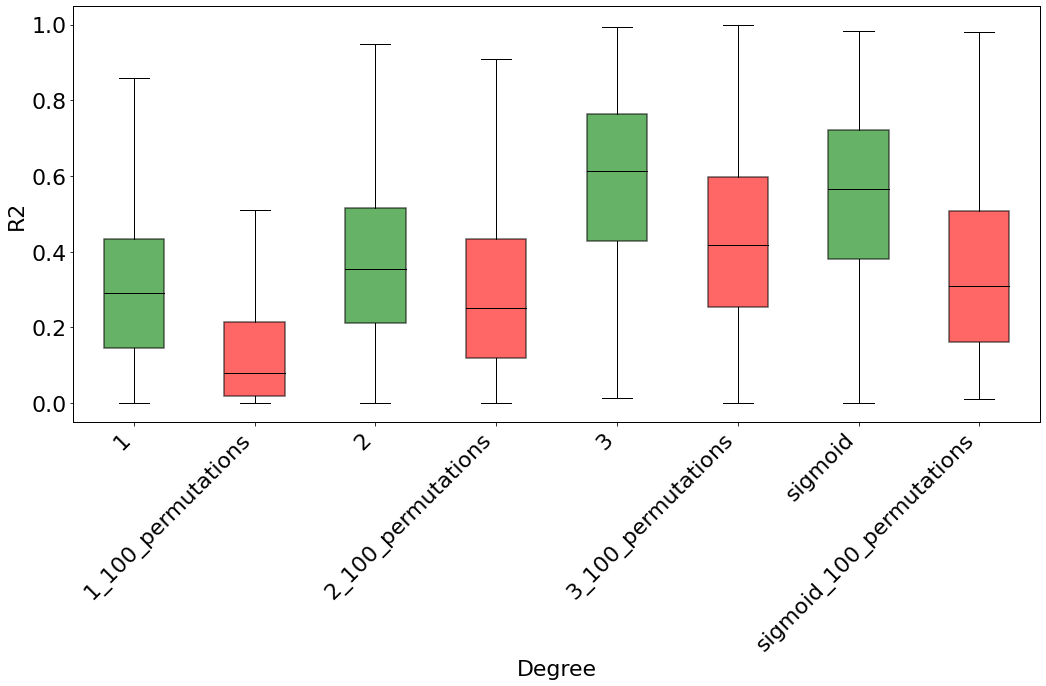

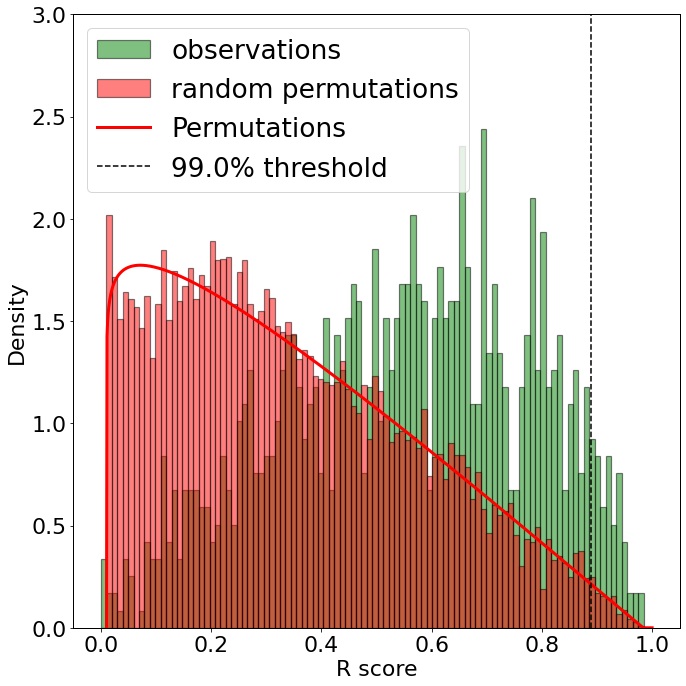

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


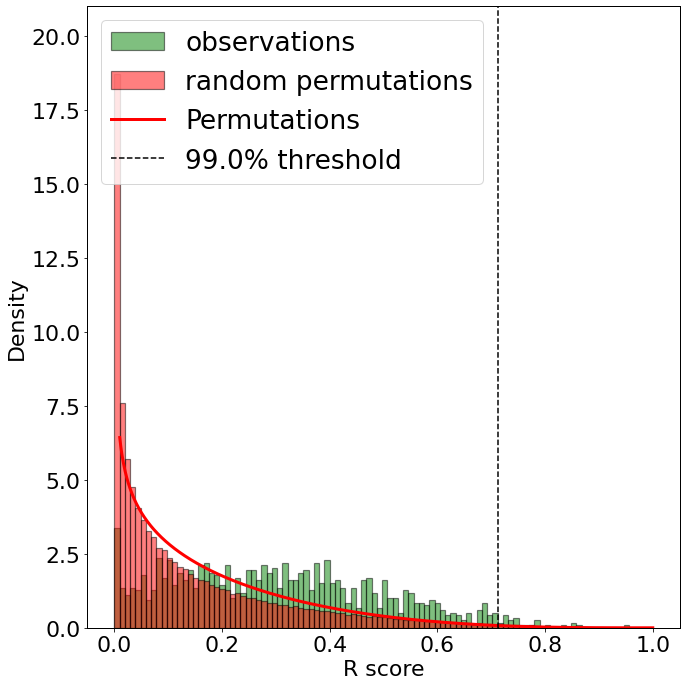

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


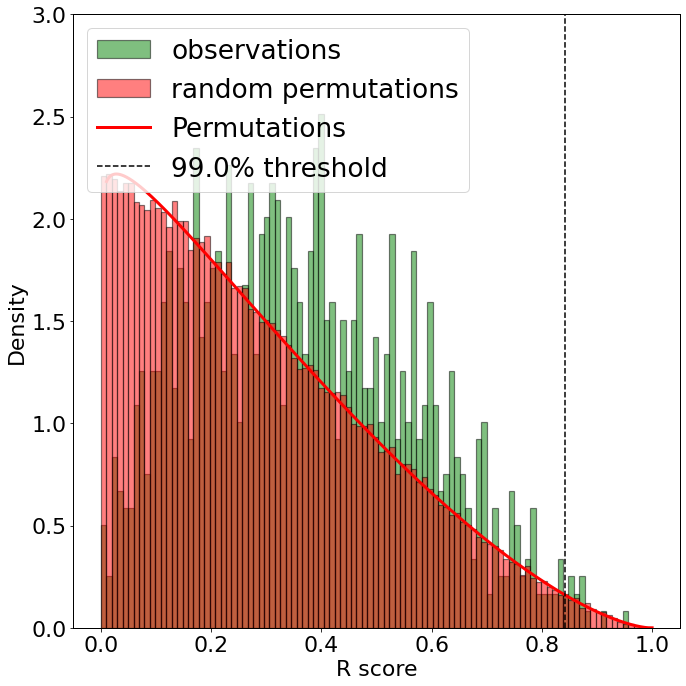

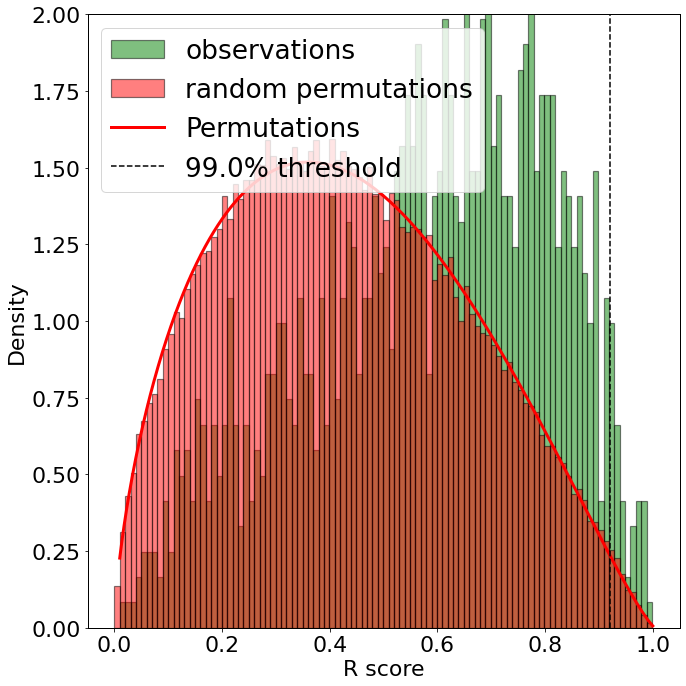

In [85]:
models_pvalue_mut=pa_mutations.plot_gof(poly_obs_scores_mut, sig_obs_scores_mut, poly_perm_scores_mut, sig_perm_scores_mut, dist_perm=True)

In [86]:
models_pvalue_mut

{'sigmoidal': [12299880.0, 3.660696705729165e-163, 0.8891894403793906],
 1: [110699491.0, 1.6022984665364532e-205, 0.7120598957004031],
 2: [90239233.0, 7.983572969412103e-44, 0.842793036689256],
 3: [100500307.0, 9.536620693832115e-110, 0.9196794878461722]}

## Cluster genes

In [87]:
genes_clusters_mut = pa_mutations.cluster_genes(scores_mut)

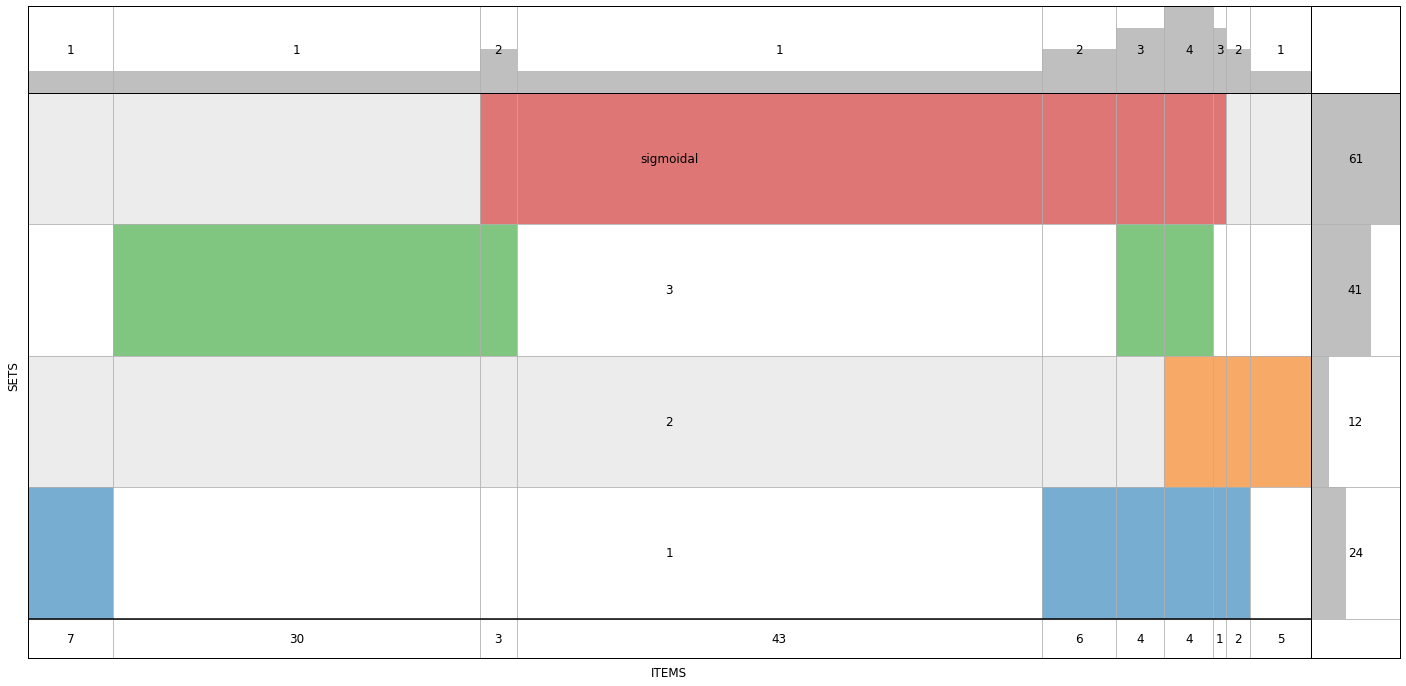

In [88]:
pa_mutations.plot_clusters(genes_clusters_mut)

In [89]:
summary_mut = pa_mutations.get_summary_table(genes_clusters_mut, scores_mut)

In [90]:
continuum_mut, sigmoid_mut, discarded_mut = pa_mutations.classify_genes(summary_mut)

# Figure 1E

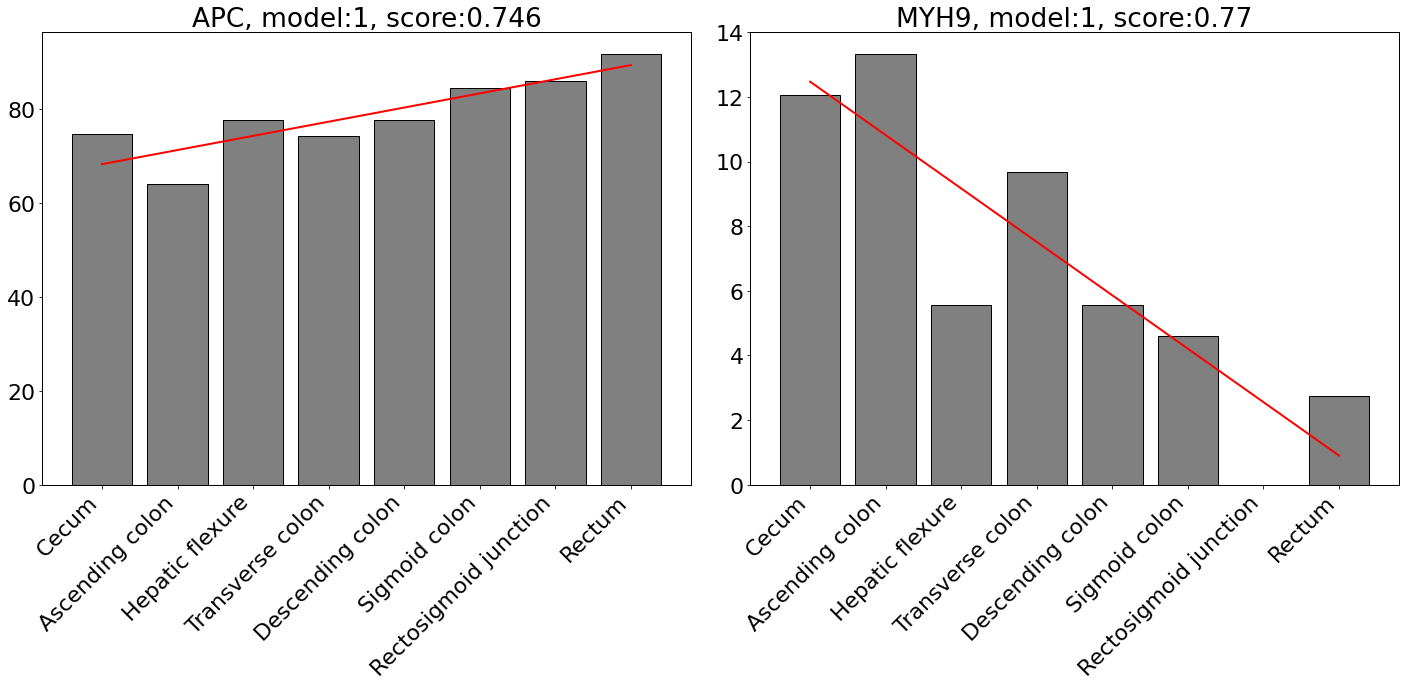

In [91]:
pa_mutations.plot_fitting_bars(continuum_mut, ['APC','MYH9'], medians_mut, mad_mut, poly_models_mut, sig_models_mut, 'continuum', plot_mad=False)

# ANEUPLOIDY PROFILING

## Duplication

In [92]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_duplication = ProfileAnalysis('../../../docker/analysis/aneuploidy/duplication')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:155: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:161: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:167: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:173: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Assign each sample in clinical data file to a colon section

In [93]:
pa_duplication.create_samples_to_sections_table()

## Calculate median value for each colon section

In [94]:
medians_dup, mad_dup = pa_duplication.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


In [95]:
#remove samples with more than 4 section containing zeroes
medians_dup=medians_dup[(medians_dup==0).sum(axis=1)<4]

## Fit Observables

In [96]:
scores_dup, poly_obs_scores_dup, sig_obs_scores_dup, poly_models_dup, sig_models_dup = pa_duplication.fit_data(medians_dup, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Fit Random permutated data

In [97]:
poly_perm_scores_dup, sig_perm_scores_dup, sig_perm_models_dup=pa_duplication.fit_random_data(medians_dup, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

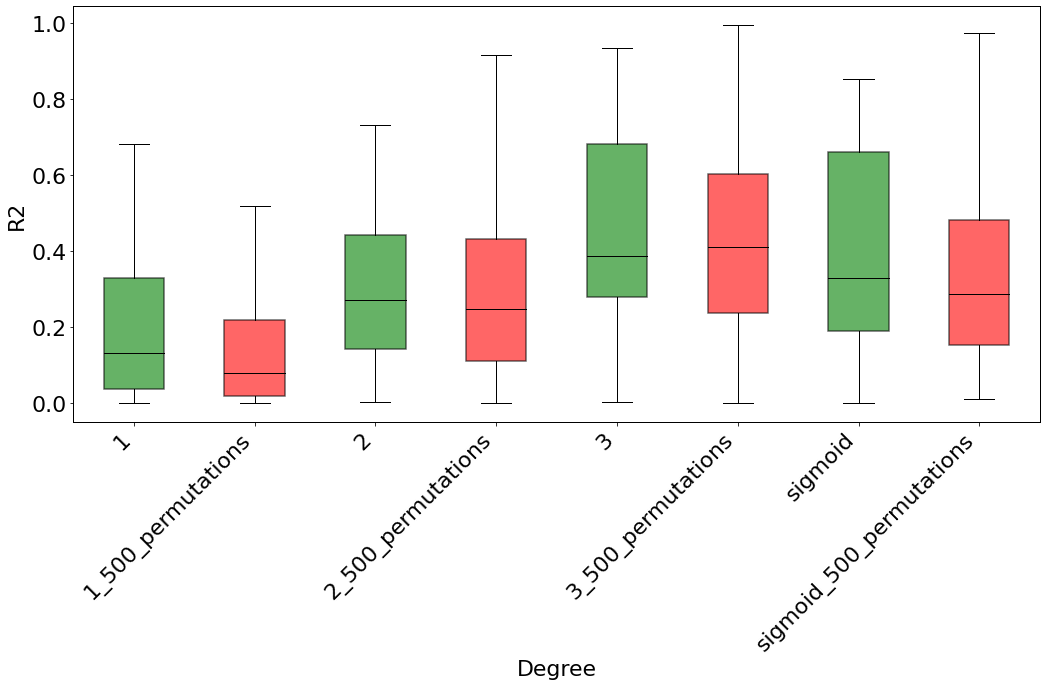

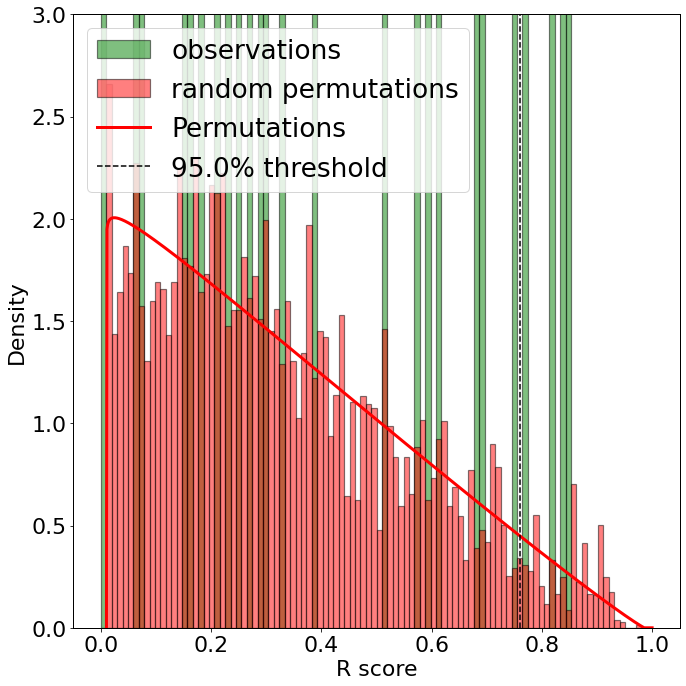

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


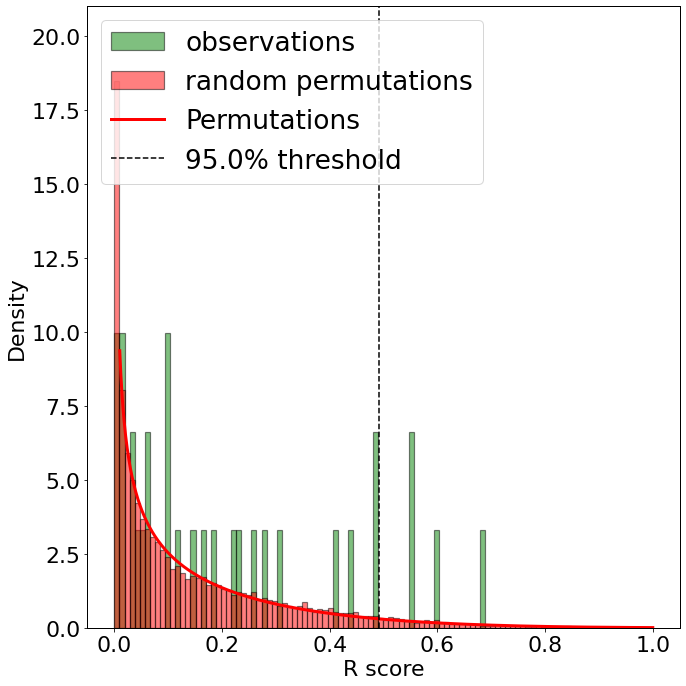

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


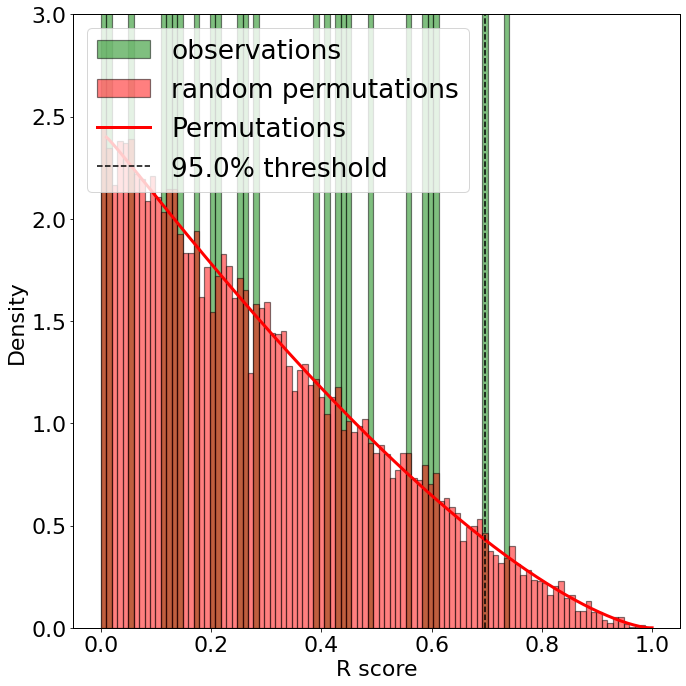

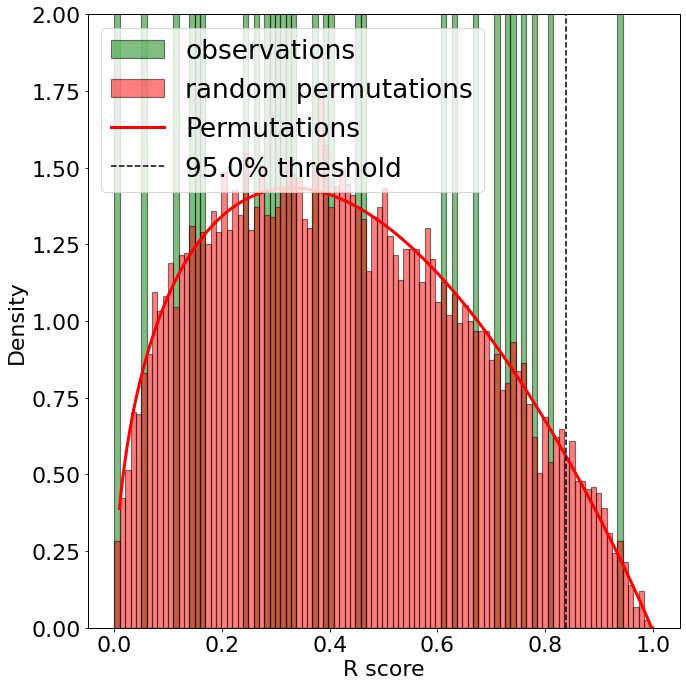

In [98]:
models_pvalue_dup=pa_duplication.plot_gof(poly_obs_scores_dup, sig_obs_scores_dup, poly_perm_scores_dup, sig_perm_scores_dup, dist_perm=True)

In [99]:
models_pvalue_dup

{'sigmoidal': [238814.0, 0.10377183028996045, 0.7599096877653357],
 1: [304110.0, 0.03292728212893891, 0.4918106539579493],
 2: [282390.0, 0.1564938677472315, 0.6973981362585313],
 3: [264577.0, 0.3714888066400217, 0.8390480220630643]}

## Cluster genes

In [100]:
genes_clusters_dup=pa_duplication.cluster_genes(scores_dup)

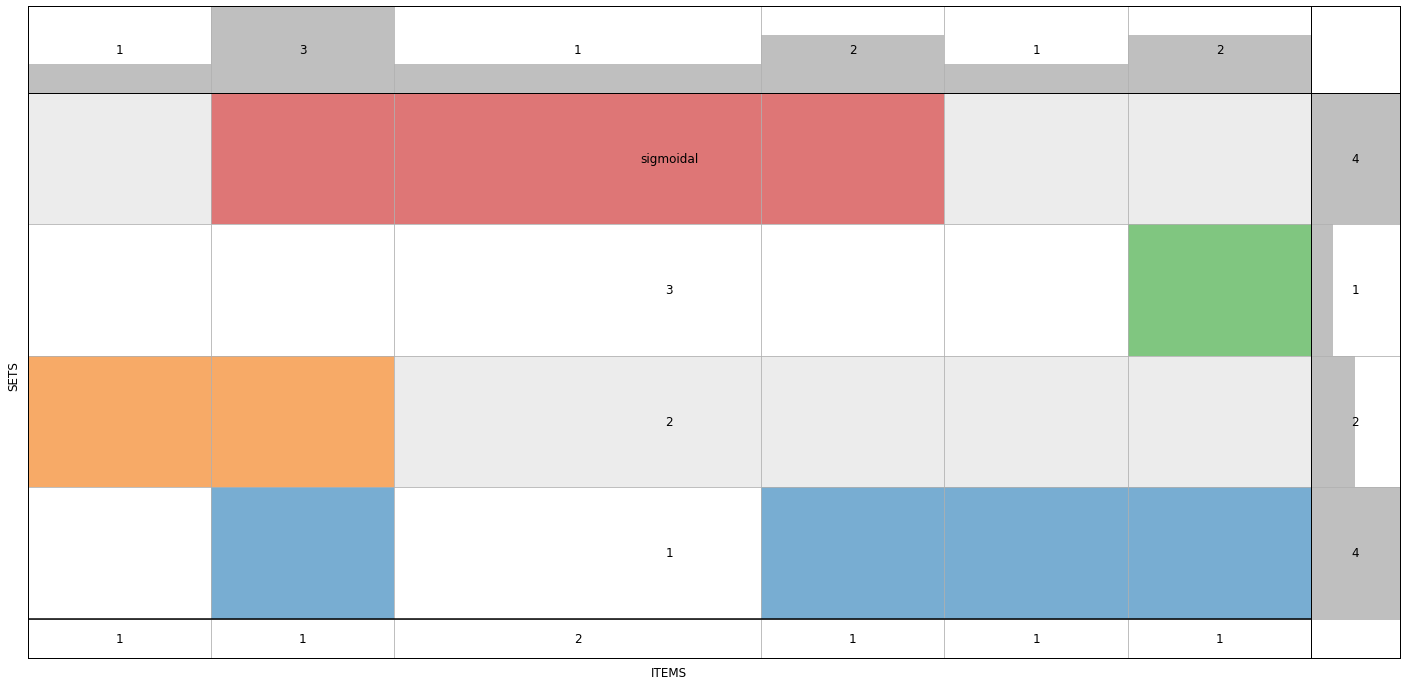

In [101]:
pa_duplication.plot_clusters(genes_clusters_dup)

In [102]:
summary_dup=pa_duplication.get_summary_table(genes_clusters_dup, scores_dup)

In [103]:
continuum_dup, sigmoid_dup, discarded_dup = pa_duplication.classify_genes(summary_dup)

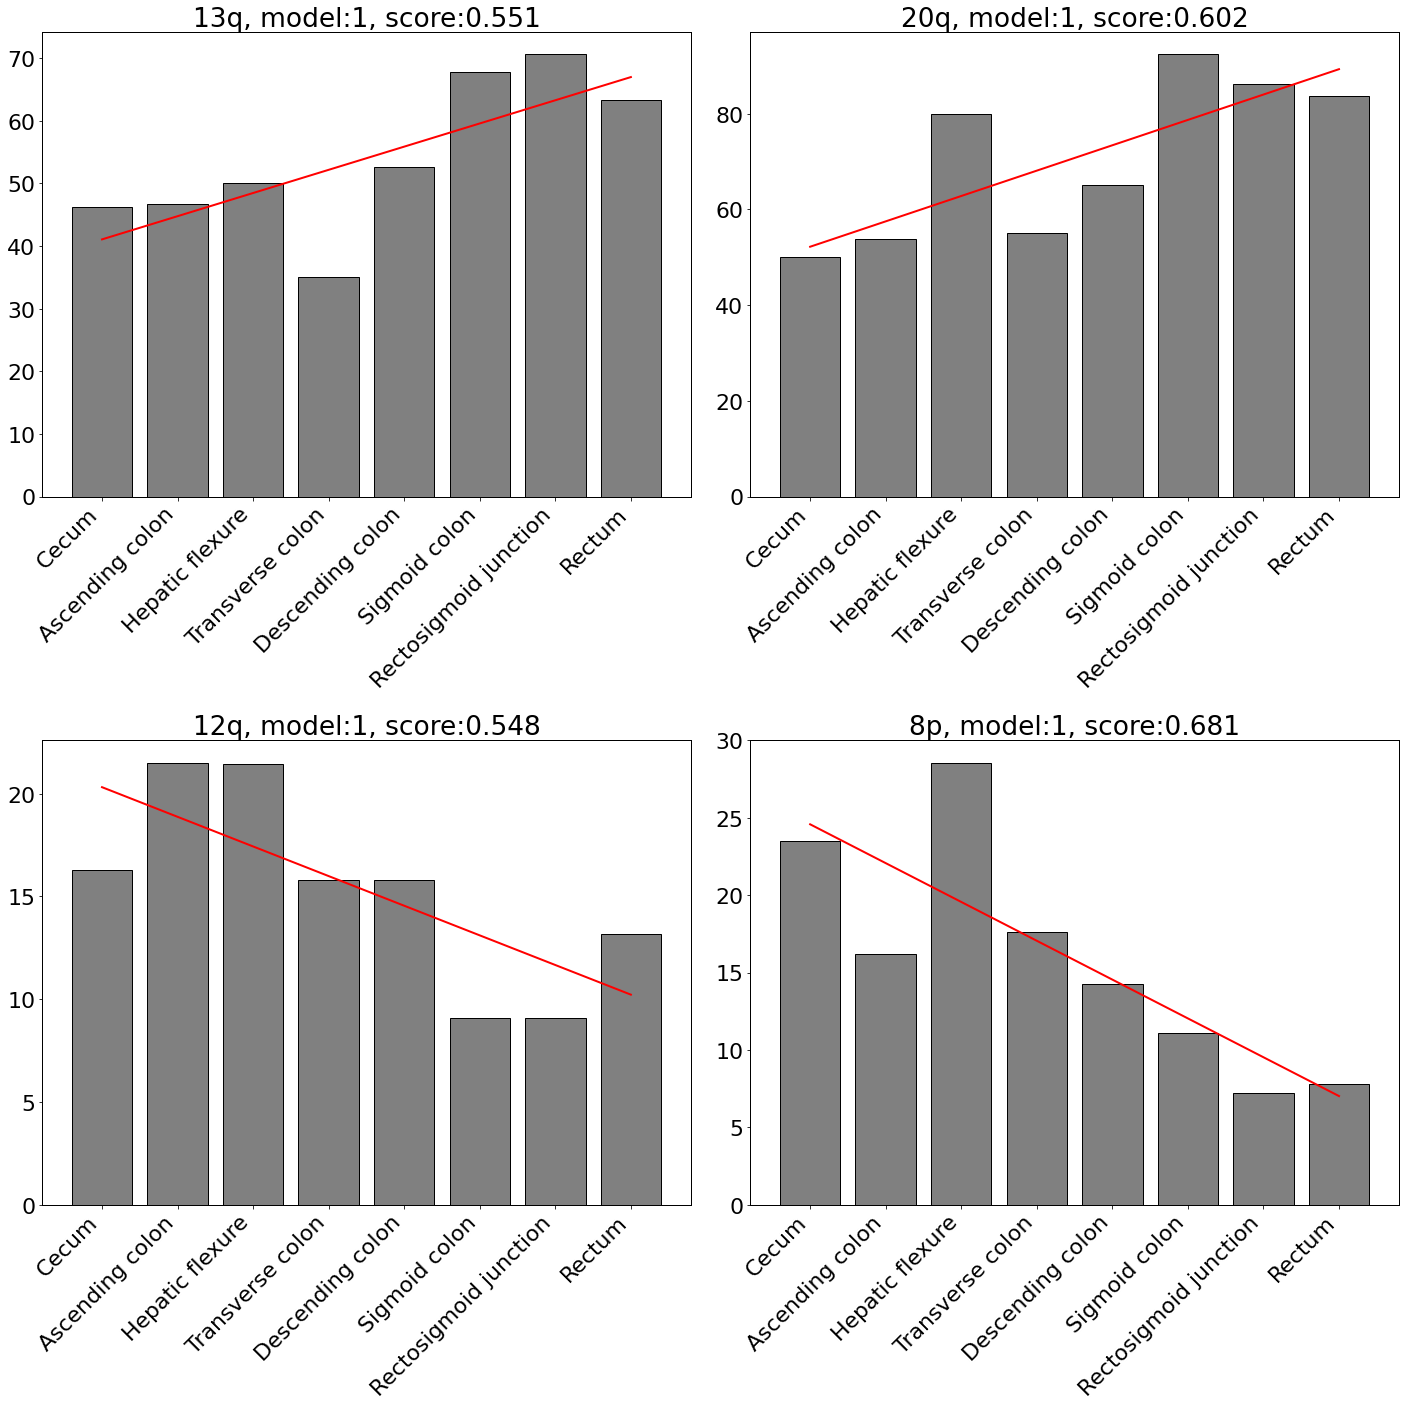

In [104]:
pa_duplication.plot_fitting_bars(continuum_dup, continuum_dup.index, medians_dup, mad_dup, poly_models_dup, sig_models_dup, 'continuum', plot_mad=False)

## Deletion

In [105]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_deletion = ProfileAnalysis('../../../docker/analysis/aneuploidy/deletion')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:155: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:161: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:167: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:173: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Assign each sample in clinical data file to a colon section

In [106]:
pa_deletion.create_samples_to_sections_table()

## Calculate median value for each colon section

In [107]:
medians_del, mad_del = pa_deletion.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


In [108]:
medians_del = medians_del[(medians_del==0).sum(axis=1)<4]

In [109]:
medians_del.head()

Cecum  Ascending colon  Hepatic flexure of colon  Transverse colon  \
1p  18.750000        27.027027                 27.272727         11.111111   
1q   6.818182         6.493506                 20.000000          0.000000   
2p   2.272727         6.410256                  6.666667          5.263158   
2q   2.298851         6.250000                  6.666667          5.555556   
3p   6.976744        16.216216                 21.428571          5.263158   

    Descending colon  Sigmoid colon  Rectosigmoid junction  Rectum, NOS  
1p         37.500000      36.363636              44.000000    34.375000  
1q          5.555556      12.500000              11.940299     9.459459  
2p          0.000000       4.950495               9.230769     5.263158  
2q          0.000000       3.030303               5.633803     1.388889  
3p          9.523810      13.592233              15.384615    16.216216

## Fit Observables

In [110]:
scores_del, poly_obs_scores_del, sig_obs_scores_del, poly_models_del, sig_models_del = pa_deletion.fit_data(medians_del, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Fit Random permutated data

In [111]:
poly_perm_scores_del, sig_perm_scores_del, sig_perm_models_del = pa_deletion.fit_random_data(medians_del, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

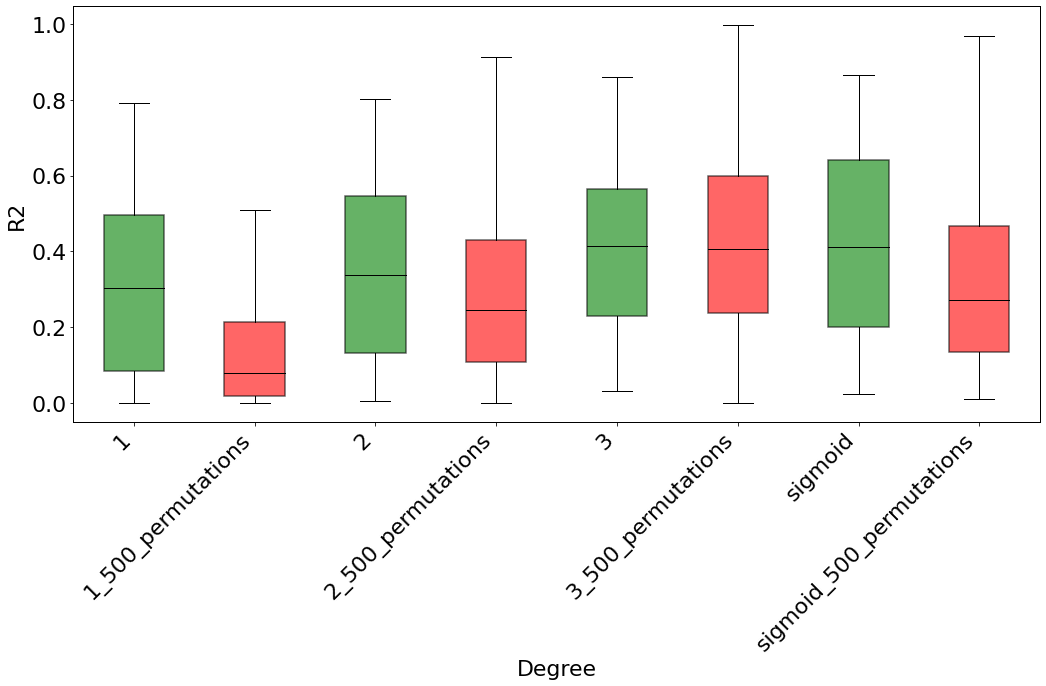

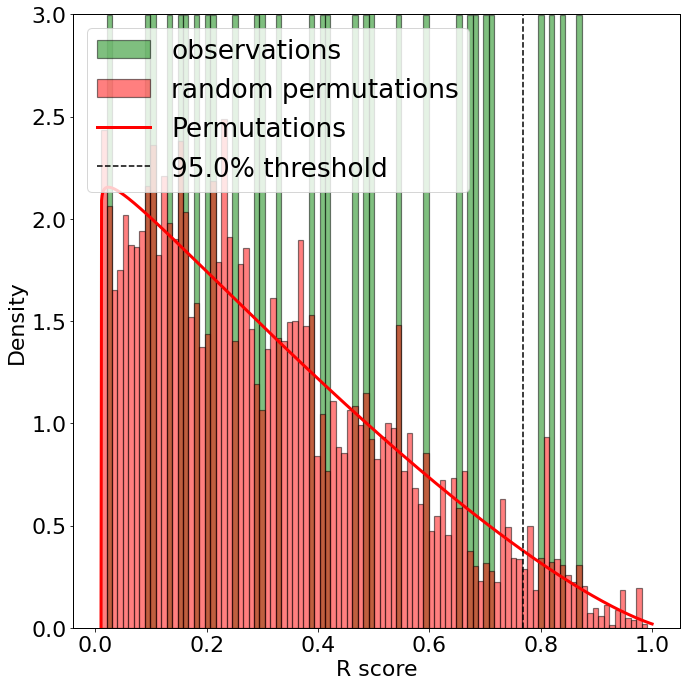

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


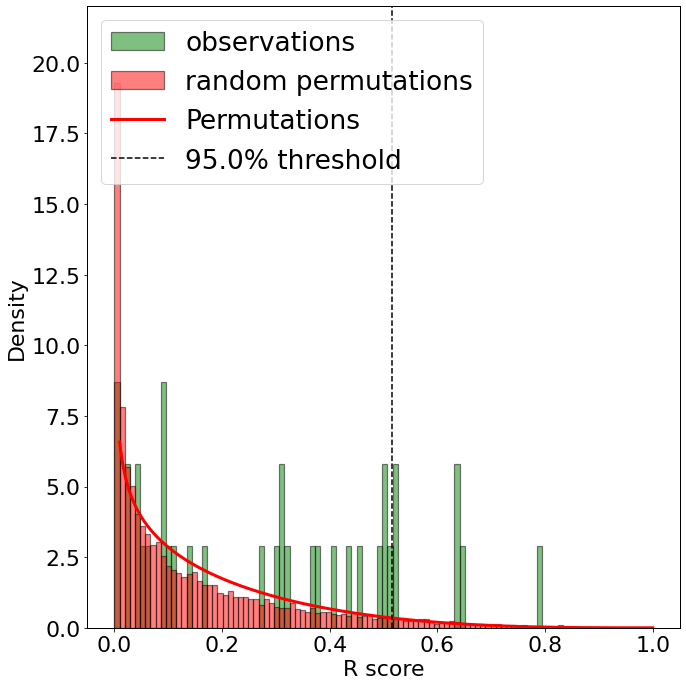

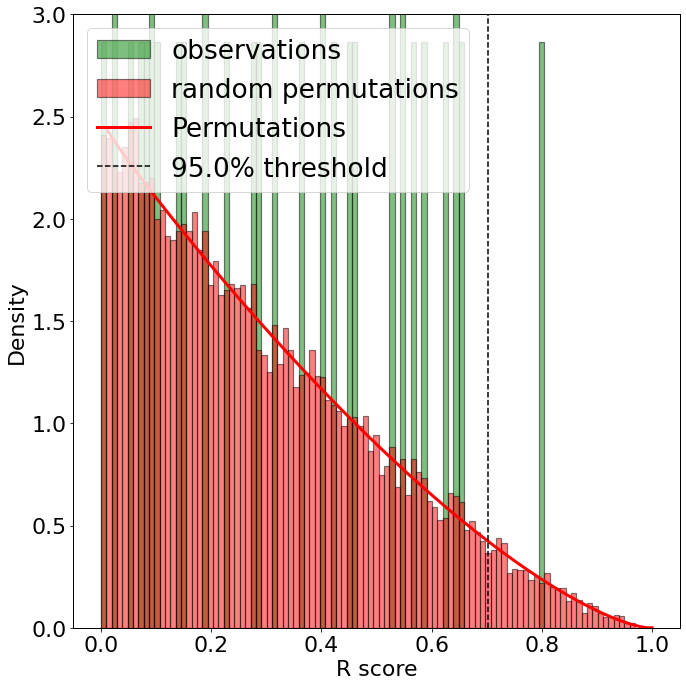

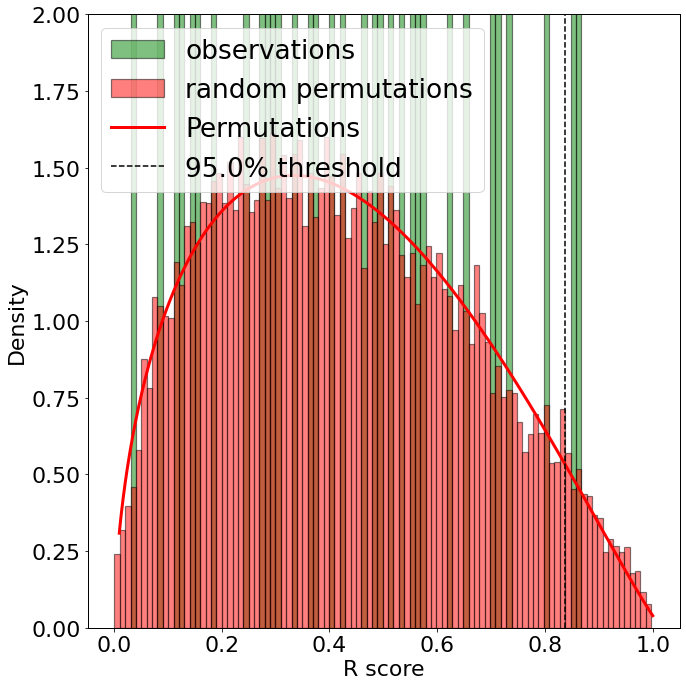

In [112]:
models_pvalue_del = pa_deletion.plot_gof(poly_obs_scores_del, sig_obs_scores_del, poly_perm_scores_del, sig_perm_scores_del, dist_perm=True)

In [113]:
models_pvalue_del

{'sigmoidal': [331090.5, 0.005209865571153239, 0.7687911349814885],
 1: [447565.0, 3.759022809708133e-05, 0.5159093252883007],
 2: [370621.0, 0.06761150503601553, 0.7029154615559993],
 3: [320674.0, 0.5424420982380677, 0.8371783200558296]}

In [114]:
genes_clusters_del=pa_deletion.cluster_genes(scores_del)

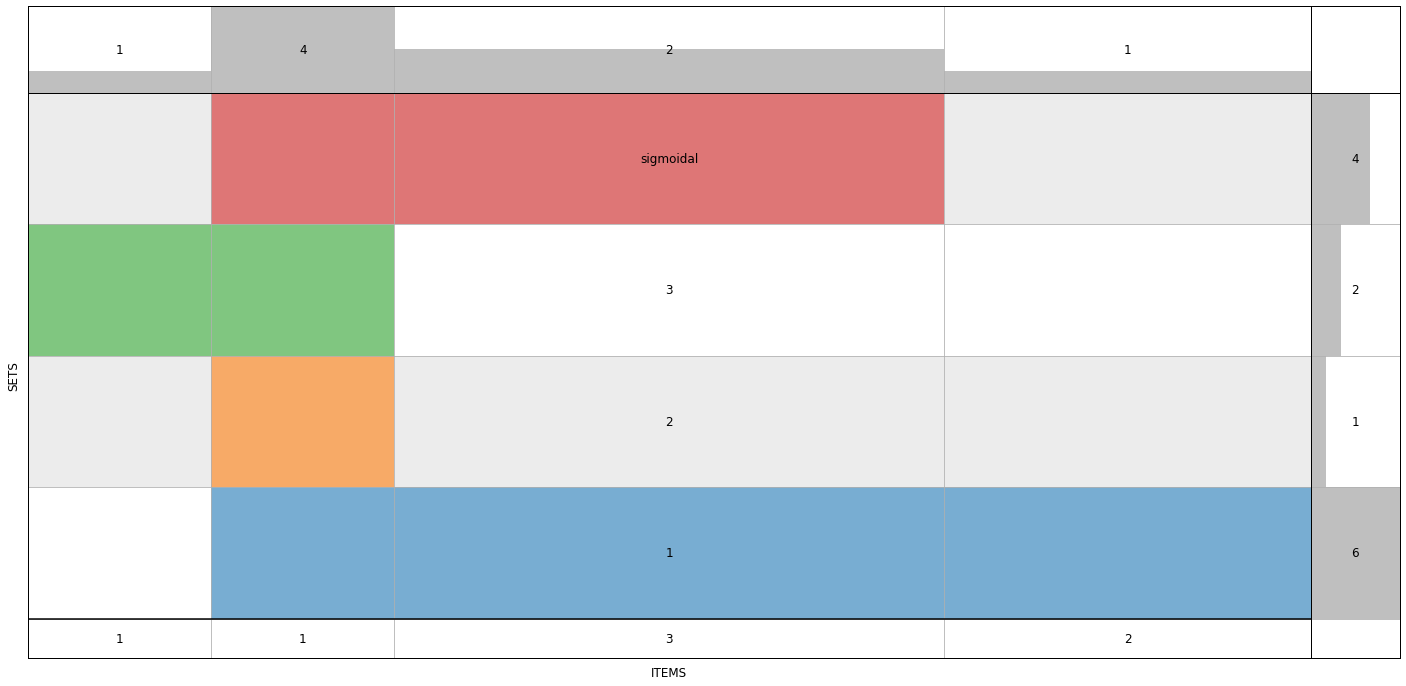

In [115]:
pa_deletion.plot_clusters(genes_clusters_del)

In [116]:
summary_del=pa_deletion.get_summary_table(genes_clusters_del, scores_del)

In [117]:
continuum_del, sigmoid_del, discarded_del = pa_deletion.classify_genes(summary_del)

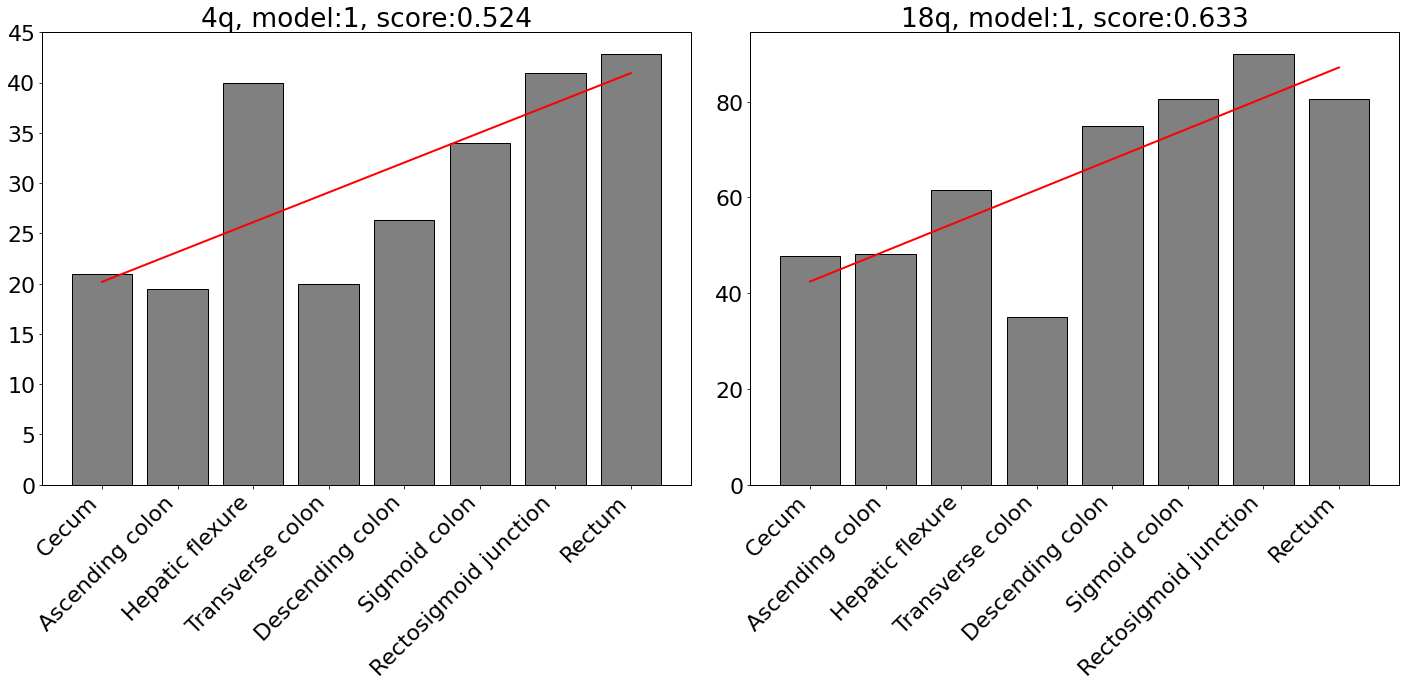

In [118]:
pa_deletion.plot_fitting_bars(continuum_del, continuum_del.index, medians_del, mad_del, poly_models_del, sig_models_del, 'continuum', plot_mad=False)

/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:428: RuntimeWarning: overflow encountered in exp
  return c / (1 + np.exp(-k*(x-x0))) + y0


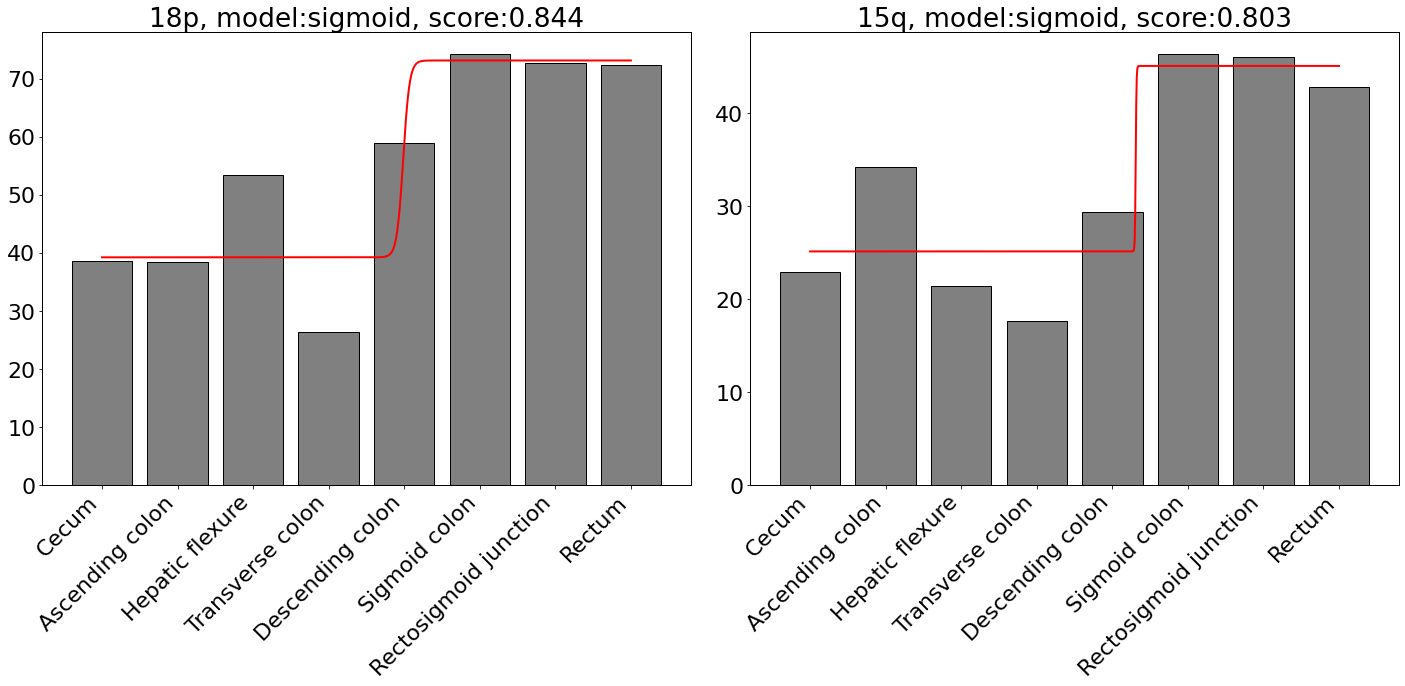

In [119]:
pa_deletion.plot_fitting_bars(sigmoid_del, sigmoid_del.index, medians_del, mad_del, poly_models_del, sig_models_del, 'sigmoid', plot_mad=False)

# CMS PROFILING

In [120]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_cms = ProfileAnalysis('../../../docker/analysis/cms')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:155: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:161: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:167: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:173: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Assign each sample in clinical data file to a colon section

In [121]:
pa_cms.create_samples_to_sections_table()

## Calculate median value for each colon section

In [122]:
medians_cms, mad_cms = pa_cms.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


In [123]:
medians_cms

Cecum  Ascending colon  Hepatic flexure of colon  Transverse colon  \
CMS1  26.086957        45.901639                 27.272727         25.000000   
CMS2  24.637681        24.590164                 54.545455         33.333333   
CMS3  26.086957        11.475410                 18.181818         16.666667   
CMS4  23.188406        18.032787                  0.000000         25.000000   

      Splenic flexure of colon  Descending colon  Sigmoid colon  \
CMS1                  0.000000          0.000000       3.333333   
CMS2                 33.333333         46.153846      58.888889   
CMS3                 33.333333         30.769231       8.888889   
CMS4                 33.333333         23.076923      28.888889   

      Rectosigmoid junction  Rectum, NOS  
CMS1               1.886792     4.109589  
CMS2              56.603774    60.273973  
CMS3              11.320755    12.328767  
CMS4              30.188679    23.287671

## Fit Observables

In [124]:
scores_cms, poly_obs_scores_cms, sig_obs_scores_cms, poly_models_cms, sig_models_cms = pa_cms.fit_data(medians_cms, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Fit Random permutated data

In [125]:
poly_perm_scores_cms, sig_perm_scores_cms, sig_perm_models_cms=pa_cms.fit_random_data(medians_cms, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

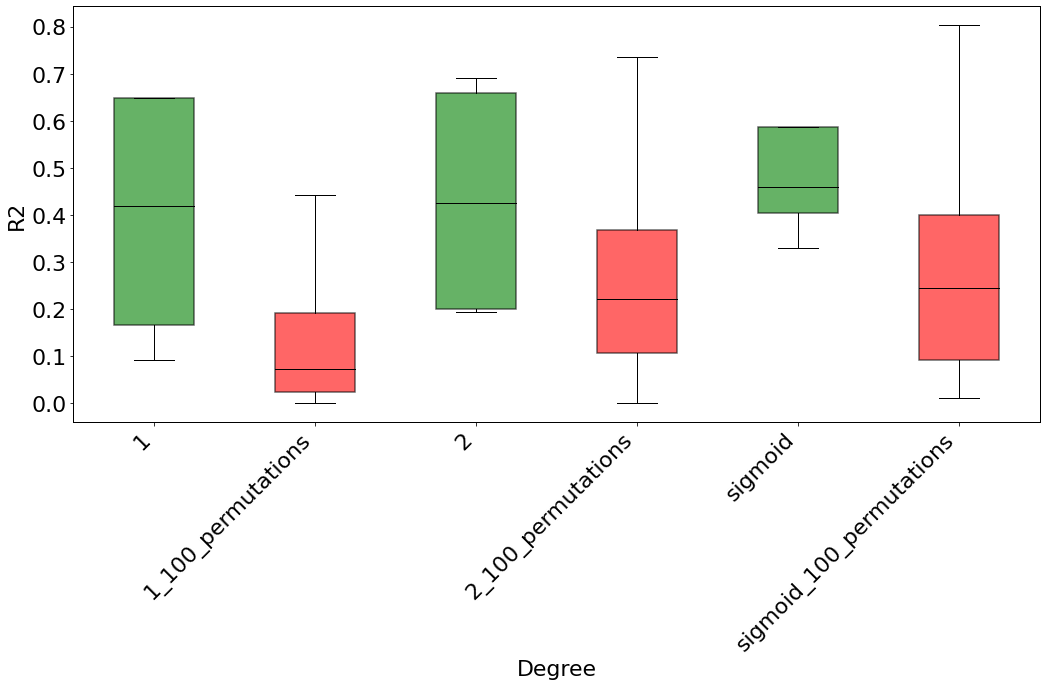

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


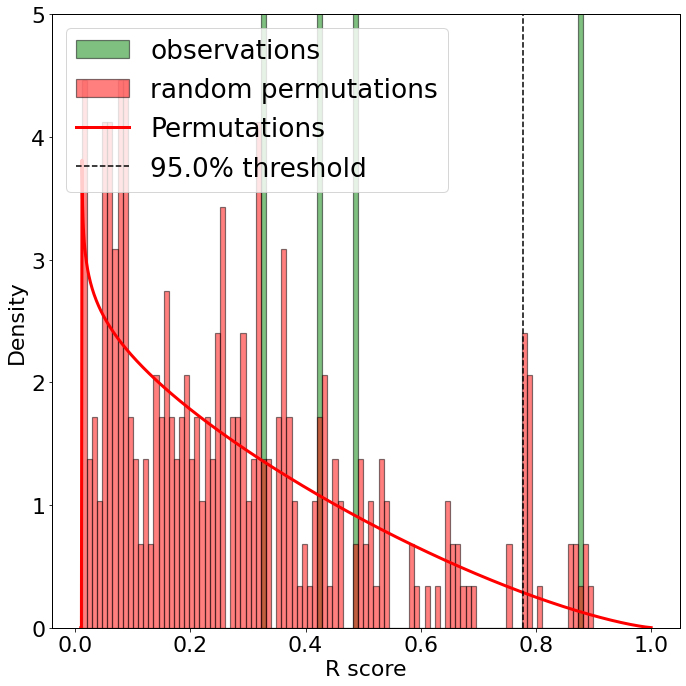

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/ieo5417/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


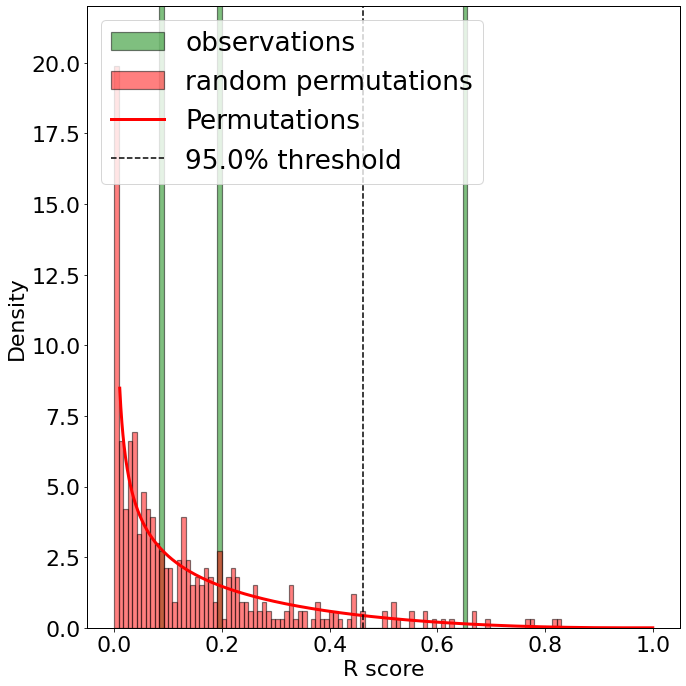

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/ieo5417/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


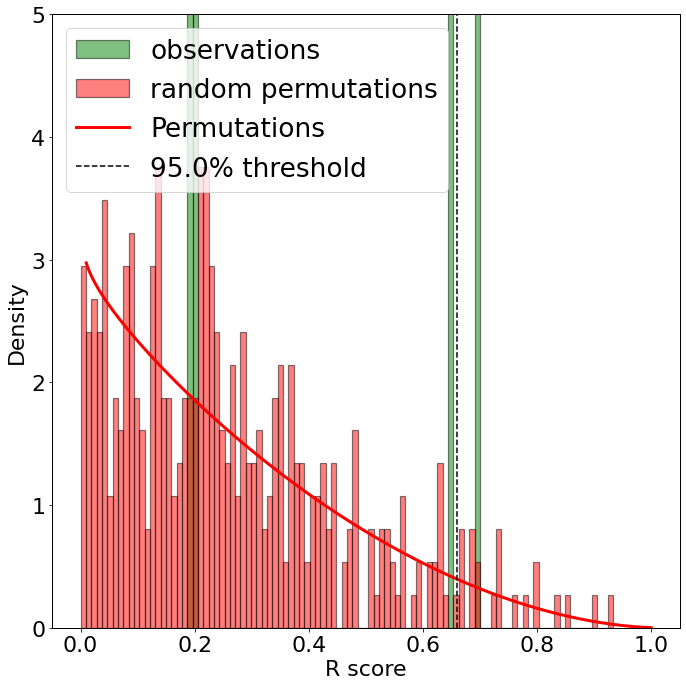

In [126]:
models_pvalue_cms=pa_cms.plot_gof(poly_obs_scores_cms, sig_obs_scores_cms, poly_perm_scores_cms, sig_perm_scores_cms, dist_perm=True)

In [127]:
models_pvalue_cms

{'sigmoidal': [1070.5, 0.015014325255136489, 0.7777123072346805],
 1: [1304.0, 0.013116177087270624, 0.46141789412958667],
 2: [1107.0, 0.09749256621334063, 0.6588870342757943]}

## Cluster genes

In [128]:
genes_clusters_cms=pa_cms.cluster_genes(scores_cms)

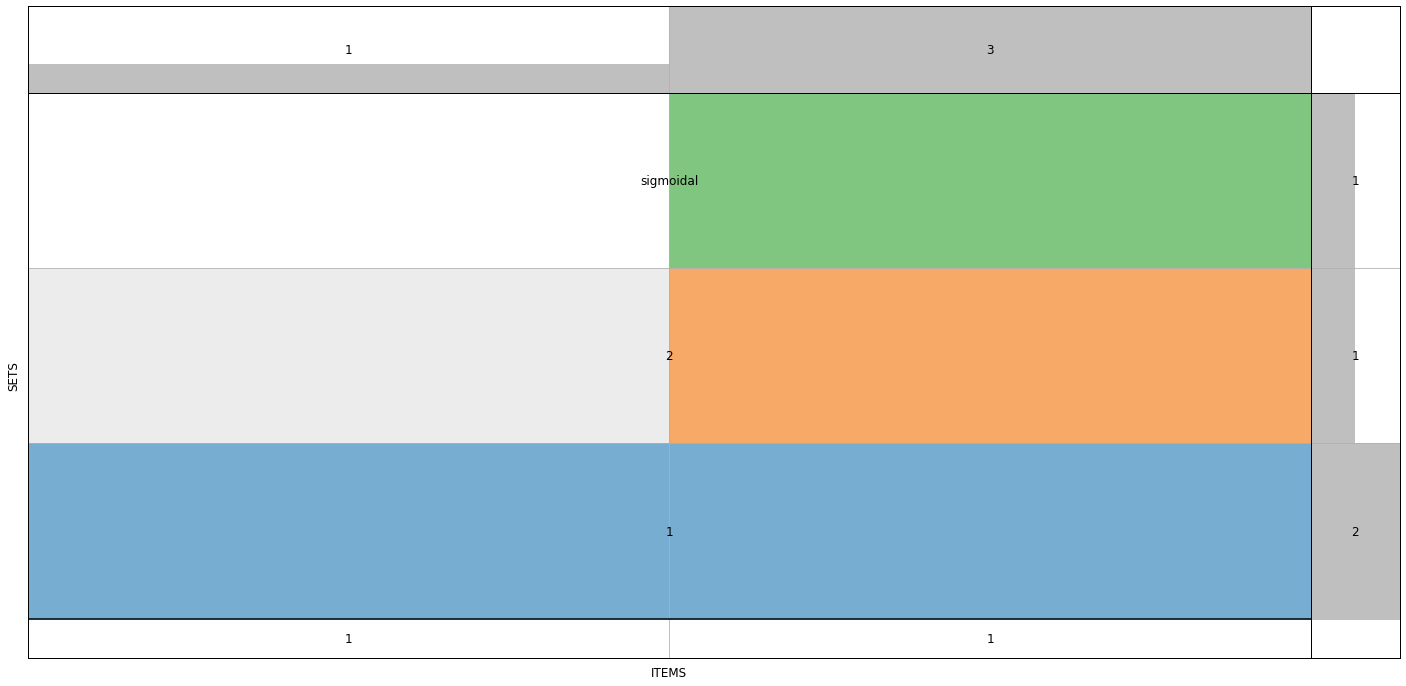

In [129]:
pa_cms.plot_clusters(genes_clusters_cms)

In [130]:
summary_cms=pa_cms.get_summary_table(genes_clusters_cms, scores_cms)

In [131]:
continuum_cms, sigmoid_cms, discarded_cms = pa_cms.classify_genes(summary_cms)

# MOLECULAR FEATURES PROFILING

In [132]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_mf = ProfileAnalysis('../../../docker/analysis/molecular_features')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:155: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:161: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:167: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:173: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Calculate median value for each colon section

In [133]:
medians_mf, mad_tr = pa_mf.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


In [134]:
medians_mf.head()

Cecum  Ascending_Colon  Hepatic_Flexure  Transverse_Colon  \
ensmbl_id                                                                  
MSI        46.987952        38.666667        33.333333         48.387097   
CIN        59.036145        54.666667        66.666667         41.935484   
CIMP       85.542169        80.000000        72.222222         70.967742   

           Splenic_Flexure  Descending_Colon  Sigmoid_Colon  \
ensmbl_id                                                     
MSI                   40.0         23.529412      22.222222   
CIN                   80.0         88.888889      85.321101   
CIMP                  20.0         55.555556      27.522936   

           Rectosigmoid_Junction     Rectum  
ensmbl_id                                    
MSI                    20.930233  12.328767  
CIN                    86.046512  86.301370  
CIMP                   30.232558  43.835616

In [135]:
medians_mf.drop('Splenic_Flexure', axis=1, inplace=True)

## Fit Observables

In [136]:
scores_mf, poly_obs_scores_mf, sig_obs_scores_mf, poly_models_mf, sig_models_mf = pa_mf.fit_data(medians_mf, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Fit Random permutated data

In [137]:
poly_perm_scores_mf, sig_perm_scores_mf, sig_perm_models_mf = pa_mf.fit_random_data(medians_mf, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

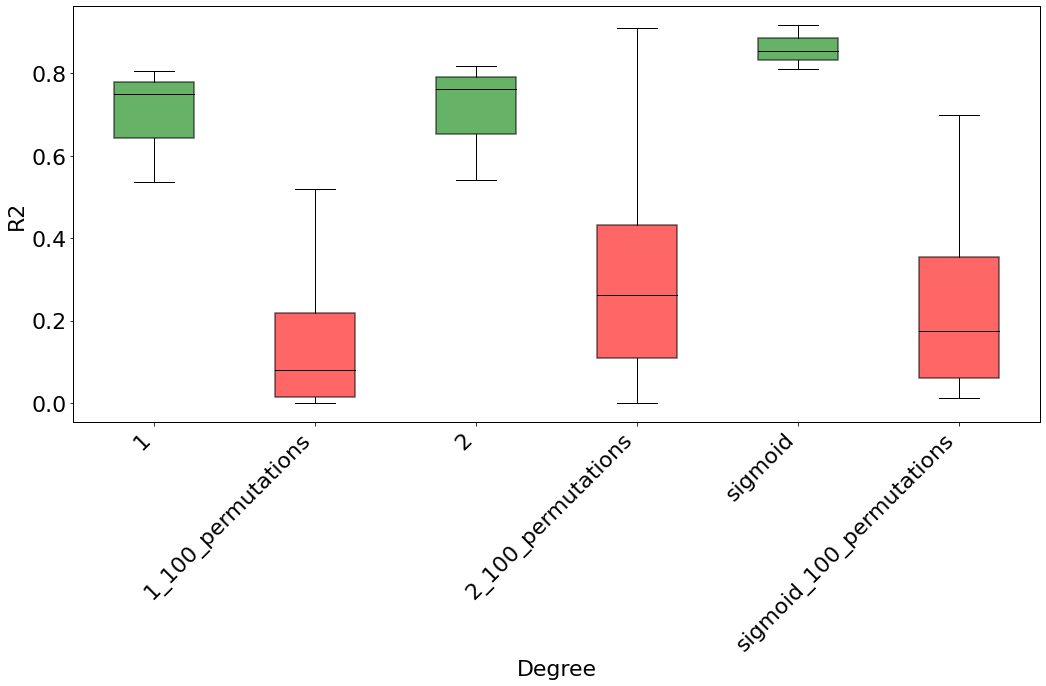

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


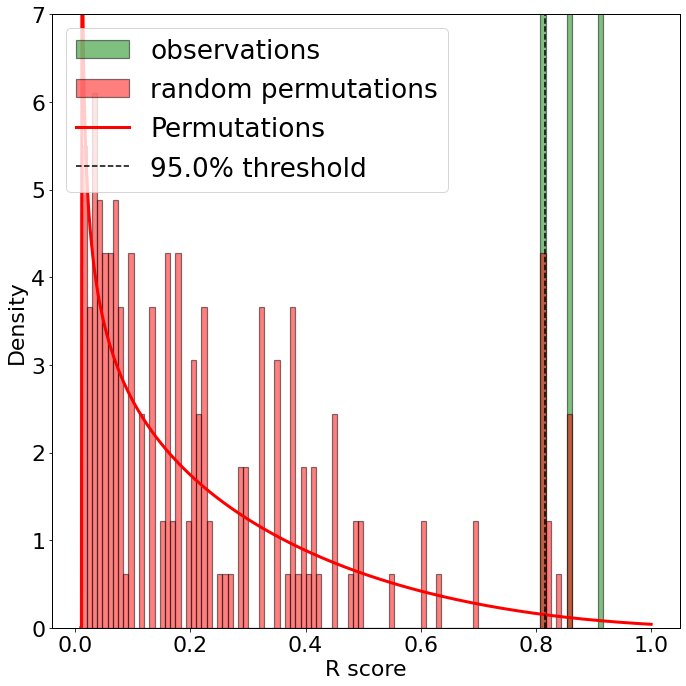

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


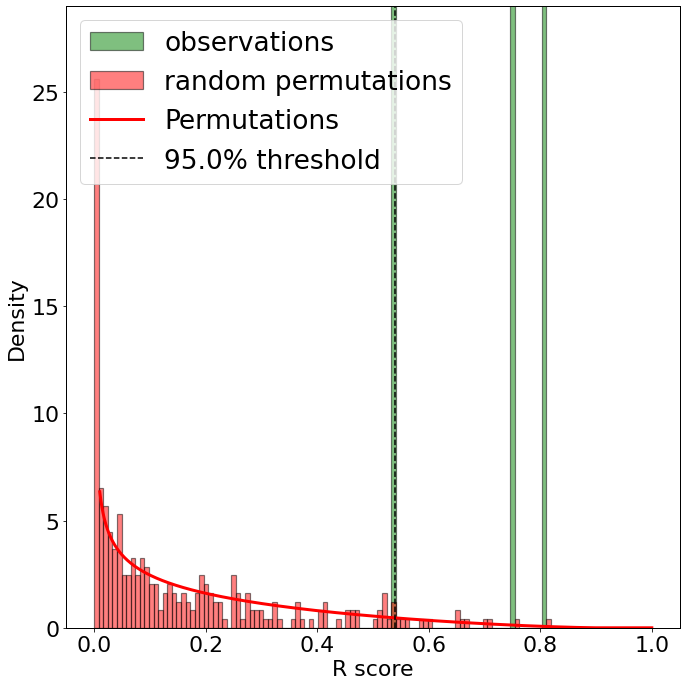

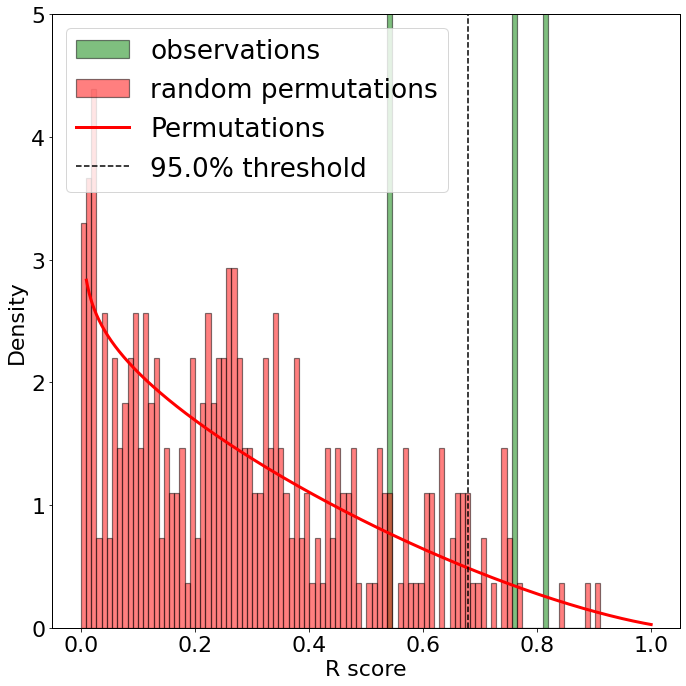

In [138]:
models_pvalue_mf = pa_mf.plot_gof(poly_obs_scores_mf, sig_obs_scores_mf, poly_perm_scores_mf, sig_perm_scores_mf, dist_perm=True)

In [139]:
models_pvalue_mf

{'sigmoidal': [529.0, 0.000143922364164702, 0.8162056026299567],
 1: [880.0, 7.798628094971606e-05, 0.539685665677024],
 2: [848.0, 0.0010332093031969363, 0.6782939398023872]}

## Cluster genes

In [140]:
genes_clusters_mf=pa_mf.cluster_genes(scores_mf)

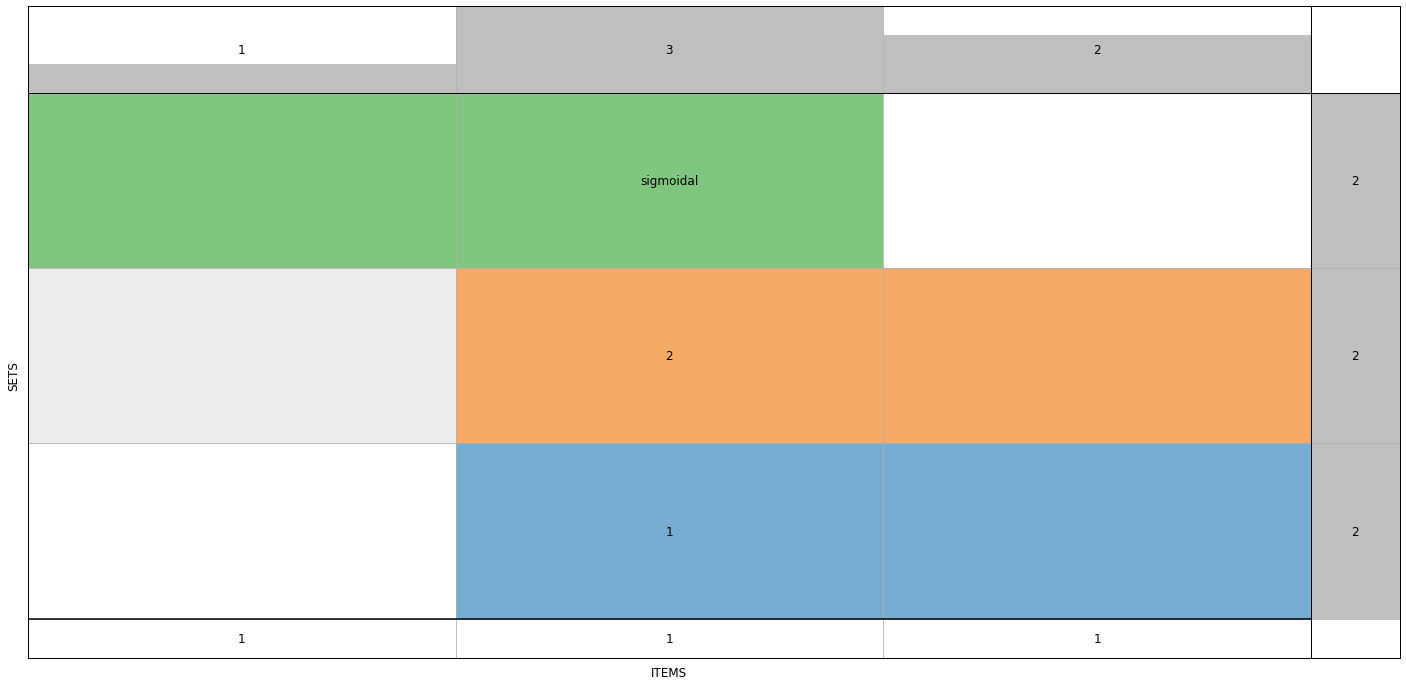

In [141]:
pa_mf.plot_clusters(genes_clusters_mf)

In [142]:
summary_mf=pa_mf.get_summary_table(genes_clusters_mf, scores_mf)

In [143]:
continuum_mf, sigmoid_mf, discarded_mf = pa_mf.classify_genes(summary_mf)

# SIGNATURES PROFILING

In [144]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_sig = ProfileAnalysis('../../../docker/analysis/signatures')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:155: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:161: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:167: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:173: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Assign each sample in clinical data file to a colon section

In [145]:
pa_sig.create_samples_to_sections_table()

## Calculate median value for each colon section

In [146]:
medians_sig, mad_sig = pa_sig.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


In [147]:
medians_sig = medians_sig[(medians_sig==0).sum(axis=1) < 5]

In [148]:
medians_sig

Cecum  Ascending colon  Hepatic flexure of colon  \
signatures                                                     
SBS1         75.0             76.0                      92.0   
SBS5         66.0             64.0                      53.0   

            Transverse colon  Descending colon  Sigmoid colon  \
signatures                                                      
SBS1                    78.0              50.0           51.0   
SBS5                    40.0              73.0           36.0   

            Rectosigmoid junction  Rectum, NOS  
signatures                                      
SBS1                         48.0         52.5  
SBS5                         27.5         31.5

In [149]:
medians_sig.head()

Cecum  Ascending colon  Hepatic flexure of colon  \
signatures                                                     
SBS1         75.0             76.0                      92.0   
SBS5         66.0             64.0                      53.0   

            Transverse colon  Descending colon  Sigmoid colon  \
signatures                                                      
SBS1                    78.0              50.0           51.0   
SBS5                    40.0              73.0           36.0   

            Rectosigmoid junction  Rectum, NOS  
signatures                                      
SBS1                         48.0         52.5  
SBS5                         27.5         31.5

In [150]:
mad_sig.head()

Unnamed: 0  Cecum  Ascending colon  Hepatic flexure of colon  \
0       SBS1   22.0             26.0                      25.0   
1       SBS2    0.0              0.0                       0.0   
2       SBS3    0.0              0.0                       0.0   
3       SBS4    0.0              0.0                       0.0   
4       SBS5   52.5             58.0                      40.0   

   Transverse colon  Descending colon  Sigmoid colon  Rectosigmoid junction  \
0              37.0              14.0           16.0                   16.5   
1               0.0               0.0            0.0                    0.0   
2               0.0               0.0            0.0                    0.0   
3               0.0               0.0            0.0                    0.0   
4              36.0              37.0           33.0                   21.5   

   Rectum, NOS  
0         14.5  
1          0.0  
2          0.0  
3          0.0  
4         31.5

## Fit Observables

In [151]:
scores_sig, poly_obs_scores_sig, sig_obs_scores_sig, poly_models_sig, sig_models_sig = pa_sig.fit_data(medians_sig, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Fit Random permutated data

In [152]:
poly_perm_scores_sig, sig_perm_scores_sig, sig_perm_models_sig=pa_sig.fit_random_data(medians_sig, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

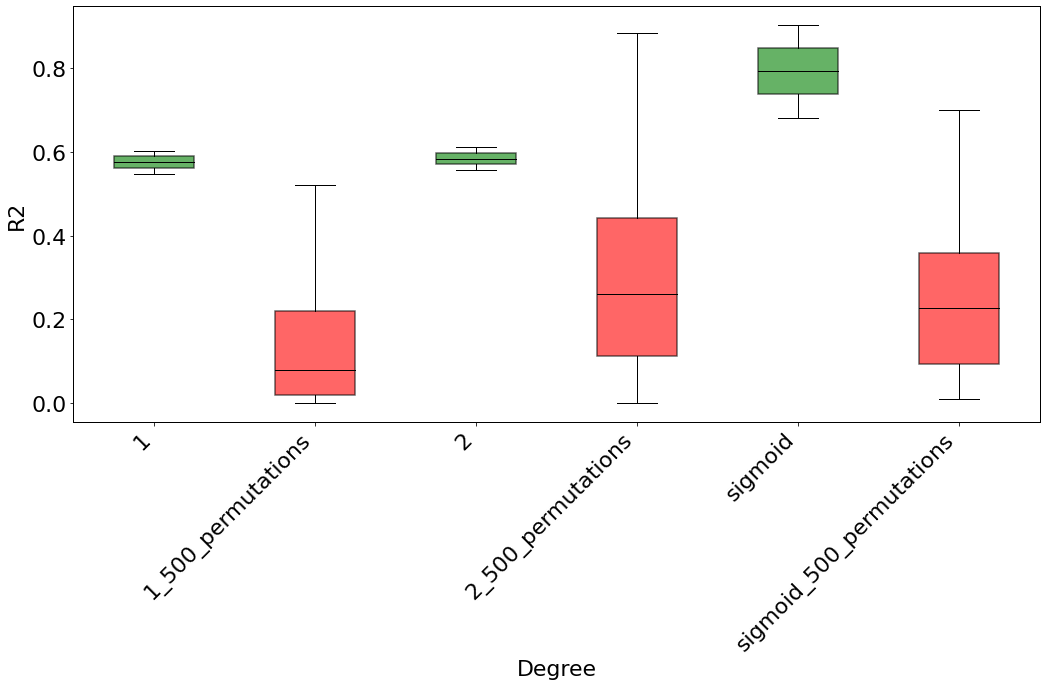

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/ieo5417/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


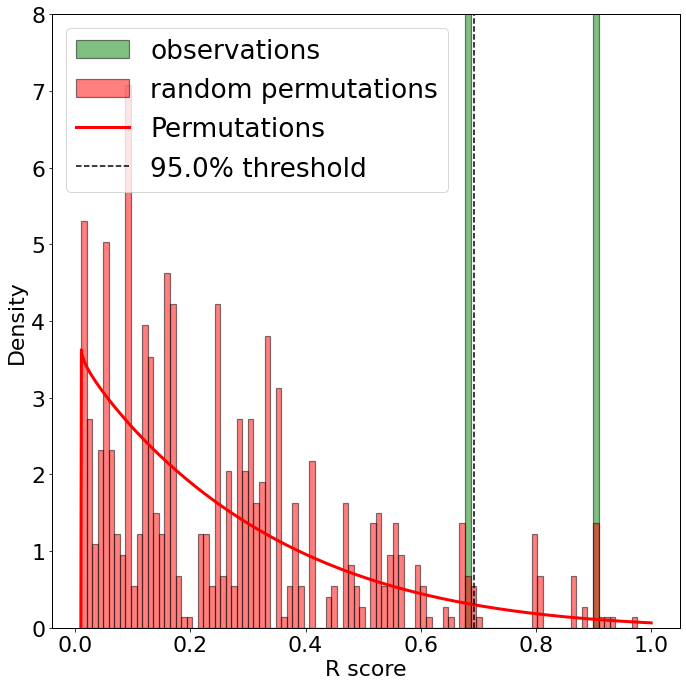

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/ieo5417/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


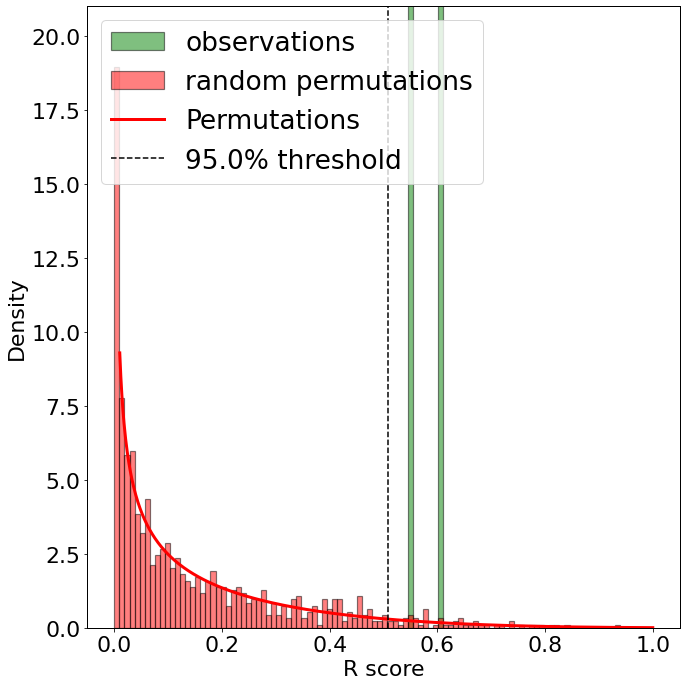

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/ieo5417/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


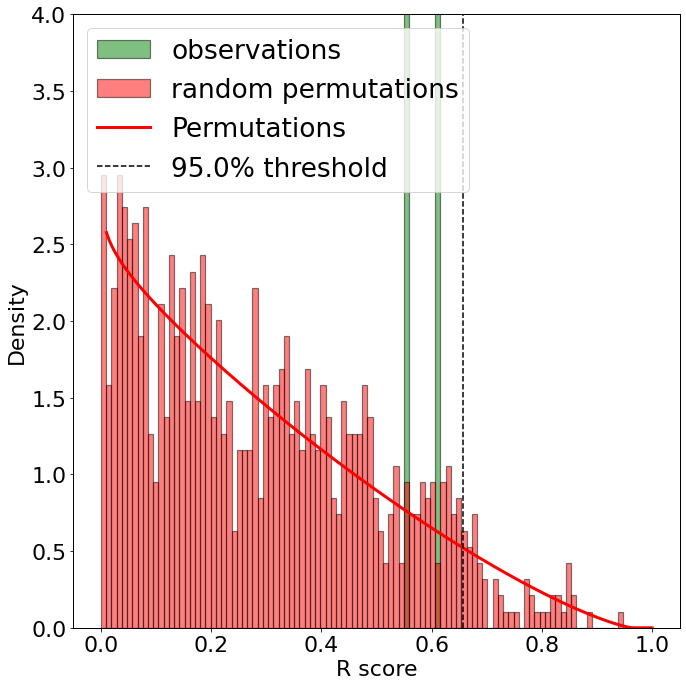

In [153]:
models_pvalue_sig=pa_sig.plot_gof(poly_obs_scores_sig, sig_obs_scores_sig, poly_perm_scores_sig, sig_perm_scores_sig, dist_perm=True)

In [154]:
models_pvalue_sig

{'sigmoidal': [1474.0, 0.01104332874517946, 0.6917132421943437],
 1: [1931.0, 0.011427775723200103, 0.5080328413430788],
 2: [1778.0, 0.028609901406077297, 0.6564597430616849]}

## Cluster genes

In [155]:
genes_clusters_sig=pa_sig.cluster_genes(scores_sig)

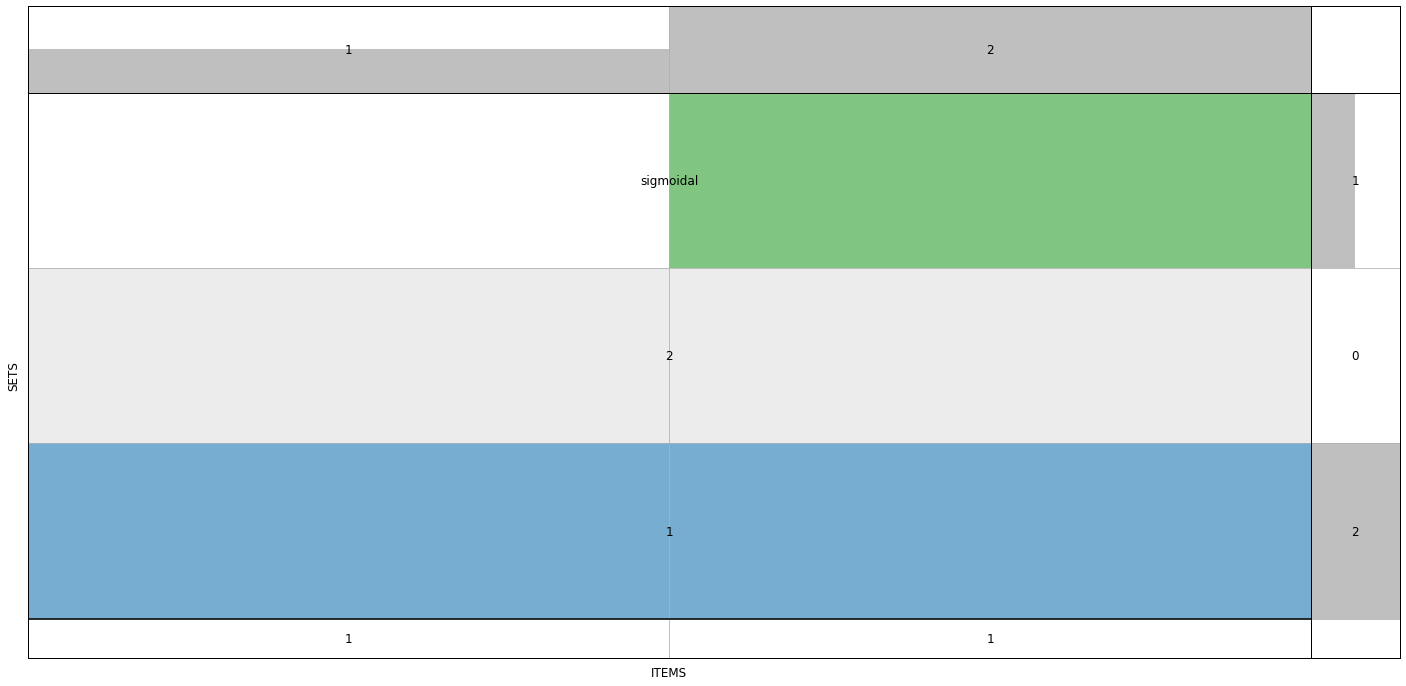

In [156]:
pa_sig.plot_clusters(genes_clusters_sig)

In [157]:
summary_sig=pa_sig.get_summary_table(genes_clusters_sig, scores_sig)

In [158]:
continuum_sig, sigmoid_sig, discarded_sig = pa_sig.classify_genes(summary_sig)

In [159]:
mad_sig=medians_sig

# Figure 1F

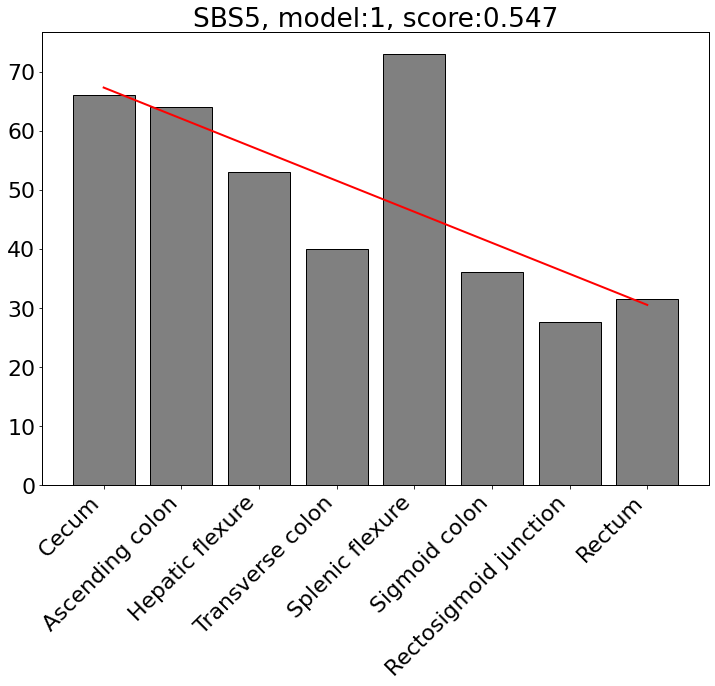

In [160]:
pa_sig.plot_fitting_bars(continuum_sig, continuum_sig.index, medians_sig, mad_sig, poly_models_sig, sig_models_sig, 'continuum', plot_mad=False)

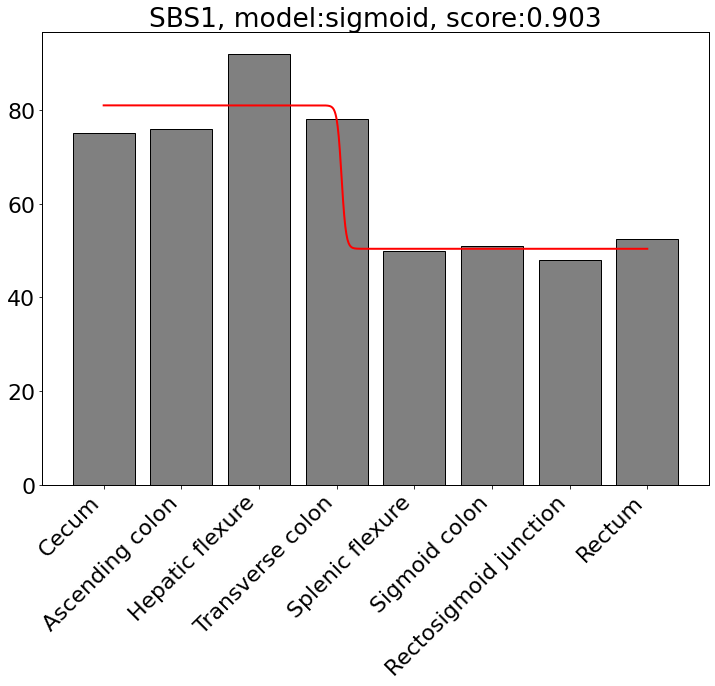

In [161]:
pa_sig.plot_fitting_bars(sigmoid_sig, sigmoid_sig.index, medians_sig, mad_sig, poly_models_sig, sig_models_sig, 'sigmoid', plot_mad=False)

# MICROBIOME PROFILING

In [162]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_mic = ProfileAnalysis('../../../docker/analysis/microbiome')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:155: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:161: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:167: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:173: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Assign each sample in clinical data file to a colon section

In [163]:
pa_mic.create_samples_to_sections_table()

## Calculate median value for each colon section

In [164]:
medians_mic, mad_mic = pa_mic.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


In [165]:
#medians cleaning and filtering (these data have been processed by combat before being used here)
#round to the 3rd decimal
medians_mic = medians_mic.round(2)
#make data positive
lowest_value = medians_mic.min(axis=1).min()
medians_mic = medians_mic.add(abs(lowest_value))

In [166]:
medians_mic


Cecum  Ascending colon  Hepatic flexure of colon  Transverse colon  \
bacteria                                                                       
1179670    0.38             0.39                      0.23              0.38   
1179672    0.26             0.24                      0.12              0.21   
11         0.25             0.26                      0.09              0.25   
999424     0.26             0.26                      0.21              0.25   
1196034    0.40             0.40                      0.27              0.35   
...         ...              ...                       ...               ...   
573497     0.24             0.24                      0.14              0.24   
1840217    0.24             0.24                      0.14              0.24   
1591174    0.24             0.24                      0.14              0.24   
1856       0.24             0.25                      0.13              0.25   
2026191    0.24             0.24                      0.14              0.24   

          Descending colon  Sigmoid colon  Rectosigmoid junction  Rectum, NOS  
bacteria                                                                       
1179670               0.38           0.38                   0.37         0.39  
1179672               0.14           0.29                   0.30         0.31  
11                    0.13           0.30                   0.34         0.31  
999424                0.11           0.29                   0.29         0.32  
1196034               0.19           0.42                   0.42         0.49  
...                    ...            ...                    ...          ...  
573497                0.11           0.26                   0.30         0.29  
1840217               0.11           0.26                   0.27         0.29  
1591174               0.11           0.26                   0.30         0.29  
1856                  0.10           0.28                   0.27         0.29  
2026191               0.11           0.27                   0.30         0.29  

[9345 rows x 8 columns]

In [167]:
gmrepo = pd.read_csv('/home/ieo5417/Documenti/colon_paper/docker/analysis/microbiome/GMREPO_relative_abundance_of_all_species_genus_in_all_phenotypes_summary.tsv', skiprows=2, sep='\t')

In [168]:
gmrepo

phenotype taxonomic rank  NCBI taxon ID              scientific name  \
0        D006262          genus            816                  Bacteroides   
1        D006262          genus         572511                      Blautia   
2        D006262          genus         216851             Faecalibacterium   
3        D006262        species            820        Bacteroides uniformis   
4        D006262          genus         375288              Parabacteroides   
...          ...            ...            ...                          ...   
176020   D065626        species        1495039       Mesoaciditoga lauensis   
176021   D065626        species        1503961      Bacillus caseinilyticus   
176022   D065626        species        1661055  Pseudomonas sp. NBRC 111140   
176023   D065626        species        1661059  Pseudomonas sp. NBRC 111144   
176024   D065626        species        1827099   Peptoniphilus sp. JCM 8141   

        nr. total valid samples of this phenotype  \
0                                           12485   
1                                           12485   
2                                           12485   
3                                           12485   
4                                           12485   
...                                           ...   
176020                                        142   
176021                                        142   
176022                                        142   
176023                                        142   
176024                                        142   

        samples in which current taxon is found  abudance mean  \
0                                         12187      23.222366   
1                                         11612       2.239911   
2                                         11408       5.472867   
3                                         11405       4.561316   
4                                         11308       2.834087   
...                                         ...            ...   
176020                                        1       0.003226   
176021                                        1       0.003385   
176022                                        1       0.001541   
176023                                        1       0.000771   
176024                                        1       0.003385   

        abundance median  abundance sd                     phenotype term  \
0              17.625500     20.798000                             Health   
1               1.113170      3.898958                             Health   
2               3.407195      6.499740                             Health   
3               1.976780      6.539602                             Health   
4               1.290720      5.607600                             Health   
...                  ...           ...                                ...   
176020          0.003226           NaN  Non-alcoholic Fatty Liver Disease   
176021          0.003385           NaN  Non-alcoholic Fatty Liver Disease   
176022          0.001541           NaN  Non-alcoholic Fatty Liver Disease   
176023          0.000771           NaN  Non-alcoholic Fatty Liver Disease   
176024          0.003385           NaN  Non-alcoholic Fatty Liver Disease   

                                     phenoype description  
0       The state of the organism when it functions op...  
1       The state of the organism when it functions op...  
2       The state of the organism when it functions op...  
3       The state of the organism when it functions op...  
4       The state of the organism when it functions op...  
...                                                   ...  
176020  Fatty liver finding without excessive ALCOHOL ...  
176021  Fatty liver finding without excessive ALCOHOL ...  
176022  Fatty liver finding without excessive ALCOHOL ...  
176023  Fatty liver finding without excessive ALCOHOL ...  
176024  Fatty liver finding without excessi

In [169]:
gmspecies = gmrepo[gmrepo['taxonomic rank']=='species']
# species_to_keep = list(gmspecies['scientific name'].unique())
species_to_keep = list(gmspecies['NCBI taxon ID'].unique())
# species_to_keep = ['_'.join(species.split(' ')) for species in species_to_keep]

In [170]:
id_conversion_table=pd.read_csv('../../../docker/analysis/microbiome/misc/all_species.txt', sep='\t')
id_conversion_table.set_index('tax_id', inplace=True)
species_table = pd.DataFrame()
not_found = []
for index, row in medians_mic.iterrows():
    if index in id_conversion_table.index:
        species_table.loc[index,'species'] = id_conversion_table.loc[index,'taxon_name']
        species_table.loc[index,'genus'] = id_conversion_table.loc[index,'taxon_name'].split('_')[0]
    else:
        not_found.append(index)

In [171]:
species_table.to_csv('species_tables.csv')

In [172]:
mask = [id_ in species_to_keep for id_ in medians_mic.index]
medians_mic = medians_mic.loc[mask]

In [173]:
mad_mic.set_index('Unnamed: 0', inplace=True)
mad_mic = mad_mic.loc[medians_mic.index]

In [174]:
medians_mic

Cecum  Ascending colon  Hepatic flexure of colon  Transverse colon  \
bacteria                                                                       
11         0.25             0.26                      0.09              0.25   
17         0.24             0.24                      0.13              0.28   
65552      0.25             0.29                      0.19              0.26   
24         0.25             0.22                      0.16              0.25   
43         0.24             0.26                      0.14              0.23   
...         ...              ...                       ...               ...   
82803      0.25             0.25                      0.13              0.25   
1141657    0.24             0.24                      0.14              0.24   
154288     0.24             0.24                      0.14              0.24   
228955     0.24             0.24                      0.14              0.24   
481722     0.24             0.24                      0.14              0.24   

          Descending colon  Sigmoid colon  Rectosigmoid junction  Rectum, NOS  
bacteria                                                                       
11                    0.13           0.30                   0.34         0.31  
17                    0.15           0.29                   0.29         0.28  
65552                 0.18           0.30                   0.33         0.31  
24                    0.17           0.26                   0.35         0.26  
43                    0.16           0.29                   0.32         0.29  
...                    ...            ...                    ...          ...  
82803                 0.10           0.28                   0.30         0.30  
1141657               0.11           0.26                   0.30         0.29  
154288                0.11           0.26                   0.30         0.29  
228955                0.11           0.26                   0.30         0.29  
481722                0.11           0.26                   0.30         0.29  

[3553 rows x 8 columns]

## Fit Observables

In [175]:
scores_mic, poly_obs_scores_mic, sig_obs_scores_mic, poly_models_mic, sig_models_mic = pa_mic.fit_data(medians_mic, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Fit Random permutated data

In [176]:
poly_perm_scores_mic, sig_perm_scores_mic, sig_perm_models_mic=pa_mic.fit_random_data(medians_mic, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

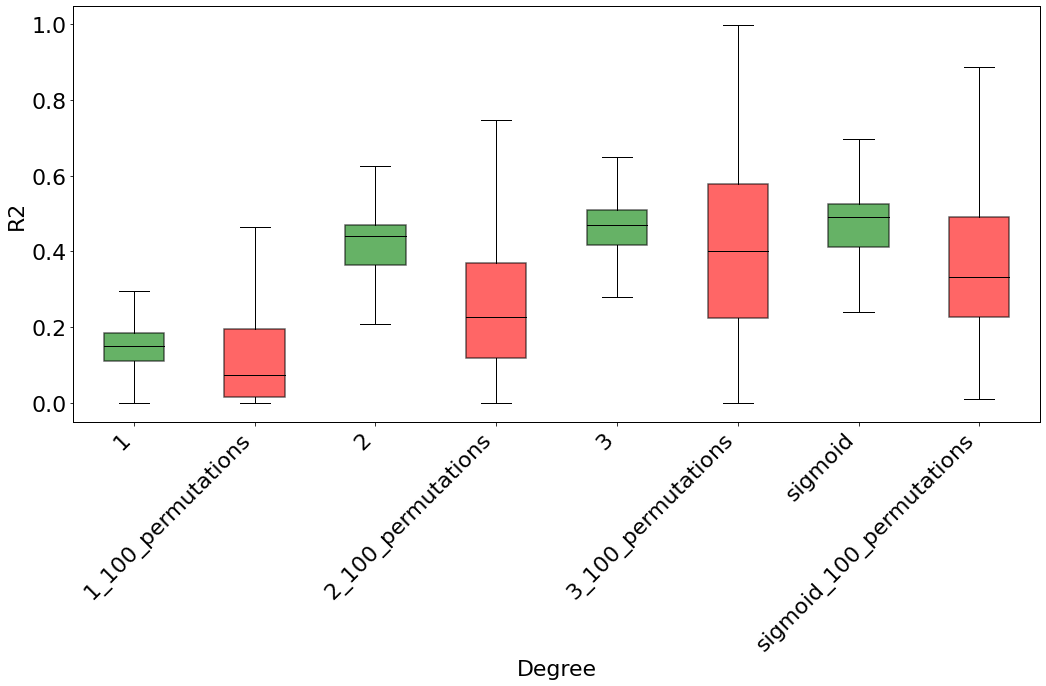

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/ieo5417/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


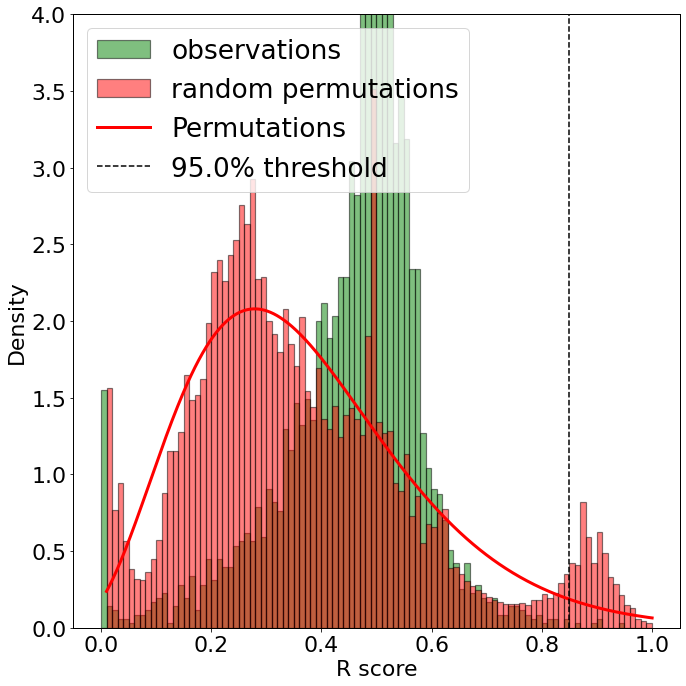

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/ieo5417/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


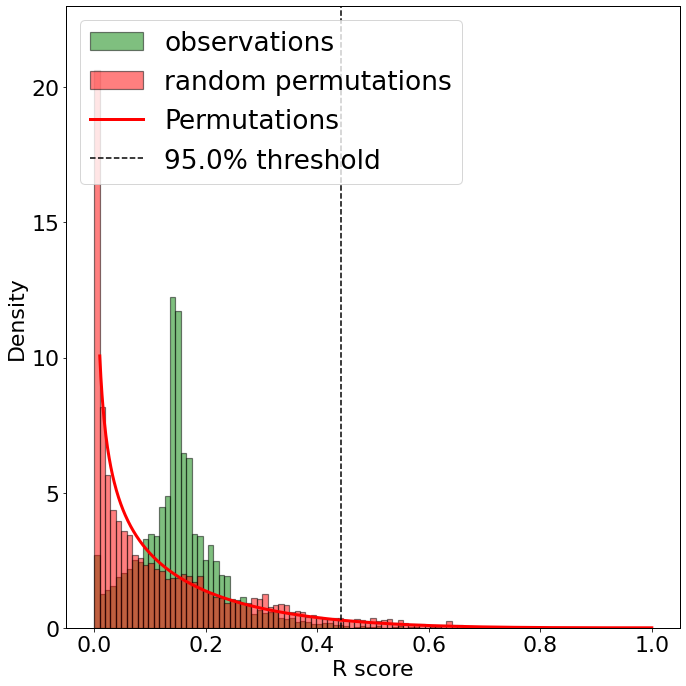

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/ieo5417/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


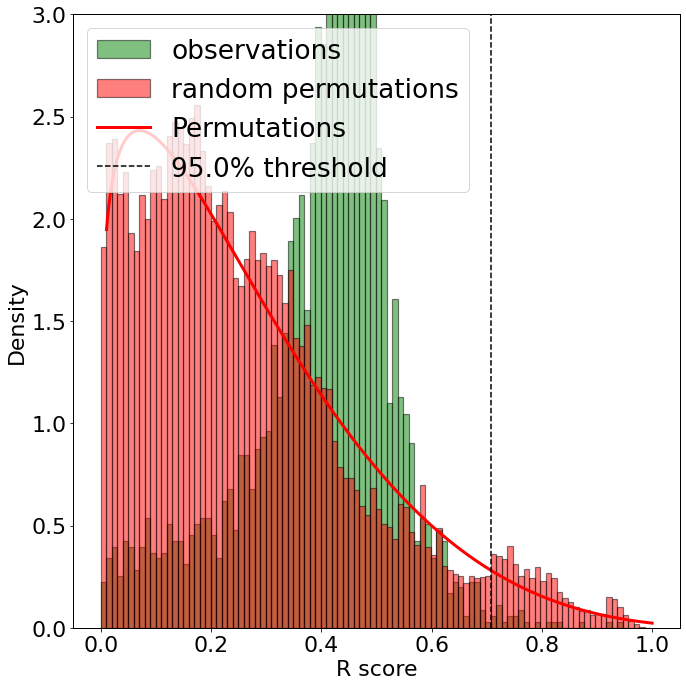

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/ieo5417/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


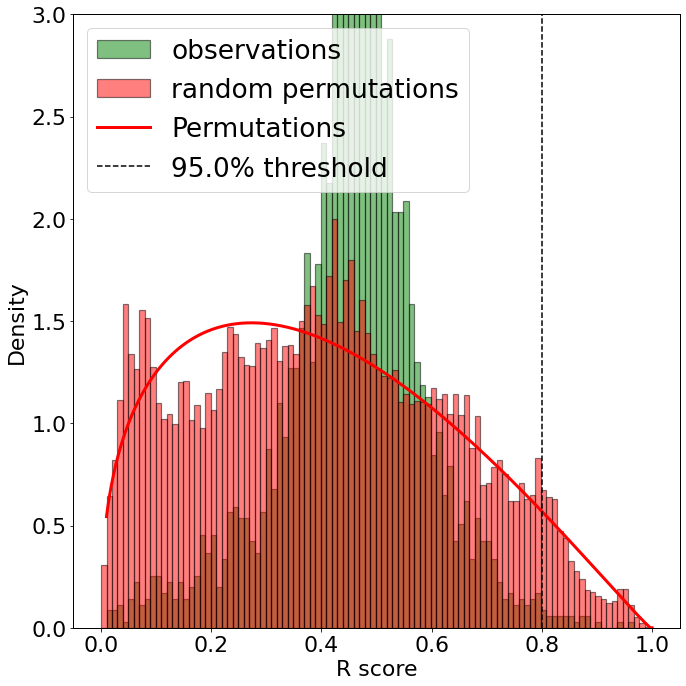

In [177]:
models_pvalue_mic=pa_mic.plot_gof(poly_obs_scores_mic, sig_obs_scores_mic, poly_perm_scores_mic, sig_perm_scores_mic, dist_perm=True)

In [178]:
models_pvalue_mic

{'sigmoidal': [746131437.5, 0.0, 0.849712266803518],
 1: [809048274.5, 1.513072464355158e-184, 0.44217771502023206],
 2: [956653919.0, 0.0, 0.7068656598684999],
 3: [745975763.0, 3.4699755437297135e-78, 0.8003555169868543]}

## Cluster genes

In [179]:
genes_clusters_mic=pa_mic.cluster_genes(scores_mic)

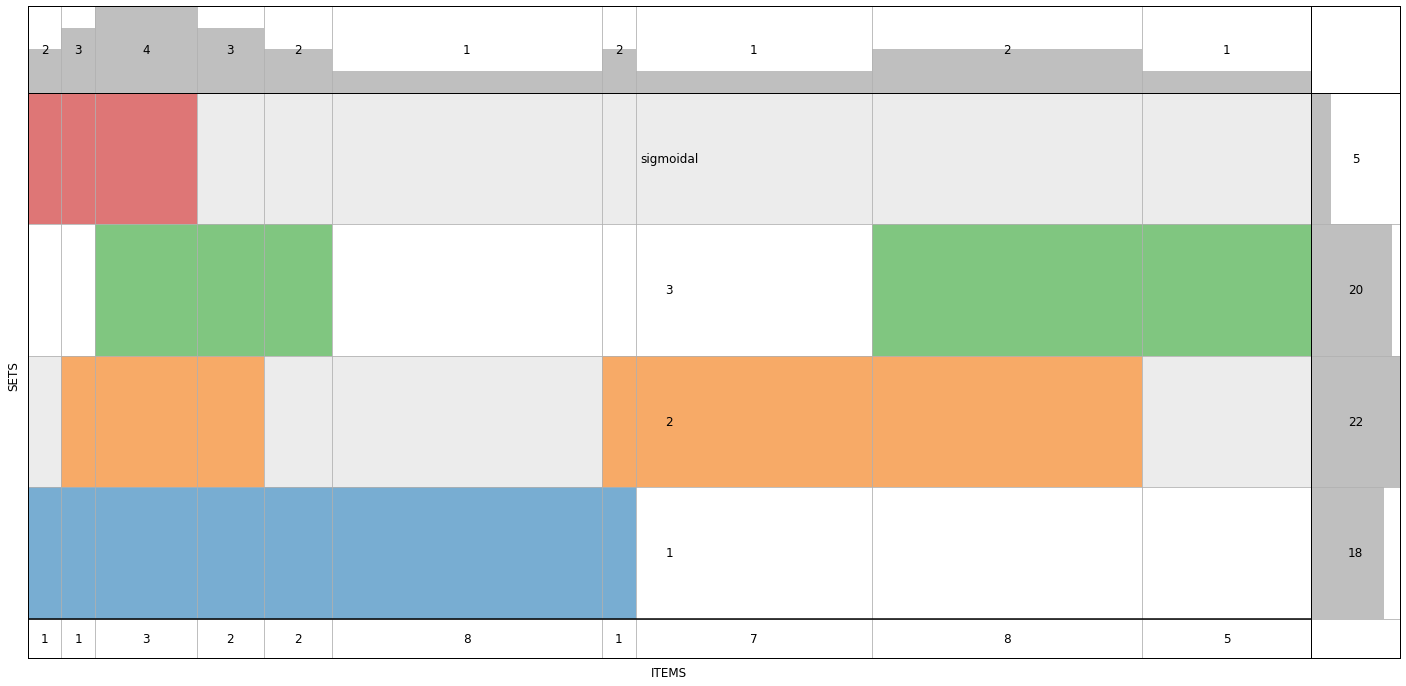

In [180]:
pa_mic.plot_clusters(genes_clusters_mic)

In [181]:
summary_mic=pa_mic.get_summary_table(genes_clusters_mic, scores_mic)

In [182]:
continuum_mic, sigmoid_mic, discarded_mic = pa_mic.classify_genes(summary_mic)

In [183]:
len(continuum_mic)

33

In [186]:
id_conversion_table=pd.read_csv('../../../docker/analysis/microbiome/misc/all_species.txt', sep='\t')
id_conversion_table.set_index('tax_id', inplace=True)

In [188]:
id_conversion_table

taxon_name
tax_id                                        
1720344             Psychrobacter_sp._AntiMn-1
1179670                Micrococcus_sp._KBS0714
1581085              Pseudomonas_sp._HMSC11A05
1581086            Streptococcus_sp._HMSC11C05
1581087               Morganella_sp._HMSC11D09
...                                        ...
1304284      Caldisalinibacter_kiritimatiensis
174145       endosymbiont_of_Bathymodiolus_sp.
1840217  Candidatus_Arthromitus_sp._SFB-turkey
33923                         Mycoplasma_felis
92406                       Mycoplasma_spumans

[11903 rows x 1 columns]

In [189]:
medians_mic

Cecum  Ascending colon  Hepatic flexure of colon  Transverse colon  \
bacteria                                                                       
11         0.25             0.26                      0.09              0.25   
17         0.24             0.24                      0.13              0.28   
65552      0.25             0.29                      0.19              0.26   
24         0.25             0.22                      0.16              0.25   
43         0.24             0.26                      0.14              0.23   
...         ...              ...                       ...               ...   
82803      0.25             0.25                      0.13              0.25   
1141657    0.24             0.24                      0.14              0.24   
154288     0.24             0.24                      0.14              0.24   
228955     0.24             0.24                      0.14              0.24   
481722     0.24             0.24                      0.14              0.24   

          Descending colon  Sigmoid colon  Rectosigmoid junction  Rectum, NOS  
bacteria                                                                       
11                    0.13           0.30                   0.34         0.31  
17                    0.15           0.29                   0.29         0.28  
65552                 0.18           0.30                   0.33         0.31  
24                    0.17           0.26                   0.35         0.26  
43                    0.16           0.29                   0.32         0.29  
...                    ...            ...                    ...          ...  
82803                 0.10           0.28                   0.30         0.30  
1141657               0.11           0.26                   0.30         0.29  
154288                0.11           0.26                   0.30         0.29  
228955                0.11           0.26                   0.30         0.29  
481722                0.11           0.26                   0.30         0.29  

[3553 rows x 8 columns]

In [190]:
gm_species = gmrepo[gmrepo['taxonomic rank']=='species']
gm_species

phenotype taxonomic rank  NCBI taxon ID              scientific name  \
3        D006262        species            820        Bacteroides uniformis   
7        D006262        species          28116           Bacteroides ovatus   
9        D006262        species            821         Bacteroides vulgatus   
14       D006262        species          40520                Blautia obeum   
15       D006262        species          39491        [Eubacterium] rectale   
...          ...            ...            ...                          ...   
176020   D065626        species        1495039       Mesoaciditoga lauensis   
176021   D065626        species        1503961      Bacillus caseinilyticus   
176022   D065626        species        1661055  Pseudomonas sp. NBRC 111140   
176023   D065626        species        1661059  Pseudomonas sp. NBRC 111144   
176024   D065626        species        1827099   Peptoniphilus sp. JCM 8141   

        nr. total valid samples of this phenotype  \
3                                           12485   
7                                           12485   
9                                           12485   
14                                          12485   
15                                          12485   
...                                           ...   
176020                                        142   
176021                                        142   
176022                                        142   
176023                                        142   
176024                                        142   

        samples in which current taxon is found  abudance mean  \
3                                         11405       4.561316   
7                                         11052       2.559423   
9                                         10997       4.184269   
14                                        10335       0.772912   
15                                        10276       1.953008   
...                                         ...            ...   
176020                                        1       0.003226   
176021                                        1       0.003385   
176022                                        1       0.001541   
176023                                        1       0.000771   
176024                                        1       0.003385   

        abundance median  abundance sd                     phenotype term  \
3               1.976780      6.539602                             Health   
7               0.760439      5.080513                             Health   
9               1.172700      7.385712                             Health   
14              0.329806      1.344197                             Health   
15              0.095564      4.946990                             Health   
...                  ...           ...                                ...   
176020          0.003226           NaN  Non-alcoholic Fatty Liver Disease   
176021          0.003385           NaN  Non-alcoholic Fatty Liver Disease   
176022          0.001541           NaN  Non-alcoholic Fatty Liver Disease   
176023          0.000771           NaN  Non-alcoholic Fatty Liver Disease   
176024          0.003385           NaN  Non-alcoholic Fatty Liver Disease   

                                     phenoype description  
3       The state of the organism when it functions op...  
7       The state of the organism when it functions op...  
9       The state of the organism when it functions op...  
14      The state of the organism when it functions op...  
15      The state of the organism when it functions op...  
...                                                   ...  
176020  Fatty liver finding without excessive ALCOHOL ...  
176021  Fatty liver finding without excessive ALCOHOL ...  
176022  Fatty liver finding without excessive ALCOHOL ...  
176023  Fatty liver finding without excessive ALCOHOL ...  
176024  Fatty liver finding without excessi

# IMMUNE CELLS PROFILING

In [192]:
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_imm = ProfileAnalysis('../../../docker/analysis/immune_cells')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:155: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:161: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:167: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:173: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Assign each sample in clinical data file to a colon section

In [193]:
pa_imm.create_samples_to_sections_table()

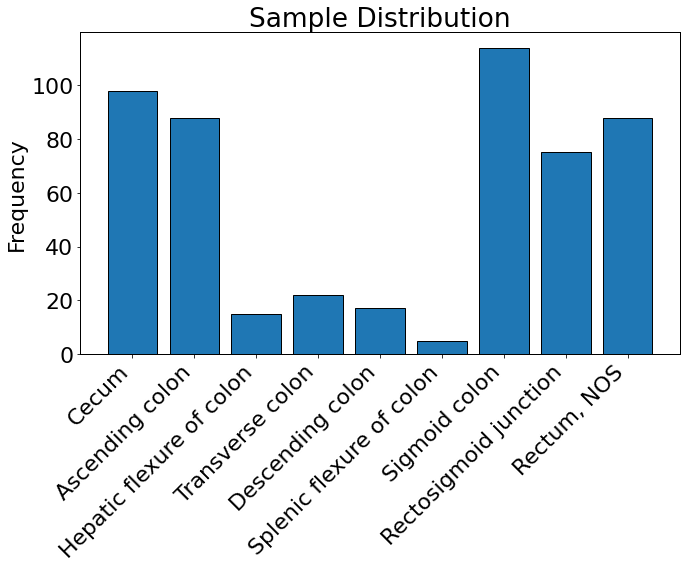

In [194]:
pa_imm.plot_sample_distribution()

## Calculate median value for each colon section

In [195]:
medians_imm, mad_imm = pa_imm.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


In [196]:
medians_imm.head()

Cecum  Ascending colon  \
immune                                                    
B cells naive                 0.042101         0.042465   
Plasma cells                  0.009834         0.011512   
T cells CD8                   0.097960         0.094022   
T cells CD4 memory resting    0.176815         0.174943   
T cells CD4 memory activated  0.049830         0.049708   

                              Hepatic flexure of colon  Transverse colon  \
immune                                                                     
B cells naive                                 0.044331          0.061623   
Plasma cells                                  0.010044          0.013169   
T cells CD8                                   0.081564          0.108457   
T cells CD4 memory resting                    0.205695          0.190071   
T cells CD4 memory activated                  0.074932          0.066294   

                              Descending colon  Sigmoid colon  \
immune                                                          
B cells naive                         0.039786       0.039895   
Plasma cells                          0.014253       0.010713   
T cells CD8                           0.073589       0.071604   
T cells CD4 memory resting            0.210496       0.185001   
T cells CD4 memory activated          0.045497       0.057238   

                              Rectosigmoid junction  Rectum, NOS  
immune                                                            
B cells naive                              0.041598     0.043787  
Plasma cells                               0.009453     0.008726  
T cells CD8                                0.073204     0.072837  
T cells CD4 memory resting                 0.206281     0.203732  
T cells CD4 memory activated               0.055646     0.060286

In [197]:
mad_imm.head()

Unnamed: 0     Cecum  Ascending colon  \
0                 B cells naive  0.018843         0.021334   
1                  Plasma cells  0.006918         0.009179   
2                   T cells CD8  0.040623         0.041564   
3    T cells CD4 memory resting  0.055731         0.045962   
4  T cells CD4 memory activated  0.026848         0.027117   

   Hepatic flexure of colon  Transverse colon  Descending colon  \
0                  0.018715          0.040869          0.015204   
1                  0.008759          0.011005          0.009915   
2                  0.036412          0.033653          0.018934   
3                  0.054014          0.044186          0.077821   
4                  0.030170          0.011103          0.018838   

   Sigmoid colon  Rectosigmoid junction  Rectum, NOS  
0       0.016428               0.014565     0.020271  
1       0.008425               0.008675     0.007429  
2       0.023178               0.027397     0.026556  
3       0.045446               0.041033     0.046807  
4       0.028296               0.024011     0.024042

## Fit Observables

In [198]:
scores_imm, poly_obs_scores_imm, sig_obs_scores_imm, poly_models_imm, sig_models_imm = pa_imm.fit_data(medians_imm, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Fit Random permutated data

In [199]:
poly_perm_scores_imm, sig_perm_scores_imm, sig_perm_models_imm=pa_imm.fit_random_data(medians_imm, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

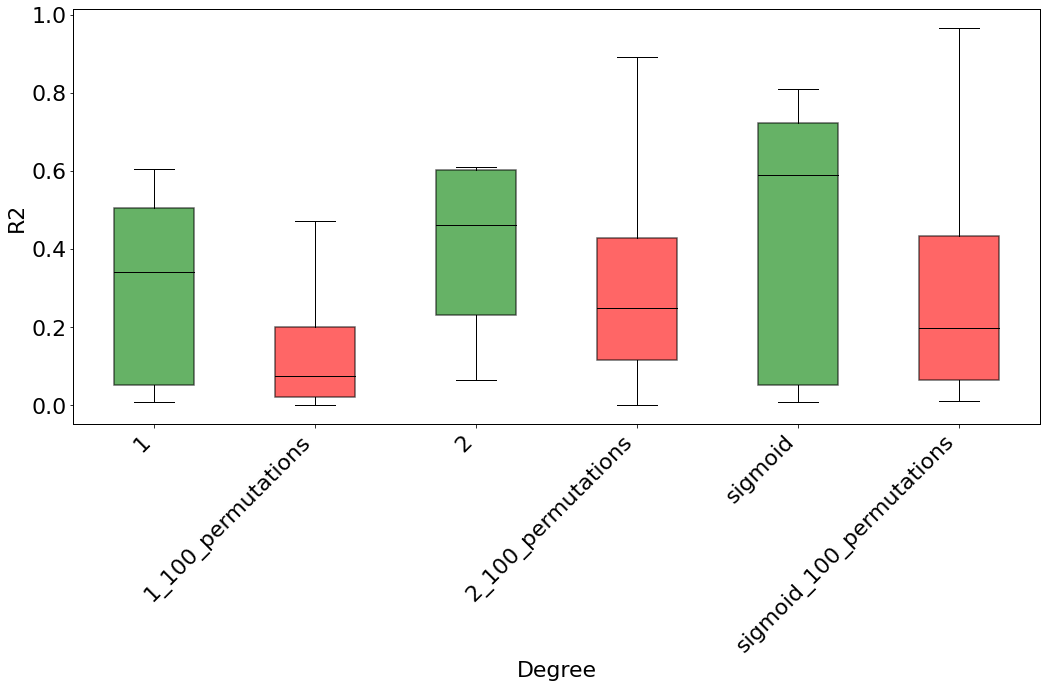

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


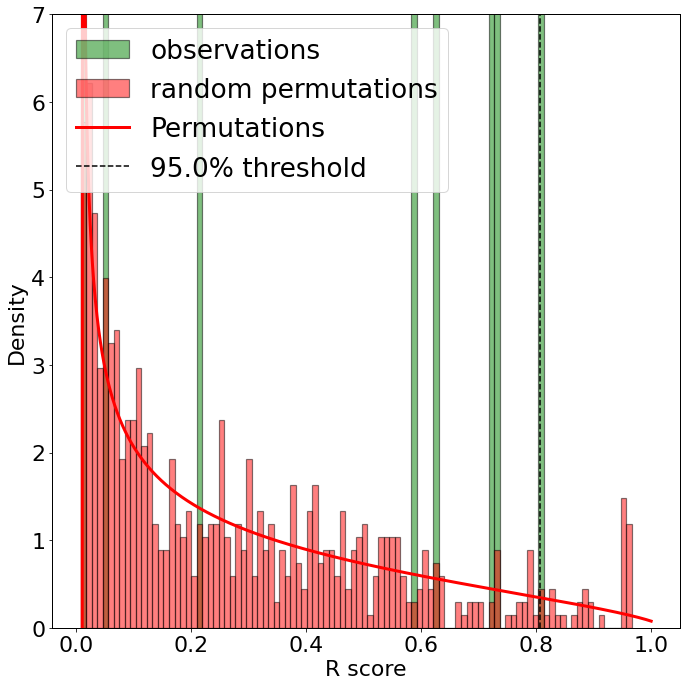

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


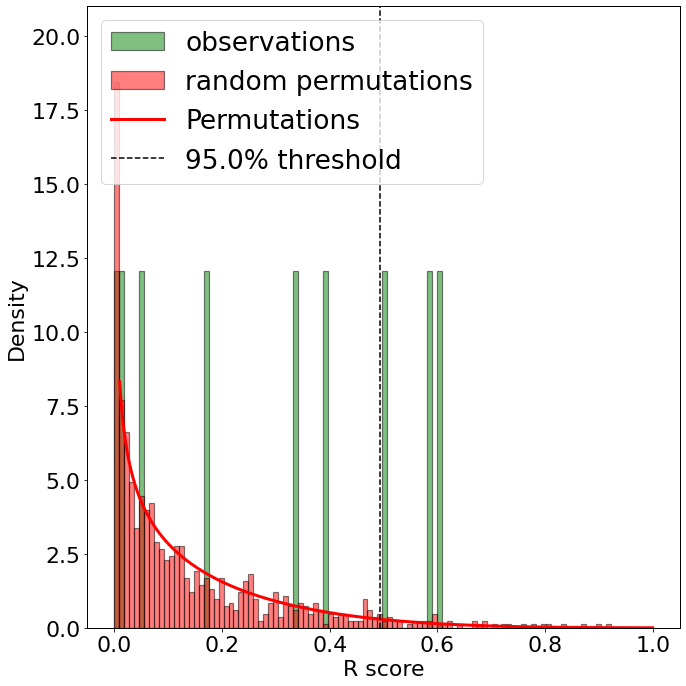

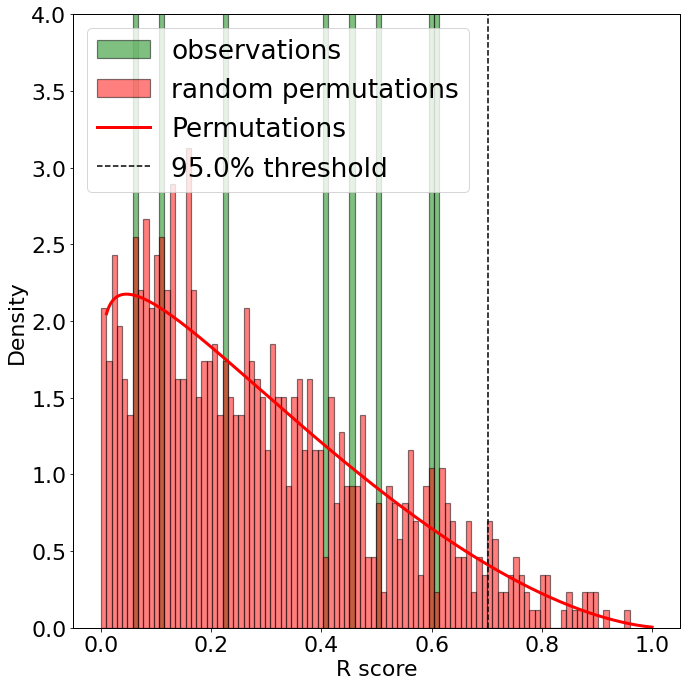

In [200]:
models_pvalue_imm=pa_imm.plot_gof(poly_obs_scores_imm, sig_obs_scores_imm, poly_perm_scores_imm, sig_perm_scores_imm, dist_perm=True)

In [201]:
models_pvalue_imm

{'sigmoidal': [3760.0, 0.1698686249436016, 0.8074046509021652],
 1: [5540.0, 0.028683752848333424, 0.4930886981230882],
 2: [5253.0, 0.062476969704019975, 0.7030799177700063]}

## Cluster genes

In [202]:
genes_clusters_imm=pa_imm.cluster_genes(scores_imm)

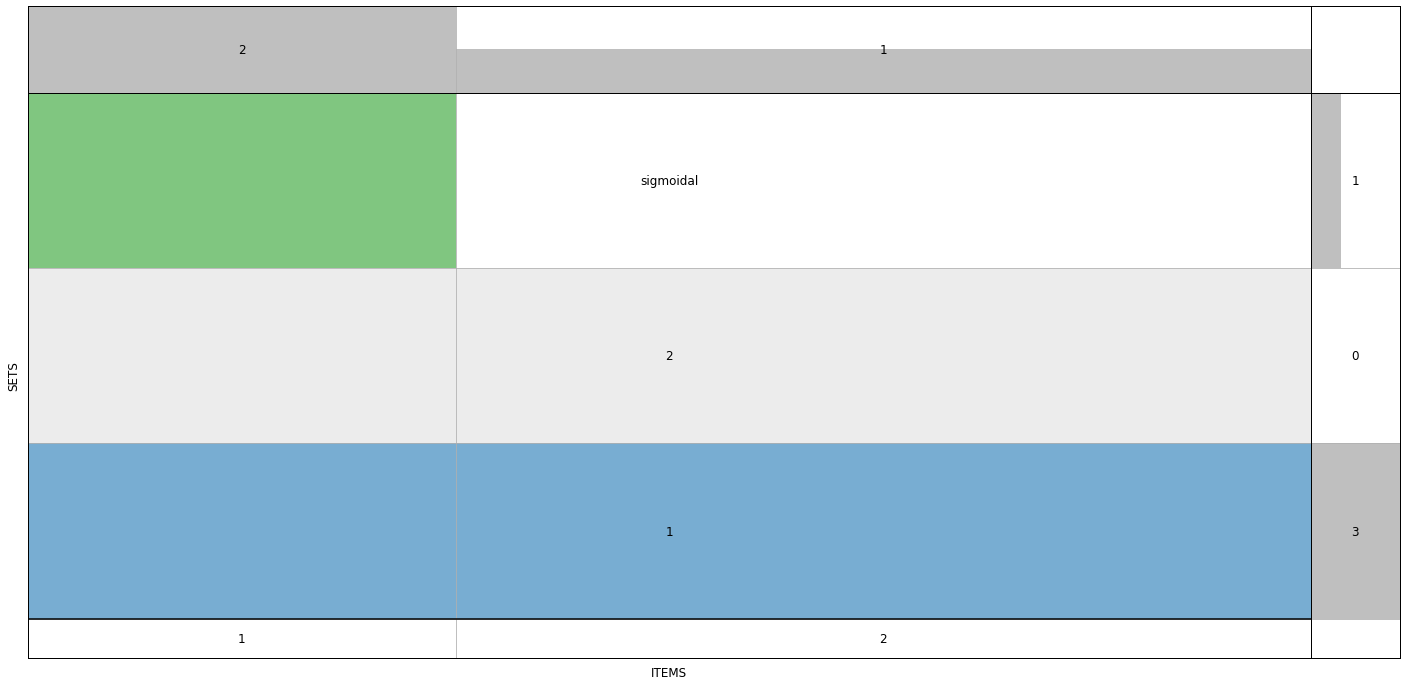

In [203]:
pa_imm.plot_clusters(genes_clusters_imm)

In [204]:
summary_imm=pa_imm.get_summary_table(genes_clusters_imm, scores_imm)

In [205]:
continuum_imm, sigmoid_imm, discarded_imm = pa_imm.classify_genes(summary_imm)

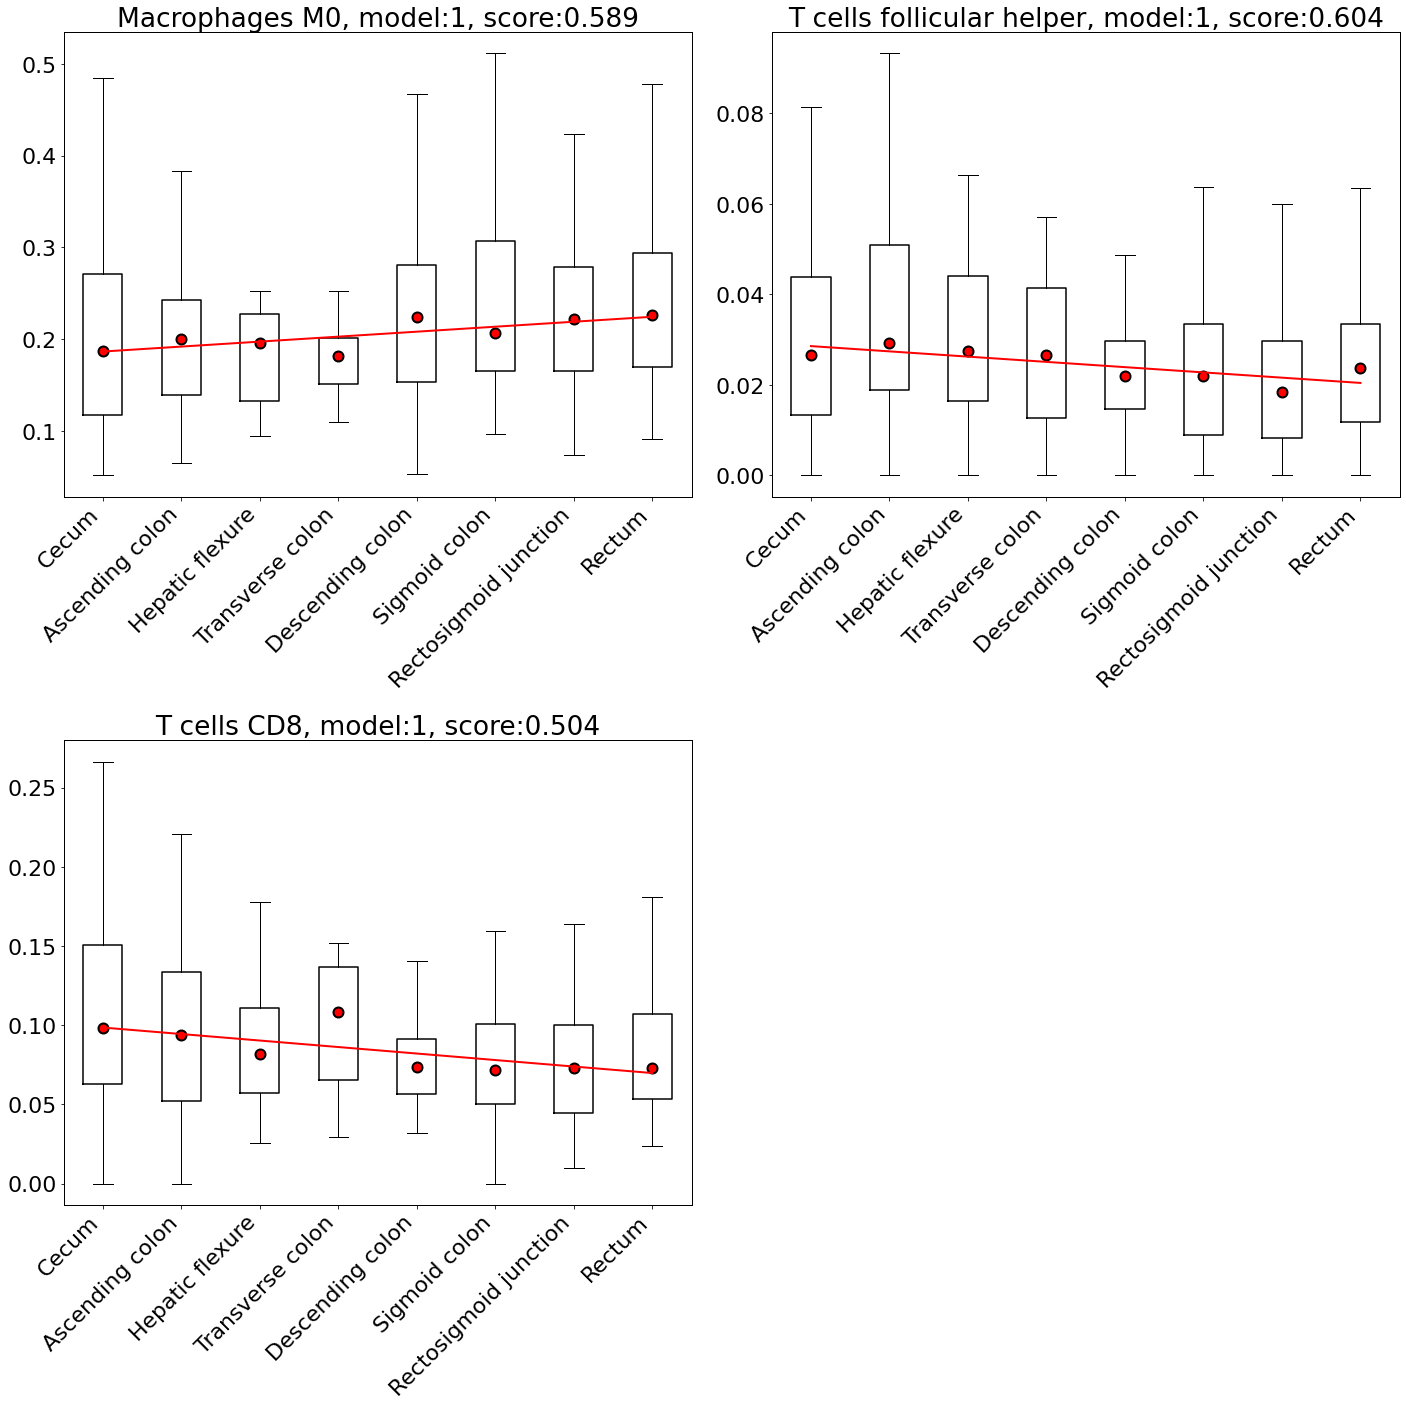

In [206]:
pa_imm.plot_fitting(continuum_imm, continuum_imm.index, medians_imm, poly_models_imm, sig_models_imm, 'continuum', save_as='SF6.svg')

# METABOLITES PROFILING

In [207]:
pa_met=ProfileAnalysis('../../../docker/analysis/metabolites')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:155: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:161: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:167: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:173: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Assign each sample in clinical data file to a colon section

In [208]:
pa_met.create_samples_to_sections_table()

# Figure 2C

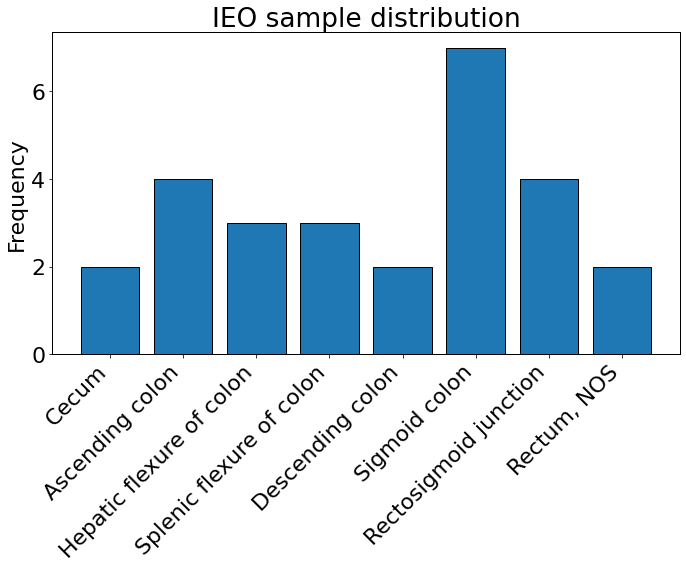

In [209]:
pa_met.plot_sample_distribution(title='IEO sample distribution')

# Figure 2B

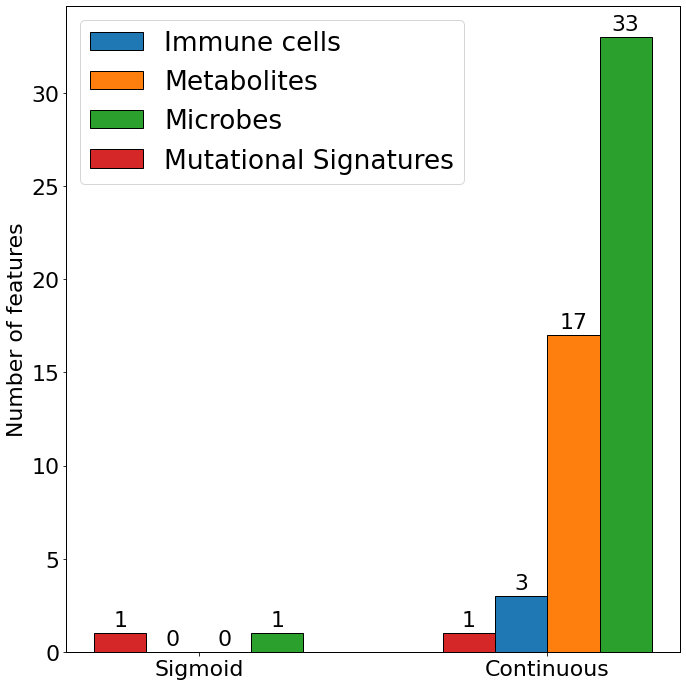

In [210]:
import numpy as np
labels = ['Sigmoid', 'Continuous']
metabolites = [0, 17]
microbiome = [1, 33]
immune = [0, 3]
sbs=[1, 1]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,10))
rects3 = ax.bar(x - width/2, immune, width, label='Immune cells', edgecolor='k')
rects1 = ax.bar(x+width/2, metabolites, width, label='Metabolites', edgecolor='k')
rects2 = ax.bar(x+width*1.5, microbiome, width, label='Microbes', edgecolor='k')
rects4 = ax.bar(x - width*1.5, sbs, width, label='Mutational Signatures', edgecolor='k')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of features')
ax.set_xticks(x, labels)
ax.legend(loc='upper left')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

fig.tight_layout()
# plt.savefig('/'.join([pa_met.figures, 'metabolites_microbes.svg']), format='svg')
plt.savefig('metabolites_microbes.svg', format='svg')
plt.show()

## Calculate median value for each colon section

In [211]:
medians_met, mad_met=pa_met.median_by_section(remove_outliers=False, scale=False)

This step has already been executed...loading results...
This step has already been executed...loading results...


In [212]:
medians_met = medians_met[medians_met.isna().sum(axis=1)<2]

In [213]:
medians_met.head()

Cecum  Ascending colon  Hepatic flexure of colon  \
metabolites                                                        
49           0.916616         1.137239                  2.802380   
50           1.272790         1.911105                  2.946900   
55           2.655592         2.484064                  7.122336   
93           1.142999         0.749726                  1.930918   
112          1.324899         1.132940                  2.102044   

             Splenic flexure of colon  Descending colon  Sigmoid colon  \
metabolites                                                              
49                           0.648456          1.269340            NaN   
50                           1.279519          5.783875       2.953145   
55                           3.048335         10.699613       4.873210   
93                           0.817009          2.082914       1.826542   
112                          1.212122          2.663467       1.078540   

             Rectosigmoid junction  Rectum, NOS  
metabolites                                      
49                        2.798767     4.794570  
50                        3.947325     3.587472  
55                        6.457502     5.667234  
93                        2.084325     1.009596  
112                       3.402928     1.740025

## Fit Observables

In [214]:
models_scores_met, poly_obs_fit_scores_met, sig_obs_fit_scores_met, poly_models_met, sig_models_met=pa_met.fit_data(medians_met, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


## Fit Random permutated data

In [215]:
poly_perm_fit_scores_met, sig_perm_fit_scores_met, sig_perm_models_met=pa_met.fit_random_data(medians_met, guess_bounds = True)

This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

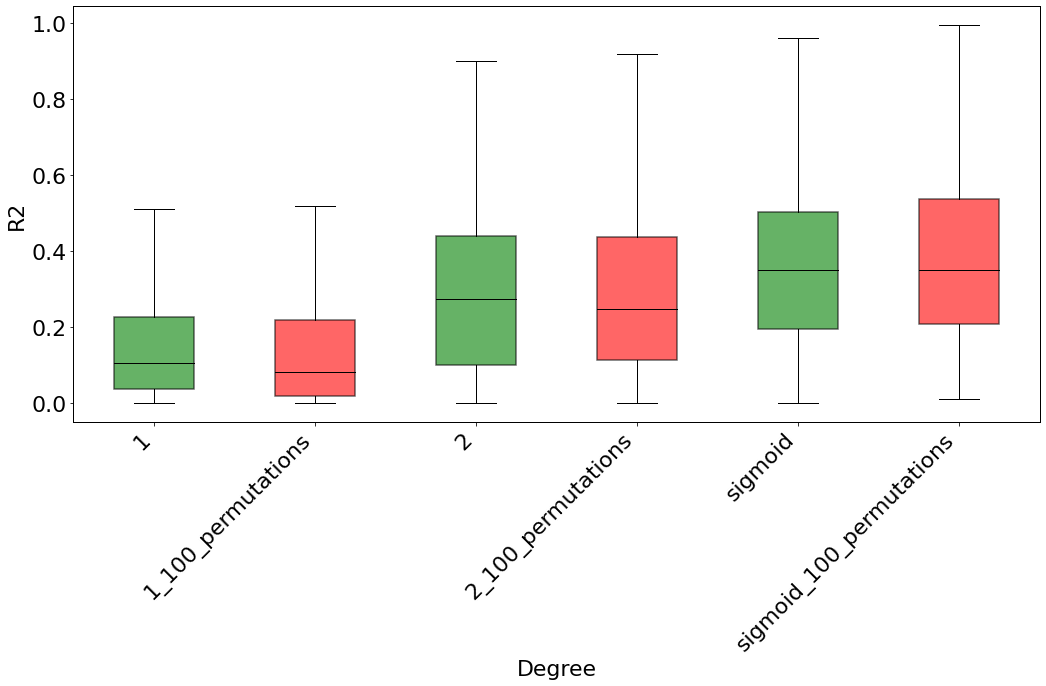

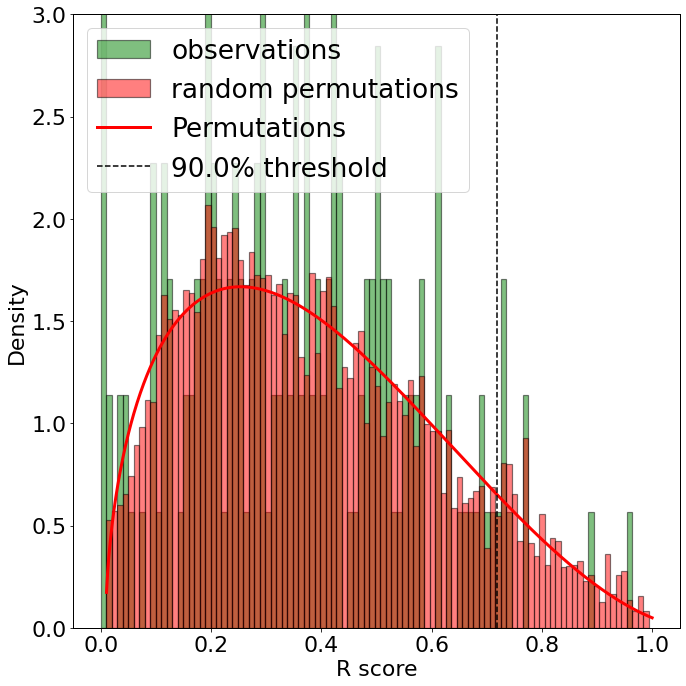

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


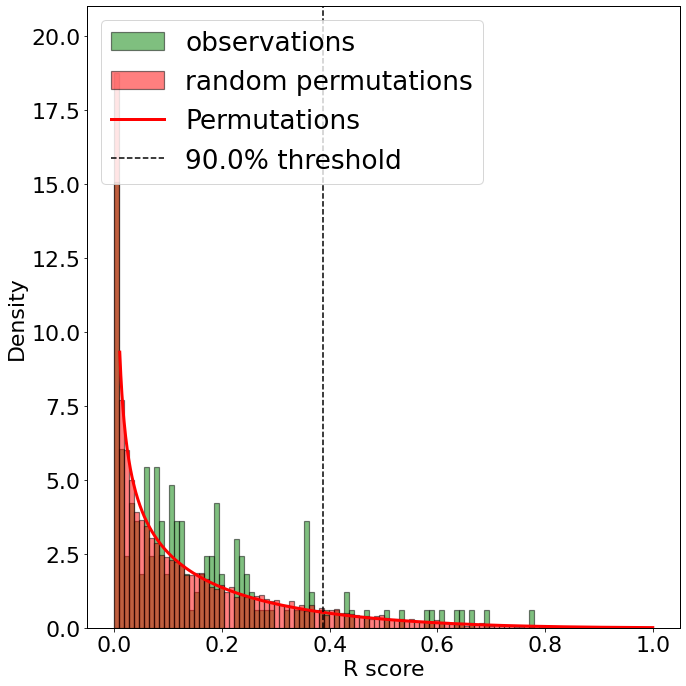

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


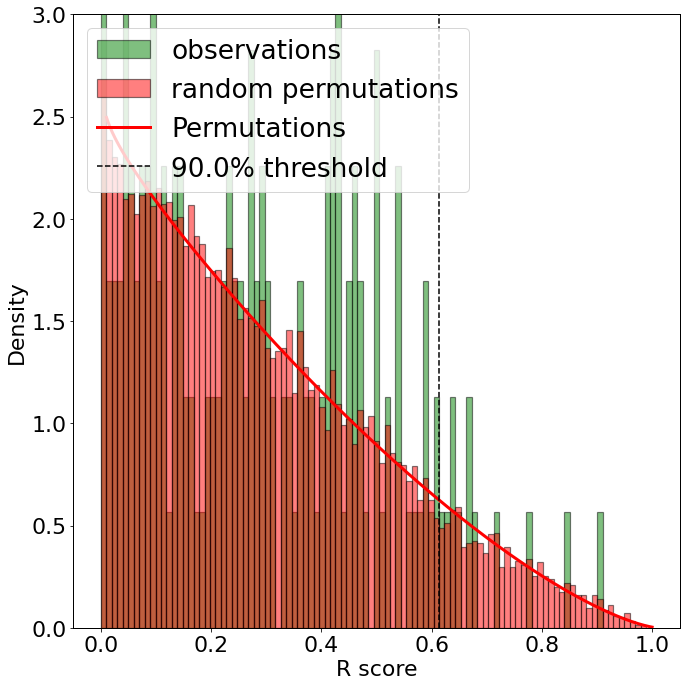

In [216]:
models_pvalue_table_met=pa_met.plot_gof(poly_obs_fit_scores_met, sig_obs_fit_scores_met, poly_perm_fit_scores_met, sig_perm_fit_scores_met)

In [217]:
genes_clusters_met=pa_met.cluster_genes(models_scores_met)

In [218]:
models_pvalue_table_met

{'sigmoidal': [1432031.0, 0.9224550439717141, 0.7193340774335014],
 1: [1717366.0, 0.048488766777172995, 0.38713120446981636],
 2: [1614043.0, 0.43148178333463855, 0.6125438297305912]}

## Cluster genes

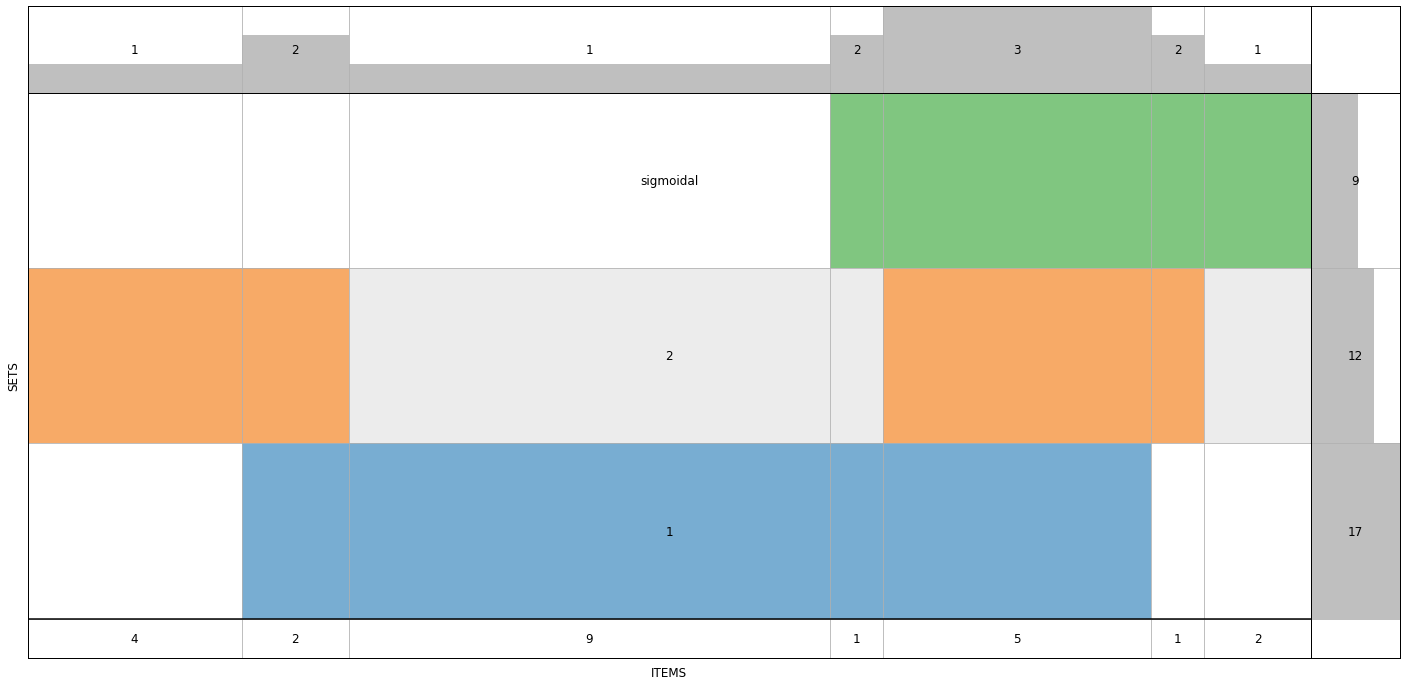

In [219]:
pa_met.plot_clusters(genes_clusters_met)

In [220]:
summary_met=pa_met.get_summary_table(genes_clusters_met, models_scores_met)

In [221]:
continuum_met, sigmoid_met, discarded_met = pa_met.classify_genes(summary_met)

In [222]:
name_conversion = pd.read_csv('../../../docker/analysis/metabolites/metabolites_id_to_names.csv')
name_dict={}
for index in continuum_met.index:
    name_dict[index]=name_conversion[name_conversion['CHEM_ID']==index]['CHEMICAL_NAME'].item()
metabolites_name_df=pd.DataFrame(name_dict, index=['metabolite name']).T

In [223]:
metabolites_name_df

metabolite name
800                                           cysteine
100008930                      oleate/vaccenate (18:1)
1124                                           citrate
197                       S-adenosylhomocysteine (SAH)
100001335                           eicosenoate (20:1)
100001162                      propionylcarnitine (C3)
1099                                         guanosine
1231                         dihomo-linoleate (20:2n6)
100009232                                  thioproline
100001620                   glycerophosphoethanolamine
100008990  1-palmitoyl-2-arachidonoyl-GPE (16:0/20:4)*
439                                    stearate (18:0)
507                                           spermine
252                                          succinate
1087                                  erucate (22:1n9)
798                                          adenosine
100001054                        butyrylcarnitine (C4)

In [224]:
import math

def summary_profile_plot(medians, mad, indexes, metabolite_names, scores_table, poly_models):
    if 'Unnamed: 0' in mad_met.columns:
        mad_met.set_index('Unnamed: 0', inplace=True)
    data=medians.loc[indexes]
    data_err=mad.loc[indexes]
    data.fillna(0, inplace=True)
    
    x = np.linspace(pa_met.x[0], pa_met.x[-1], 1000)
    degree = int(scores_table.loc[data.index[0],'model'])
    y = np.polynomial.polynomial.polyval(x, poly_models[degree][data.index[0]])
    
    n = 0    
    fig = plt.figure(figsize=(15, 15))
    axes=[]
    ax_base = plt.subplot2grid((9,2), (0,0))
    axes.append(ax_base)
    ax_base.errorbar(pa_met.x, data.loc[data.index[0]], yerr=data_err.loc[data.index[0]],
                     label=metabolite_names.loc[data.index[0]].item(),
                    marker='o', markeredgecolor='k', markerfacecolor='red', color='k')
    ax_base.plot(x, y, color='red', ls='-', linewidth=2, alpha=0.7)
    max_lim = math.ceil(data_err.loc[data.index[0]].max()+data.loc[data.index[0]].max())
    ax_base.axis(ymin=0, ymax=max_lim)
    ax_base.set_yticks([0, max_lim]) 
    ax_base.set_yticklabels([str(0), str(max_lim)], fontsize=15)
    ax_base.set_title(metabolite_names.loc[data.index[0]].item(), y=1.0, x=0.01, pad=-17, loc='left', fontsize=12)
    l=1
    h=0
    for index in data.index[1:len(data.index)]:
        degree = int(scores_table.loc[index,'model'])
        y = np.polynomial.polynomial.polyval(x, poly_models[degree][index])
        ax = plt.subplot2grid((9,2), (h,l), sharex=ax_base)
        axes.append(ax)
        markers, caps, bars = ax.errorbar(pa_met.x, data.loc[index], yerr=data_err.loc[index], label=metabolite_names.loc[index],
                    marker='o', markeredgecolor='k', markerfacecolor='red', color='k')
        ax.plot(x, y, color='red', ls='-', linewidth=2, alpha=0.7)
        ax.set_xticks(pa_met.x)
        ax.set_xticklabels(pa_met.sections4plots, rotation=45, ha='right', fontsize=15)
        max_lim = math.ceil(data_err.loc[index].max()+data.loc[index].max())
        ax.axis(ymin=0, ymax=max_lim)
        ax.set_yticks([0, max_lim])
        ax.set_yticklabels([str(0), str(max_lim)], fontsize=15)
        ax.set_title(metabolite_names.loc[index].item(), y=1.0, x=0.01, pad=-17, loc='left', fontsize=12)
        l = l+1
        if l == 2:
            h = h+1
            l = 0
    fig.subplots_adjust(hspace=0.25)   
    for ax in axes[0:-2]:
        plt.setp(ax.get_xticklabels(), visible=False)    
    plt.savefig('/'.join([pa_met.figures, 'continuous_metabolites.svg']), format='svg')

# Figure 2D

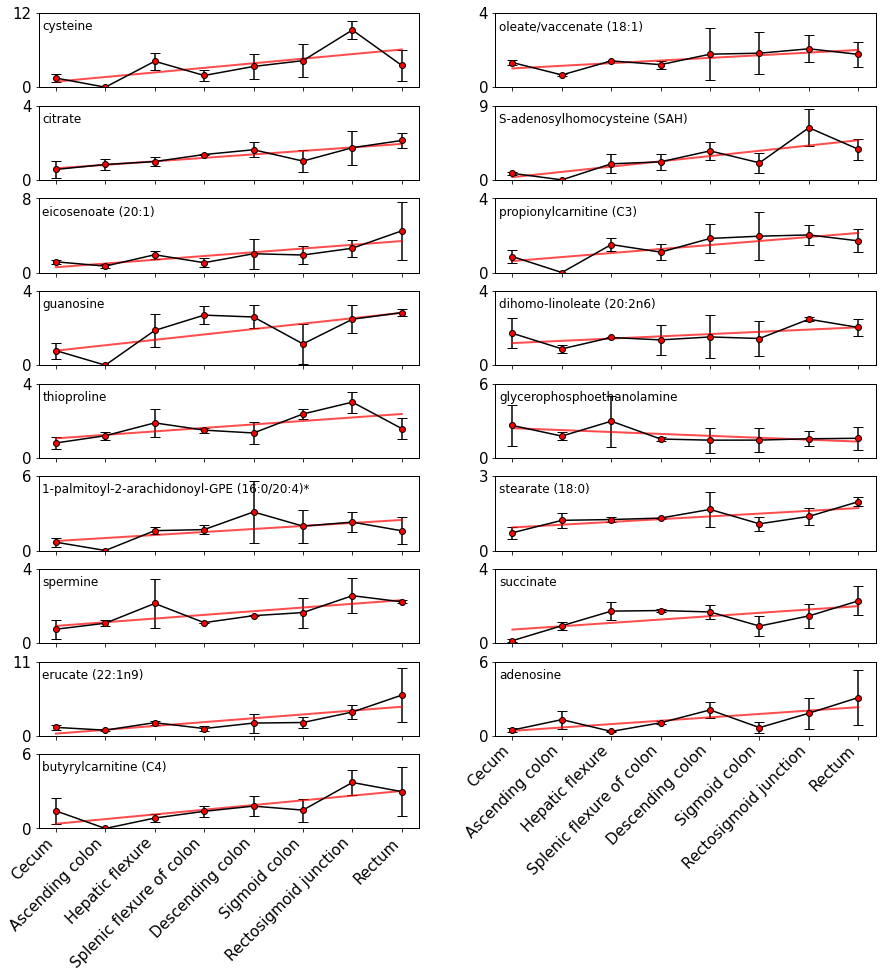

In [225]:
summary_profile_plot(medians_met, mad_met, continuum_met.index, metabolites_name_df, continuum_met, poly_models_met)

In [226]:
left=pa_met.samples2sections['Cecum']+pa_met.samples2sections['Ascending colon']+pa_met.samples2sections['Hepatic flexure of colon']+pa_met.samples2sections['Splenic flexure of colon']
right=pa_met.samples2sections['Descending colon']+pa_met.samples2sections['Sigmoid colon']+pa_met.samples2sections['Rectosigmoid junction']+pa_met.samples2sections['Rectum, NOS']

In [227]:
profiling_results = {}
unclassified_tr=len(medians_tr)-len(continuum_tr)-len(sigmoid_tr)
profiling_results['RNA-seq'] = [len(continuum_tr),len(sigmoid_tr),unclassified_tr]

unclassified_meth=len(medians_meth)-len(continuum_meth)-len(sigmoid_meth)
profiling_results['Methylation'] = [len(continuum_meth),len(sigmoid_meth),unclassified_meth]

unclassified_mut=len(medians_mut)-len(continuum_mut)-len(sigmoid_mut)
profiling_results['SNV'] = [len(continuum_mut),len(sigmoid_mut),unclassified_mut]

unclassified_dup=len(medians_dup)-len(continuum_dup)-len(sigmoid_dup)
unclassified_del=len(medians_del)-len(continuum_del)-len(sigmoid_del)
profiling_results['Aneuploidy'] = [len(continuum_dup)+len(continuum_del),
                                   len(sigmoid_dup)+len(sigmoid_del),
                                   unclassified_dup+unclassified_del]

unclassified_cms=len(medians_cms)-len(continuum_cms)-len(sigmoid_cms)
profiling_results['CMS'] = [len(continuum_cms),len(sigmoid_cms),unclassified_cms]

unclassified_sig=len(pa_sig.data_table)-len(continuum_sig)-len(sigmoid_sig)
profiling_results['Signatures'] = [len(continuum_sig),len(sigmoid_sig),unclassified_sig]

unclassified_mf=len(medians_mf)-len(continuum_mf)-len(sigmoid_mf)
profiling_results['Molecular Subtypes'] = [len(continuum_mf),len(sigmoid_mf),unclassified_mf]

unclassified_imm=len(medians_imm)-len(continuum_imm)-len(sigmoid_imm)
profiling_results['Immune cells'] = [len(continuum_imm),len(sigmoid_imm),unclassified_imm]

unclassified_mic=len(medians_mic)-len(continuum_mic)-len(sigmoid_mic)
profiling_results['Microbiome'] = [len(continuum_mic),len(sigmoid_mic),unclassified_mic]

unclassified_met=len(medians_met)-len(continuum_met)-len(sigmoid_met)
profiling_results['Metabolites'] = [len(continuum_met),len(sigmoid_met),unclassified_met]

# Figure 1C

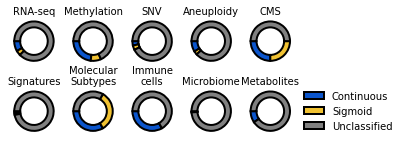

In [228]:
from textwrap import wrap

cm = 1/2.54  # centimeters in inches
l=0
h=0
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':2}
colors = ['#0b55cc', '#f1c232','#808080']
fig = plt.figure(figsize=(13*cm, 6*cm))
names = ['Continuous', 'Sigmoid', 'Unclassified']

for key in profiling_results:
    ax = plt.subplot2grid((2,5), (h,l))
    cont = profiling_results[key][0]
    sig = profiling_results[key][1]
    unc = profiling_results[key][2]
    wedges, texts= ax.pie([cont, sig, unc], wedgeprops=wedgeprops, colors=colors,
                                  textprops=dict(color="k"),startangle=180)

    ax.set_title('\n'.join(wrap(key,11)), fontsize=10, loc='center', pad=1)
    l = l+1
    if l == 5:
        h = h+1
        l = 0
ax.legend(wedges, names,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1), prop={'size': 10}, framealpha=0)
plt.savefig('/'.join([pa_mic.figures, 'Feature_Summary.svg']), format='svg')

In [229]:
profiling_results['Microbiome']

[33, 1, 3519]